<center><SPAN style="color:red;">
    
# Zebrafish 3
</span></center>
<SPAN> 

## Calculo de cinematicas a partir de Background Sustraction<span>


In [1]:
#importamos las librerias necesarias
import cv2 as cv #Libreria opencv para vision por computador
import matplotlib.pyplot as plt #Libreria para graficacion de resultados
import pandas as pd #Libreria para manejo de datos Dataframe
import numpy as np #Libreria para operaciones aritmeticas avanzadas
from tqdm import tqdm #Libreria para contabilizar tiempo de ejecucion 
import os #Libreria para ejecutar comandos de sistema operativo
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets #Libreria para ejecutar funciones interativas

In [2]:
#Funcion para calcular el fondo a partir de la secuencia de frames 
def Background(frames, thresh=10):
    height, width, depth = frames[1].shape
    B = np.zeros(shape=(int(height),int(width),int(depth)))
    #computing background
    for i in range(len(frames)):
        B += frames[i]
    B =B/len(frames)
    B  = B.astype(np.uint8)
    # ESTE CODIGO ESTA DEDICADO UNICAMENTE AL BS DEL VIDEO 115-3
    #B = cv.cvtColor(cv.imread('fotogramas2/fondo119-2.jpg'), cv.COLOR_BGR2RGB)
    #B  = B.astype(np.uint8)
    
    bs = []
    for i in range(len(frames)):
        dst = cv.absdiff(frames[i],B )
        gray = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)
        th, dst_th = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
        bs.append(dst_th)
    return bs, B

In [25]:
#Los videos ajustados para esta situacion se encuentrab en la carpeta fotogramas
for i in range(21):
    if(i<10):
        for k in range(5):
            path = "fotogramas3/10"+str(i)+"-"+str(k+1)+".avi"
            Video_1 = cv.VideoCapture(path)
            frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
                         for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

            #El treshold de mejor resultado es 83 
            bs, B = Background(frames_V1,83)
            B = cv.cvtColor(B,cv.COLOR_BGR2RGB)
            cv.imwrite('fotogramas2/fondo10'+str(i)+'-'+str(k+1)+'.jpg',B)
            #plt.savefig()
    else:
        for k in range(5):
            path = "fotogramas3/1"+str(i)+"-"+str(k+1)+".avi"
            Video_1 = cv.VideoCapture(path)
            frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
                         for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

            #El treshold de mejor resultado es 83 
            bs, B = Background(frames_V1,83)
            B = cv.cvtColor(B,cv.COLOR_BGR2RGB)
            cv.imwrite('fotogramas2/fondo1'+str(i)+'-'+str(k+1)+'.jpg',B)
            #plt.savefig('fotogramas2/fondo1'+str(i)+'-'+str(k+1)+'.jpg')
#plt.scatter(35,75, marker="x", s=200, linewidth=1, c="b")
#cv.imwrite("fotogramas2/fondo115.jpg", B)
for k in range(5):
    path = "fotogramas3/ACL099-"+str(k+1)+".avi"
    Video_1 = cv.VideoCapture(path)
    frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
                 for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]

    #El treshold de mejor resultado es 83 
    bs, B = Background(frames_V1,83)
    B = cv.cvtColor(B,cv.COLOR_BGR2RGB)
    cv.imwrite('fotogramas2/ACL099-'+str(k+1)+'.jpg',B)
    #plt.savefig('fotogramas2/fondoACL099-'+str(k+1)+'.jpg')

In [46]:
## El treshold de mejor resultado es 83 
path = "video.mp4"
Video_1 = cv.VideoCapture(path)
frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
#frames_V1 = frames_V1[20:50]
bs, B = Background(frames_V1,33)
B.shape

(480, 500, 3)

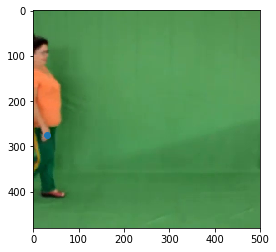

In [53]:
plt.imshow(frames_V1[20])
plt.scatter(cx[20],cy[20])

In [10]:
#El treshold de mejor resultado es 83 
path = "TrayectPloteadas/TrayectoriasFiltroPorMediana.avi"
Video_1 = cv.VideoCapture(path)
frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
#bs, B = Background(frames_V1,83)
cv.imwrite("fotogramas2/TrayectoriasFiltroPorMediana.jpg", cv.cvtColor(frames_V1[100],cv.COLOR_BGR2RGB))

True

In [3]:
#El treshold de mejor resultado es 83 
path = "zebrafish/100/100-1.avi"
Video_1 = cv.VideoCapture(path)
frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
bs, B = Background(frames_V1,83)
#cv.imwrite("fotogramas2/100-1.jpg", cv.cvtColor(frames_V1[100],cv.COLOR_BGR2RGB))

In [45]:
interact(lambda index:plt.imshow(bs[index], cmap="gray"),
         index = widgets.IntSlider(min=0,max=(len(bs)-1),
                                   step=1,value=0))

interactive(children=(IntSlider(value=0, description='index', max=29), Output()), _dom_classes=('widget-intera…

<function __main__.<lambda>(index)>

In [8]:
#Guardamos estos gloriosos fotogramas
for i,dato in enumerate(bs):
    cv.imwrite("zebrafishPresentacion/bs/frame%04d.jpg" % i, dato)

In [ ]:
for i,dato in enumerate(bs):
    plt.imshow(dato, cmap='gray')
    plt.scatter(cx[i],cy[i], marker="o", s=50, linewidth=1, c="b")
    plt.savefig("zebrafishPresentacion/cm/frame%04d.jpg" % i)


#plt.imshow(bs[0], cmap='gray')
#plt.scatter(cx[0],cy[0], marker="o", s=50, linewidth=1, c="b")
#cv.imwrite("fotogramas2/fondo115.jpg", B)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3d6e596a60> (for post_execute):


KeyboardInterrupt: 

In [7]:
B = np.uint8(B)
cv.imwrite("fotogramas2/fondo115.jpg", B)

True

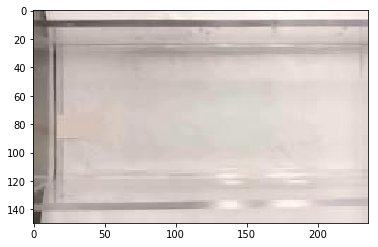

In [4]:
plt.imshow(B)

In [19]:
#AHORA CALCULAREMOS CENTRO DE MASA PARA UNA IMAGEN EN BACKGROUND SUSTRACTION
def CentroDeMasa_Edgar(imagen):
    height, width = imagen.shape
    num = 0
    contador = 0
    ingresar = True
    for i in range(width):#Esto es y
        for k in range(height):#Esto es X
            if(imagen[k][i]==255):
                num = num + i
                contador+=1
    if(contador != 0):
        px = num/(contador)
    else:
        px = 0 
    num = 0
    contador = 0
    for i in range(height):#Esto es y
        for k in range(width):#Esto es X
            if(imagen[i][k]==255):
                num = num + i
                contador+=1
    if(contador != 0):
        py = num/(contador)
    else:
        py = 0
    return px,py

In [41]:
#Esta funcion calcula todos los centroides de cada frame de un video
def Centroides(path):
    Video_1 = cv.VideoCapture(path)
    frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
                 for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
    bs,B =Background(frames_V1, thresh=33)
    cx = []
    cy = []
    for i in range(len(bs)):
        imagenbs = bs[i]
        px,py = CentroDeMasa_Edgar(imagenbs)
        #if(px == 0 or py == 0):
        #    cx.append(t1)
        #    cy.append(t2)
        #else:
        cx.append(px)
        cy.append(py)
        #t1 = px
        #t2 = py
    return cx,cy

In [42]:
cx,cy = Centroides("video.mp4")

In [13]:
#Codigo para guardar los centroides
def guardar_centroides(ruta,cx,cy):
    centroides = open(ruta,"w")
    centroides.write(str(cx[0])+" "+str(cy[0]))
    for i in range(len(cx)-1):
        centroides.write(" "+str(cx[i+1])+" "+str(cy[i+1]))
    centroides.close()

In [3]:
#Codigo para cargar los centroides
def cargar_centroides(ruta):
    centroides = open(ruta,"r")
    trayectoria = centroides.read()
    trayectoria = trayectoria.split(' ')
    type(trayectoria)
    i = 0 ; cx = []
    k = 1 ; cy = []
    for _ in range(int(len(trayectoria)/2)):
        cx.append(float(trayectoria[i]))
        cy.append(float(trayectoria[k]))
        i+=2
        k+=2
    return cx,cy

In [5]:
cx, cy = cargar_centroides('variables/100-1C.txt')

In [8]:
print(cx[1],cy[1])

221.4516129032258 71.73118279569893


In [47]:
for i in range(3):    
    path = "fotogramas3/119-"+str(i+2)+".avi"
    print(path)
    cx,cy = Centroides(path)
    guardar_centroides("variables/119-"+str(i+2)+"C.txt",cx,cy)

fotogramas3/119-2.avi
fotogramas3/119-3.avi
fotogramas3/119-4.avi


In [14]:
#Guardemos los centroides para usarlos despues:
#for i in range(21):
#    if(i<10):
#        for k in range(5):
#            path = "fotogramas3/10"+str(i)+"-"+str(k+1)+".avi"
#            print(path)
#            cx,cy = Centroides(path)
#            guardar_centroides("variables/10"+str(i)+"-"+str(k+1)+"C.txt",cx,cy)
#    else:
#        for k in range(5):
#            path = "fotogramas3/1"+str(i)+"-"+str(k+1)+".avi"
#            print(path)
#            cx,cy = Centroides(path)
#            guardar_centroides("variables/1"+str(i)+"-"+str(k+1)+"C.txt",cx,cy)
for k in range(5):
    path = "fotogramas3/120-"+str(k+1)+".avi"
    print(path)
    cx,cy = Centroides(path)
    guardar_centroides("variables/120-"+str(k+1)+"C.txt",cx,cy)            

for k in range(5):
    path = "fotogramas3/ACL099-"+str(k+1)+".avi"
    print(path)
    cx,cy = Centroides(path)
    guardar_centroides("variables/ACL099-"+str(k+1)+"C.txt",cx,cy)

fotogramas3/120-1.avi
fotogramas3/120-2.avi
fotogramas3/120-3.avi
fotogramas3/120-4.avi
fotogramas3/120-5.avi
fotogramas3/ACL099-1.avi
fotogramas3/ACL099-2.avi
fotogramas3/ACL099-3.avi
fotogramas3/ACL099-4.avi
fotogramas3/ACL099-5.avi


In [38]:
#cx,cy = Centroides("fotogramas3/115-3.avi")
constante = 0.141960578837807 #cm/pix
dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
indexc = 0
for _ in range(len(cx)-1):
    d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    dt+=d
    indexc+=1
dt = dt*constante
print("La distancia recorrida en el video 115-3 fue de:",dt,"Cm")

vx = [] ; ax = []  
vy = [] ; ay = []
for j in range(len(cx)-1):
    vx.append(cx[j+1]-cx[j])
    vy.append(cy[j+1]-cy[j])
for j in range(len(vx)-1):
    ax.append(vx[j+1]-vx[j])
    ay.append(vy[j+1]-vy[j])

#Hallamos la magnitud de la velocidad en v
magV = []
for j in range(len(vx)):
    magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
vel_pro = np.mean(magV)*30*constante 
magA = []
for j in range(len(ax)):
    magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
acel_pro = np.mean(magA)
print("El valor de la velocidad promedio para el video 115-3 fue de:",vel_pro,"cm/s")
print("El valor de la aceleracion promedio para el video 115-3 fue de:",acel_pro,"px/c^2")

La distancia recorrida en el video 115-3 fue de: 19.030237338019305 Cm
El valor de la velocidad promedio para el video 115-3 fue de: 0.31787701566847393 cm/s
El valor de la aceleracion promedio para el video 115-3 fue de: 0.11971802861762212 px/c^2


In [39]:
cx,cy = Centroides("fotogramas3/115-1.avi")
constante = 0.141960578837807 #cm/pix
dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
indexc = 0
for _ in range(len(cx)-1):
    d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    dt+=d
    indexc+=1
dt = dt*constante
print("La distancia recorrida en el video 115-1 fue de:",dt,"Cm")

vx = [] ; ax = []  
vy = [] ; ay = []
for j in range(len(cx)-1):
    vx.append(cx[j+1]-cx[j])
    vy.append(cy[j+1]-cy[j])
for j in range(len(vx)-1):
    ax.append(vx[j+1]-vx[j])
    ay.append(vy[j+1]-vy[j])

#Hallamos la magnitud de la velocidad en v
magV = []
for j in range(len(vx)):
    magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
vel_pro = np.mean(magV)*30*constante 
magA = []
for j in range(len(ax)):
    magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
acel_pro = np.mean(magA)
print("El valor de la velocidad promedio para el video 115-1 fue de:",vel_pro,"cm/s")
print("El valor de la aceleracion promedio para el video 115-1 fue de:",acel_pro,"px/c^2")
print('----------------------------------------------------------------------------------')

cx,cy = Centroides("fotogramas3/115-2.avi")
constante = 0.141960578837807 #cm/pix
dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
indexc = 0
for _ in range(len(cx)-1):
    d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    dt+=d
    indexc+=1
dt = dt*constante
print("La distancia recorrida en el video 115-2 fue de:",dt,"Cm")

vx = [] ; ax = []  
vy = [] ; ay = []
for j in range(len(cx)-1):
    vx.append(cx[j+1]-cx[j])
    vy.append(cy[j+1]-cy[j])
for j in range(len(vx)-1):
    ax.append(vx[j+1]-vx[j])
    ay.append(vy[j+1]-vy[j])

#Hallamos la magnitud de la velocidad en v
magV = []
for j in range(len(vx)):
    magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
vel_pro = np.mean(magV)*30*constante 
magA = []
for j in range(len(ax)):
    magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
acel_pro = np.mean(magA)
print("El valor de la velocidad promedio para el video 115-2 fue de:",vel_pro,"cm/s")
print("El valor de la aceleracion promedio para el video 115-2 fue de:",acel_pro,"px/c^2")

La distancia recorrida en el video 115-1 fue de: 16.98004427690934 Cm
El valor de la velocidad promedio para el video 115-1 fue de: 0.2836310291243211 cm/s
El valor de la aceleracion promedio para el video 115-1 fue de: 0.11113595840657559 px/c^2
----------------------------------------------------------------------------------
La distancia recorrida en el video 115-2 fue de: 15.890769712991885 Cm
El valor de la velocidad promedio para el video 115-2 fue de: 0.2654360197047644 cm/s
El valor de la aceleracion promedio para el video 115-2 fue de: 0.10929053104818297 px/c^2


In [9]:
constante = 0.141960578837807 #cm/pix
dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
indexc = 0
for _ in range(len(cx)-1):
    d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    dt+=d
    indexc+=1
dt = dt*constante
#total_r += dt
print("La distancia recorrida en el video 100-1 fue de:",dt,"Cm")
#print("La distancia total recorrida en todo el video 115 fue de:",total_r,"Cm")
print("-----------------------------------------------------------------")

La distancia recorrida en el video 100-1 fue de: 1079.0894059243203 Cm
-----------------------------------------------------------------


In [10]:
cx2,cy2 = Centroides("fotogramas3/100-2.avi")
cx3,cy3 = Centroides("fotogramas3/100-3.avi")
cx4,cy4 = Centroides("fotogramas3/100-4.avi")
cx5,cy5 = Centroides("fotogramas3/100-5.avi")

In [15]:
#Velocidades
vx = [] ; vx2 = []; vx3 = [] ; vx4 = []; vx5 = []  
vy = [] ; vy2 = []; vy3 = [] ; vy4 = []; vy5 = []
for i in range(len(cx)-1):
    vx.append(cx[i+1]-cx[i])
    vy.append(cy[i+1]-cy[i])
    vx2.append(cx2[i+1]-cx2[i])
    vy2.append(cy2[i+1]-cy2[i])
    vx3.append(cx3[i+1]-cx3[i])
    vy3.append(cy3[i+1]-cy3[i])
    vx4.append(cx4[i+1]-cx4[i])
    vy4.append(cy4[i+1]-cy4[i])
    vx5.append(cx5[i+1]-cx5[i])
    vy5.append(cy5[i+1]-cy5[i])

In [23]:
#Aceleraciones:
ax = [] ; ax2 = []; ax3 = [] ; ax4 = []; ax5 = []  
ay = [] ; ay2 = []; ay3 = [] ; ay4 = []; ay5 = []
for i in range(len(vx)-1):
    ax.append(vx[i+1]-vx[i])
    ay.append(vy[i+1]-vy[i])
    ax2.append(vx2[i+1]-vx2[i])
    ay2.append(vy2[i+1]-vy2[i])
    ax3.append(vx3[i+1]-vx3[i])
    ay3.append(vy3[i+1]-vy3[i])
    ax4.append(vx4[i+1]-vx4[i])
    ay4.append(vy4[i+1]-vy4[i])
    ax5.append(vx5[i+1]-vx5[i])
    ay5.append(vy5[i+1]-vy5[i])

In [26]:
velocidad = []

#Hallamos la magnitud de la velocidad en v
mag = []
for i in range(len(vx)):
    mag.append(np.sqrt((vx[i])**2+(vy[i])**2))
velocidad.append(np.mean(mag)*30*constante)#,len(vx)
print(velocidad[0])

#Hallamos la magnitud de la velocidad en v2
mag = []
for i in range(len(vx)):
    mag.append(np.sqrt((vx2[i])**2+(vy2[i])**2))
velocidad.append(np.mean(mag)*30*constante)#,len(vx)
print(velocidad[1])

#Hallamos la magnitud de la velocidad en v3
mag = []
for i in range(len(vx)):
    mag.append(np.sqrt((vx3[i])**2+(vy3[i])**2))
velocidad.append(np.mean(mag)*30*constante)#,len(vx)
print(velocidad[2])

#Hallamos la magnitud de la velocidad en v4
mag = []
for i in range(len(vx)):
    mag.append(np.sqrt((vx4[i])**2+(vy4[i])**2))
velocidad.append(np.mean(mag)*30*constante)#,len(vx)
print(velocidad[3])

#Hallamos la magnitud de la velocidad en v5
mag = []
for i in range(len(vx)):
    mag.append(np.sqrt((vx5[i])**2+(vy5[i])**2))
velocidad.append(np.mean(mag)*30*constante)#,len(vx)
print(velocidad[4])


7.423895136497222
9.355178960375262
10.984794885211167
8.605697791355531
7.223672750611849


In [29]:
np.mean(velocidad)

8.718647904810206

In [32]:
#El algortimo como tal:
constante = 0.141960578837807 #cm/pix
for i in range(20):
    velocidad = []
    aceleracion = []
    if(i<9):
        for k in range(5):
            path = "fotogramas3/10"+str(i+1)+"-"+str(k+1)+".avi"
            print(path)
            cx,cy = Centroides(path)
            vx = [] ; ax = []  
            vy = [] ; ay = []
            for j in range(len(cx)-1):
                vx.append(cx[j+1]-cx[j])
                vy.append(cy[j+1]-cy[j])
            for j in range(len(vx)-1):
                ax.append(vx[j+1]-vx[j])
                ay.append(vy[j+1]-vy[j])
            #Hallamos la magnitud de la velocidad en v
            magV = []
            for j in range(len(vx)):
                magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
            vel_pro = np.mean(magV)*30*constante 
            magA = []
            for j in range(len(ax)):
                magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
            acel_pro = np.mean(magA)
            print("El valor de la velocidad promedio para el video 10"+str(i+1)+"-"+str(k+1)+" fue de:",vel_pro,"cm/s")
            print("El valor de la aceleracion promedio para el video 10"+str(i+1)+"-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
            velocidad.append(vel_pro)
            aceleracion.append(acel_pro)
        print("Velocidad promedio video 10"+str(i+1)+":",np.mean(velocidad),"Cm/s")
        print("Aceleracion promedio video 10"+str(i+1)+":",np.mean(aceleracion),"Px/C^2")
        print("---------------------------------------------------------")
    else:
        for k in range(5):
            path = "fotogramas3/1"+str(i+1)+"-"+str(k+1)+".avi"
            cx,cy = Centroides(path)
            vx = [] ; ax = []  
            vy = [] ; ay = []
            for j in range(len(cx)-1):
                vx.append(cx[j+1]-cx[j])
                vy.append(cy[j+1]-cy[j])
            for j in range(len(vx)-1):
                ax.append(vx[j+1]-vx[j])
                ay.append(vy[j+1]-vy[j])
            #Hallamos la magnitud de la velocidad en v
            magV = []
            for j in range(len(vx)):
                magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
            vel_pro = np.mean(magV)*30*constante 
            magA = []
            for j in range(len(ax)):
                magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
            acel_pro = np.mean(magA)
            print("El valor de la velocidad promedio para el video 1"+str(i+1)+"-"+str(k+1)+" fue de:",vel_pro,"cm/s")
            print("El valor de la aceleracion promedio para el video 1"+str(i+1)+"-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
            velocidad.append(vel_pro)
            aceleracion.append(acel_pro)
        print("Velocidad promedio video 1"+str(i+1)+":",np.mean(velocidad),"Cm/s")
        print("Aceleracion promedio video 1"+str(i+1)+":",np.mean(aceleracion),"Px/C^2")
        print("---------------------------------------------------------")

velocidad = []
aceleracion = []
for k in range(5):
    path = "fotogramas3/ACL099-"+str(k+1)+".avi"
    print(path)
    cx,cy = Centroides("fotogramas3/ACL099-"+str(k+1)+".avi")
    vx = [] ; ax = []  
    vy = [] ; ay = []
    for j in range(len(cx)-1):
        vx.append(cx[j+1]-cx[j])
        vy.append(cy[j+1]-cy[j])
    for j in range(len(vx)-1):
        ax.append(vx[j+1]-vx[j])
        ay.append(vy[j+1]-vy[j])
    
    #Hallamos la magnitud de la velocidad en v
    magV = []
    for j in range(len(vx)):
        magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
    vel_pro = np.mean(magV)*30*constante 
    
    magA = []
    for j in range(len(ax)):
        magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
    acel_pro = np.mean(magA)
    
    print("El valor de la velocidad promedio para el ACL099-"+str(k+1)+" fue de:",vel_pro,"cm/s")
    print("El valor de la aceleracion promedio para el video ACL099-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
    velocidad.append(vel_pro)
    aceleracion.append(acel_pro)
print("Velocidad promedio video ACL099:",np.mean(velocidad),"Cm/s")
print("Aceleracion promedio video ACL099:",np.mean(aceleracion),"Px/C^2")
print("---------------------------------------------------------")

fotogramas3/101-1.avi
El valor de la velocidad promedio para el video 101-1 fue de: 5.991914620008514 cm/s
El valor de la aceleracion promedio para el video 101-1 fue de: 0.6396402360724471 px/c^2
fotogramas3/101-2.avi
El valor de la velocidad promedio para el video 101-2 fue de: 5.962547565795492 cm/s
El valor de la aceleracion promedio para el video 101-2 fue de: 0.5217582109844425 px/c^2
fotogramas3/101-3.avi
El valor de la velocidad promedio para el video 101-3 fue de: 7.378925533519407 cm/s
El valor de la aceleracion promedio para el video 101-3 fue de: 0.6954426199367809 px/c^2
fotogramas3/101-4.avi
El valor de la velocidad promedio para el video 101-4 fue de: 8.152603928384279 cm/s
El valor de la aceleracion promedio para el video 101-4 fue de: 0.8188186452512841 px/c^2
fotogramas3/101-5.avi
El valor de la velocidad promedio para el video 101-5 fue de: 7.0590013990746865 cm/s
El valor de la aceleracion promedio para el video 101-5 fue de: 0.7861454770983898 px/c^2
Velocidad prom

El valor de la velocidad promedio para el video 108-2 fue de: 5.337626993568822 cm/s
El valor de la aceleracion promedio para el video 108-2 fue de: 0.6405279607663323 px/c^2
fotogramas3/108-3.avi
El valor de la velocidad promedio para el video 108-3 fue de: 5.450726159920073 cm/s
El valor de la aceleracion promedio para el video 108-3 fue de: 0.6842473972234546 px/c^2
fotogramas3/108-4.avi
El valor de la velocidad promedio para el video 108-4 fue de: 5.663891546092094 cm/s
El valor de la aceleracion promedio para el video 108-4 fue de: 0.7041487685845409 px/c^2
fotogramas3/108-5.avi
El valor de la velocidad promedio para el video 108-5 fue de: 5.7829123611027615 cm/s
El valor de la aceleracion promedio para el video 108-5 fue de: 0.6815143620055418 px/c^2
Velocidad promedio video 108: 5.526315743303639 Cm/s
Aceleracion promedio video 108: 0.664780791760528 Px/C^2
---------------------------------------------------------
fotogramas3/109-1.avi
El valor de la velocidad promedio para el v

UnboundLocalError: local variable 't1' referenced before assignment

In [6]:
#El algortimo como tal:
constante = 0.141960578837807 #cm/pix
for i in range(5):
    velocidad = []
    aceleracion = []
    for k in range(5):
        path = "fotogramas3/1"+str(i+16)+"-"+str(k+1)+".avi"
        print(path)
        cx,cy = Centroides(path)
        vx = [] ; ax = []  
        vy = [] ; ay = []
        for j in range(len(cx)-1):
            vx.append(cx[j+1]-cx[j])
            vy.append(cy[j+1]-cy[j])
        for j in range(len(vx)-1):
            ax.append(vx[j+1]-vx[j])
            ay.append(vy[j+1]-vy[j])
        #Hallamos la magnitud de la velocidad en v
        magV = []
        for j in range(len(vx)):
            magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
        vel_pro = np.mean(magV)*30*constante 
        magA = []
        for j in range(len(ax)):
            magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
        acel_pro = np.mean(magA)
        print("El valor de la velocidad promedio para el video 1"+str(i+16)+"-"+str(k+1)+" fue de:",vel_pro,"cm/s")
        print("El valor de la aceleracion promedio para el video 1"+str(i+16)+"-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
        velocidad.append(vel_pro)
        aceleracion.append(acel_pro)
    print("Velocidad promedio video 1"+str(i+16)+":",np.mean(velocidad),"Cm/s")
    print("Aceleracion promedio video 1"+str(i+16)+":",np.mean(aceleracion),"Px/C^2")
    print("---------------------------------------------------------")

velocidad = []
aceleracion = []
for k in range(5):
    path = "fotogramas3/ACL099-"+str(k+1)+".avi"
    print(path)
    cx,cy = Centroides("fotogramas3/ACL099-"+str(k+1)+".avi")
    vx = [] ; ax = []  
    vy = [] ; ay = []
    for j in range(len(cx)-1):
        vx.append(cx[j+1]-cx[j])
        vy.append(cy[j+1]-cy[j])
    for j in range(len(vx)-1):
        ax.append(vx[j+1]-vx[j])
        ay.append(vy[j+1]-vy[j])
    
    #Hallamos la magnitud de la velocidad en v
    magV = []
    for j in range(len(vx)):
        magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
    vel_pro = np.mean(magV)*30*constante 
    
    magA = []
    for j in range(len(ax)):
        magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
    acel_pro = np.mean(magA)
    
    print("El valor de la velocidad promedio para el ACL099-"+str(k+1)+" fue de:",vel_pro,"cm/s")
    print("El valor de la aceleracion promedio para el video ACL099-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
    velocidad.append(vel_pro)
    aceleracion.append(acel_pro)
print("Velocidad promedio video ACL099:",np.mean(velocidad),"Cm/s")
print("Aceleracion promedio video ACL099:",np.mean(aceleracion),"Px/C^2")
print("---------------------------------------------------------")

fotogramas3/116-1.avi
El valor de la velocidad promedio para el video 116-1 fue de: 3.9862913960429447 cm/s
El valor de la aceleracion promedio para el video 116-1 fue de: 0.5547880754263487 px/c^2
fotogramas3/116-2.avi
El valor de la velocidad promedio para el video 116-2 fue de: 3.93880842009629 cm/s
El valor de la aceleracion promedio para el video 116-2 fue de: 0.5659929678876495 px/c^2
fotogramas3/116-3.avi
El valor de la velocidad promedio para el video 116-3 fue de: 4.613190739345144 cm/s
El valor de la aceleracion promedio para el video 116-3 fue de: 0.5925787099863832 px/c^2
fotogramas3/116-4.avi
El valor de la velocidad promedio para el video 116-4 fue de: 4.325303911580749 cm/s
El valor de la aceleracion promedio para el video 116-4 fue de: 0.5966851469002652 px/c^2
fotogramas3/116-5.avi
El valor de la velocidad promedio para el video 116-5 fue de: 4.773180710281459 cm/s
El valor de la aceleracion promedio para el video 116-5 fue de: 0.6110238330665028 px/c^2
Velocidad prome

In [8]:
velocidad = []
aceleracion = []
for k in range(5):
    path = "fotogramas3/100-"+str(k+1)+".avi"
    print(path)
    cx,cy = Centroides(path)
    vx = [] ; ax = []  
    vy = [] ; ay = []
    for j in range(len(cx)-1):
        vx.append(cx[j+1]-cx[j])
        vy.append(cy[j+1]-cy[j])
    for j in range(len(vx)-1):
        ax.append(vx[j+1]-vx[j])
        ay.append(vy[j+1]-vy[j])
    #Hallamos la magnitud de la velocidad en v
    magV = []
    for j in range(len(vx)):
        magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
    vel_pro = np.mean(magV)*30*constante 
    magA = []
    for j in range(len(ax)):
        magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
    acel_pro = np.mean(magA)
    print("El valor de la velocidad promedio para el video 1"+str(i+16)+"-"+str(k+1)+" fue de:",vel_pro,"cm/s")
    print("El valor de la aceleracion promedio para el video 1"+str(i+16)+"-"+str(k+1)+" fue de:",acel_pro,"px/c^2")
    velocidad.append(vel_pro)
    aceleracion.append(acel_pro)
print("Velocidad promedio video 100:",np.mean(velocidad),"Cm/s")
print("Aceleracion promedio video 100:",np.mean(aceleracion),"Px/C^2")
print("---------------------------------------------------------")
#velocidad = []
#aceleracion = []
for k in range(2):
    path = "fotogramas3/115-"+str(k+4)+".avi"
    print(path)
    cx,cy = Centroides(path)
    vx = [] ; ax = []  
    vy = [] ; ay = []
    for j in range(len(cx)-1):
        vx.append(cx[j+1]-cx[j])
        vy.append(cy[j+1]-cy[j])
    for j in range(len(vx)-1):
        ax.append(vx[j+1]-vx[j])
        ay.append(vy[j+1]-vy[j])
    #Hallamos la magnitud de la velocidad en v
    magV = []
    for j in range(len(vx)):
        magV.append(np.sqrt((vx[j])**2+(vy[j])**2))
    vel_pro = np.mean(magV)*30*constante 
    magA = []
    for j in range(len(ax)):
        magA.append(np.sqrt((ax[j])**2+(ay[j])**2))
    acel_pro = np.mean(magA)
    print("El valor de la velocidad promedio para el video 115-"+str(k+4)+" fue de:",vel_pro,"cm/s")
    print("El valor de la aceleracion promedio para el video 115-"+str(k+4)+" fue de:",acel_pro,"px/c^2")
    #velocidad.append(vel_pro)
    #aceleracion.append(acel_pro)
#print("Velocidad promedio video ACL099:",np.mean(velocidad),"Cm/s")
#print("Aceleracion promedio video ACL099:",np.mean(aceleracion),"Px/C^2")
#print("---------------------------------------------------------")

fotogramas3/100-1.avi
El valor de la velocidad promedio para el video 120-1 fue de: 7.423895136497222 cm/s
El valor de la aceleracion promedio para el video 120-1 fue de: 0.8531760921315172 px/c^2
fotogramas3/100-2.avi
El valor de la velocidad promedio para el video 120-2 fue de: 9.355178960375262 cm/s
El valor de la aceleracion promedio para el video 120-2 fue de: 1.0865429766654076 px/c^2
fotogramas3/100-3.avi
El valor de la velocidad promedio para el video 120-3 fue de: 10.984794885211167 cm/s
El valor de la aceleracion promedio para el video 120-3 fue de: 1.1648049240103053 px/c^2
fotogramas3/100-4.avi
El valor de la velocidad promedio para el video 120-4 fue de: 8.605697791355531 cm/s
El valor de la aceleracion promedio para el video 120-4 fue de: 0.9008152461384716 px/c^2
fotogramas3/100-5.avi
El valor de la velocidad promedio para el video 120-5 fue de: 7.223672750611849 cm/s
El valor de la aceleracion promedio para el video 120-5 fue de: 1.0394104058162883 px/c^2
Velocidad prom

In [24]:
#Hallamos la magnitud de la aceleracion en a5
magA = []
for i in range(len(ax)):
    magA.append(np.sqrt((ax[i])**2+(ay[i])**2))
aceleracion = np.mean(magA)#,len(vx)
print (aceleracion)

0.8531760921315172


In [ ]:
#Conversion de Escala (pixeles a centimetros)
constante = 0.141960578837807 #cm/pix

aceleracion_cm = aceleracion*30*constante #cm/seg
print(velocidad_cm)

In [21]:
#Conversion de Escala (pixeles a centimetros)
constante = 0.141960578837807 #cm/pix

velocidad_cm = velocidad*30*constante #cm/seg
print(velocidad_cm)

7.423895136497222


Ya tenemos todas las coordenadas X y Y en todo el video de la trayectoria del pez para el Video 100-1, ahora calularemos cinematicas.

## Desplazamiento

In [46]:
#Conversion de Escala (pixeles a centimetros)
constante = 0.141960578837807 #cm/pix

In [47]:
for k in range(21):
    total_r = 0
    if(k<10):
        for i in range(5):
            cx,cy = Centroides("fotogramas3/10"+str(k)+"-"+str(i+1)+".avi")
            dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
            indexc = 0
            for _ in range(len(cx)-1):
                d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
                dt+=d
                indexc+=1
            dt = dt*constante
            total_r += dt
            print("La distancia recorrida en el video 10"+str(k)+"-"+str(i+1)+" fue de:",dt,"Cm")
        print("La distancia total recorrida en todo el video 10"+str(k)+" fue de:",total_r,"Cm")
        print("-----------------------------------------------------------------")
    else:
        for i in range(5):
            cx,cy = Centroides("fotogramas3/1"+str(k)+"-"+str(i+1)+".avi")
            dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
            indexc = 0
            for _ in range(len(cx)-1):
                d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
                dt+=d
                indexc+=1
            dt = dt*constante
            total_r += dt
            print("La distancia recorrida en el video 1"+str(k)+"-"+str(i+1)+" fue de:",dt,"Cm")
        print("La distancia total recorrida en todo el video 1"+str(k)+" fue de:",total_r,"Cm")
        print("-----------------------------------------------------------------")

total_r = 0
for i in range(5):
    cx,cy = Centroides("fotogramas3/ACL099-"+str(i+1)+".avi")
    dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
    indexc = 0
    for _ in range(len(cx)-1):
        d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
        dt+=d
        indexc+=1
    dt = dt*constante
    total_r += dt
    print("La distancia recorrida en el video ACL099-"+str(i+1)+" fue de:",dt,"Cm")
print("La distancia total recorrida en todo el video ACL099 fue de:",total_r,"Cm")
print("-----------------------------------------------------------------")

La distancia recorrida en el video 100-1 fue de: 444.4438555049661 Cm
La distancia recorrida en el video 100-2 fue de: 560.0633804277995 Cm
La distancia recorrida en el video 100-3 fue de: 657.6230537946411 Cm
La distancia recorrida en el video 100-4 fue de: 515.1944411091511 Cm
La distancia recorrida en el video 100-5 fue de: 432.4572086699635 Cm
La distancia total recorrida en todo el video 100 fue de: 2609.7819395065217 Cm
-----------------------------------------------------------------
La distancia recorrida en el video 101-1 fue de: 358.71595525117675 Cm
La distancia recorrida en el video 101-2 fue de: 356.9578476056228 Cm
La distancia recorrida en el video 101-3 fue de: 441.751675273362 Cm
La distancia recorrida en el video 101-4 fue de: 488.06922184593964 Cm
La distancia recorrida en el video 101-5 fue de: 422.5988837579379 Cm
La distancia total recorrida en todo el video 101 fue de: 2068.093583734039 Cm
-----------------------------------------------------------------
La dista

UnboundLocalError: local variable 't1' referenced before assignment

In [40]:
19.030237338019305+230.78619057874815+124.57815408745643+16.98004427690934+15.890769712991885

407.2653959941251

In [50]:
for k in range(5):
    total_r = 0
    #if(k<10):
    #    for i in range(5):
    #        cx,cy = Centroides("fotogramas3/10"+str(k+16)+"-"+str(i+1)+".avi")
    #        dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
    #        indexc = 0
    #        for _ in range(len(cx)-1):
    #            d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    #            dt+=d
    #            indexc+=1
    #        dt = dt*constante
    #        total_r += dt
    #        print("La distancia recorrida en el video 10"+str(k+16)+"-"+str(i+1)+" fue de:",dt,"Cm")
    #    print("La distancia total recorrida en todo el video 10"+str(k+16)+" fue de:",total_r,"Cm")
    #    print("-----------------------------------------------------------------")
    #else:
    for i in range(5):
        cx,cy = Centroides("fotogramas3/1"+str(k+16)+"-"+str(i+1)+".avi")
        dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
        indexc = 0
        for _ in range(len(cx)-1):
            d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
            dt+=d
            indexc+=1
        dt = dt*constante
        total_r += dt
        print("La distancia recorrida en el video 1"+str(k+16)+"-"+str(i+1)+" fue de:",dt,"Cm")
    print("La distancia total recorrida en todo el video 1"+str(k+16)+" fue de:",total_r,"Cm")
    print("-----------------------------------------------------------------")

total_r = 0
for i in range(5):
    cx,cy = Centroides("fotogramas3/ACL099-"+str(i+1)+".avi")
    dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
    indexc = 0
    for _ in range(len(cx)-1):
        d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
        dt+=d
        indexc+=1
    dt = dt*constante
    total_r += dt
    print("La distancia recorrida en el video ACL099-"+str(i+1)+" fue de:",dt,"Cm")
print("La distancia total recorrida en todo el video ACL099 fue de:",total_r,"Cm")
print("-----------------------------------------------------------------")

La distancia recorrida en el video 116-1 fue de: 238.64597824310448 Cm
La distancia recorrida en el video 116-2 fue de: 235.8033307497652 Cm
La distancia recorrida en el video 116-3 fue de: 276.1763522621297 Cm
La distancia recorrida en el video 116-4 fue de: 258.94152750663386 Cm
La distancia recorrida en el video 116-5 fue de: 285.7544185221832 Cm
La distancia total recorrida en todo el video 116 fue de: 1295.3216072838163 Cm
-----------------------------------------------------------------
La distancia recorrida en el video 117-1 fue de: 265.73047974924486 Cm
La distancia recorrida en el video 117-2 fue de: 257.3239280256433 Cm
La distancia recorrida en el video 117-3 fue de: 275.0811653711001 Cm
La distancia recorrida en el video 117-4 fue de: 276.70983746401987 Cm
La distancia recorrida en el video 117-5 fue de: 353.54001037266687 Cm
La distancia total recorrida en todo el video 117 fue de: 1428.385420982675 Cm
-----------------------------------------------------------------
La d

In [51]:
for i in range(2):
    cx,cy = Centroides("fotogramas3/115-"+str(i+4)+".avi")
    dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
    indexc = 0
    for _ in range(len(cx)-1):
        d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
        dt+=d
        indexc+=1
    dt = dt*constante
    total_r += dt
    print("La distancia recorrida en el video 115-"+str(i+4)+" fue de:",dt,"Cm")
#print("La distancia total recorrida en todo el video 115 fue de:",total_r,"Cm")
print("-----------------------------------------------------------------")

La distancia recorrida en el video 115-4 fue de: 230.78619057874815 Cm
La distancia recorrida en el video 115-5 fue de: 124.57815408745643 Cm
-----------------------------------------------------------------


In [38]:
###CALCULO FINAL DE LA DISTANCIA POR METODO DEL CENTRO DE MASA######

dt = 0 #Variable q representa la distancia total recorrida (EL valor se ira acumulando)
indexc = 0
for _ in range(len(cx)-1):
    d = np.sqrt( (cx[indexc]-cx[indexc+1])**2 + (cy[indexc]-cy[indexc+1])**2 )
    dt+=d
    indexc+=1

In [18]:
dt = dt*constante
print("La distancia recorrida en el video 100-1 fue de:",dt,"Cm")

La distancia recorrida en el video 100-1 fue de: 447.96957124223763 Cm


In [39]:
dt = dt*constante
print("La distancia recorrida en el video 100-1 fue de:",dt,"Cm")

La distancia recorrida en el video 100-1 fue de: 567.2904542865982 Cm


In [21]:
dt = dt*constante
print("La distancia recorrida en el video 100-2 fue de:",dt,"Cm")

La distancia recorrida en el video 100-2 fue de: 1215.9464268325216 Cm


In [24]:
dt = dt*constante
print("La distancia recorrida en el video 100-3 fue de:",dt,"Cm")

La distancia recorrida en el video 100-3 fue de: 1602.5347025444612 Cm


In [27]:
dt = dt*constante
print("La distancia recorrida en el video 100-4 fue de:",dt,"Cm")

La distancia recorrida en el video 100-4 fue de: 1226.1095024463787 Cm


In [30]:
dt = dt*constante
print("La distancia recorrida en el video 100-5 fue de:",dt,"Cm")

La distancia recorrida en el video 100-5 fue de: 712.8285607467997 Cm


In [31]:
447.96957124223763 + 1215.9464268325216 +1602.5347025444612+1226.1095024463787+712.8285607467997

5205.388763812399

# Analisis de distribuciones por Background Sustraction

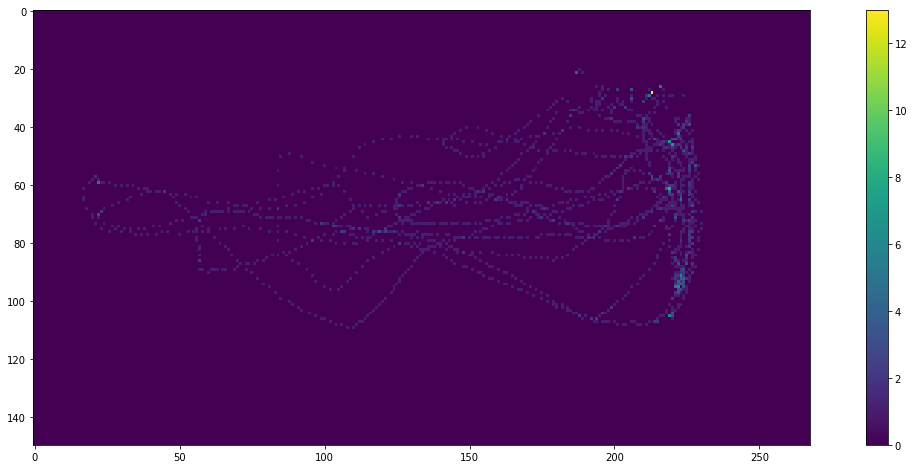

In [11]:
#Calculamos una distribucion de frecuencia
pos =  np.zeros(shape=(150,268))
cx, cy = cargar_centroides('variables/100-1C.txt')
for j in range(len(cx)):
    pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
plt.figure(figsize=(20,8))
plt.imshow(pos)
plt.colorbar()

In [18]:
#Calculamos la frecuencia todos los videos de control
height = 150
width = 268
prom1 = []
promp = np.zeros(shape=(height,width))
for i in range(5):
    pos =  np.zeros(shape=(150,268))
    path = 'variables/ACL099-'+str(i+1)+'C.txt'
    cx, cy = cargar_centroides(path)
    for j in range(len(cx)):
        pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
    promp+=pos
for i in range(5):
    for k in range(5):
        pos =  np.zeros(shape=(150,268))
        path = 'variables/10'+str(i)+'-'+str(k+1)+'C.txt'
        cx, cy = cargar_centroides(path)
        for j in range(len(cx)):
            pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
        promp+=pos
#CONTROL
prom1.append(promp)
promp = np.zeros(shape=(height,width))
###############################################################
for i in range(6):
    if((i+5) != 10):
        for k in range(5):
            pos =  np.zeros(shape=(150,268))
            path = 'variables/10'+str(i+5)+'-'+str(k+1)+'C.txt'  
            cx, cy = cargar_centroides(path)
            for j in range(len(cx)):
                pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
            promp+=pos
    else:
        for k in range(5):
            pos =  np.zeros(shape=(150,268))
            path = 'variables/1'+str(i+5)+'-'+str(k+1)+'C.txt'  
            cx, cy = cargar_centroides(path)
            for j in range(len(cx)):
                pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
            promp+=pos
#ESTRES 0
prom1.append(promp)
promp = np.zeros(shape=(height,width))
################################################################
for i in range(6):
    for k in range(5):
        pos =  np.zeros(shape=(150,268))
        path = 'variables/1'+str(i+11)+'-'+str(k+1)+'C.txt'  
        cx, cy = cargar_centroides(path)
        for j in range(len(cx)):
            pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
        promp+=pos
#ESTRES 10
prom1.append(promp)
promp = np.zeros(shape=(height,width))
################################################################
for i in range(4):
    for k in range(5):
        pos =  np.zeros(shape=(150,268))
        path = 'variables/1'+str(i+17)+'-'+str(k+1)+'C.txt'  
        cx, cy = cargar_centroides(path)
        for j in range(len(cx)):
            pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
        promp+=pos
#ESTRES 100
prom1.append(promp)
#promp = np.zeros(shape=(height,width))


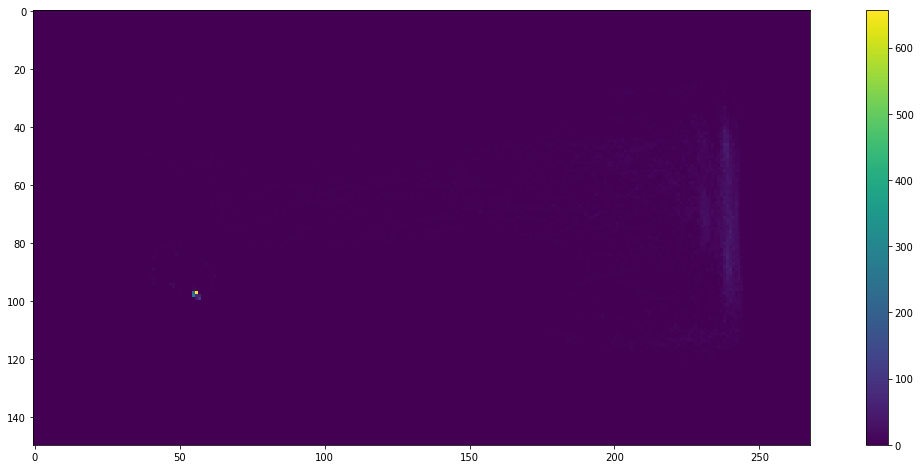

In [22]:
plt.figure(figsize=(20,8))
#breking = np.linspace(0 , 1, 20)
plt.imshow(prom1[3])
plt.colorbar()

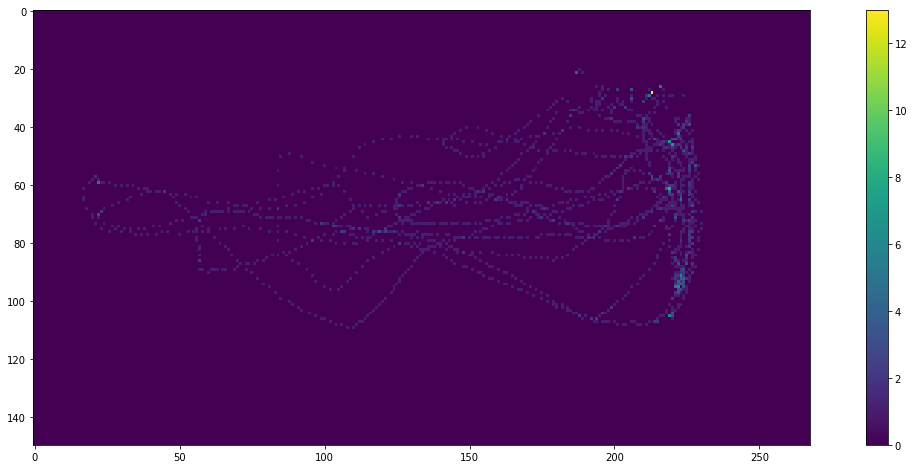

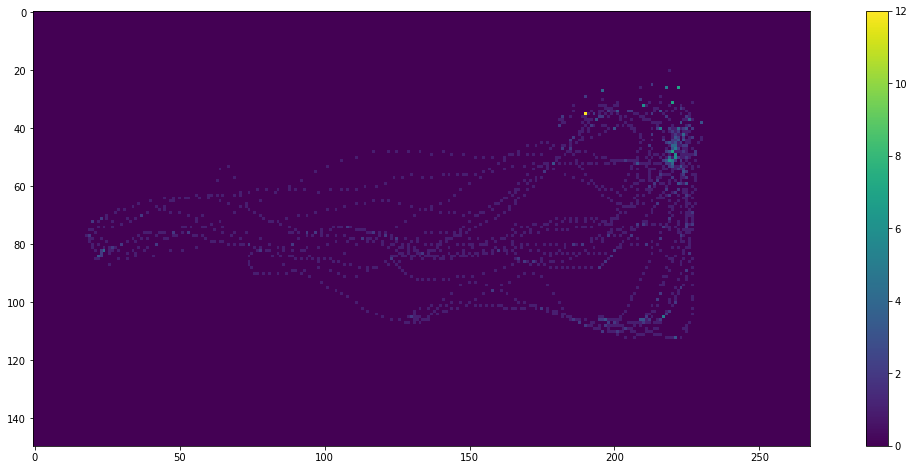

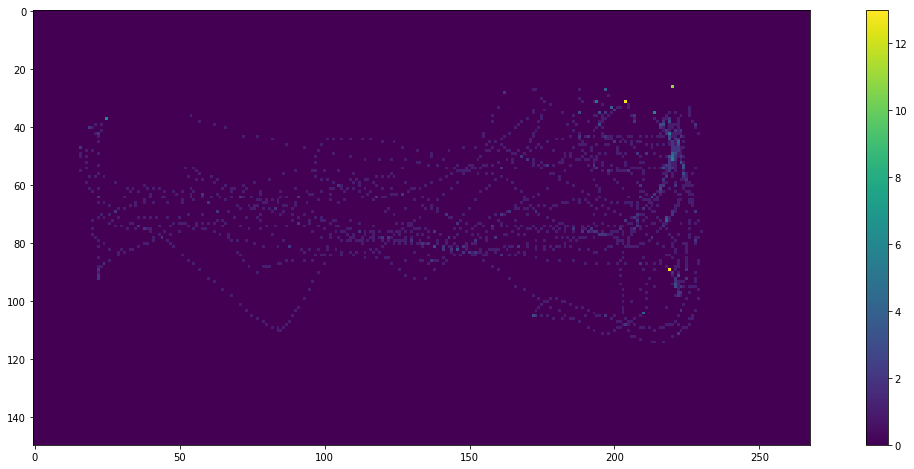

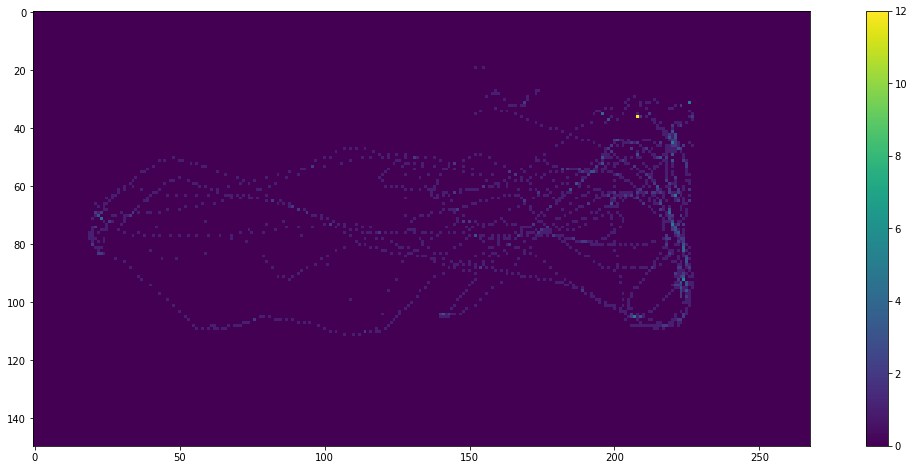

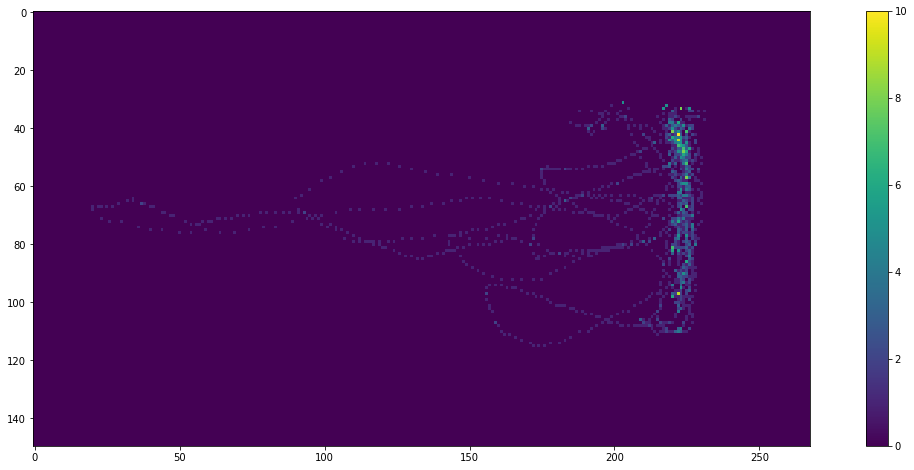

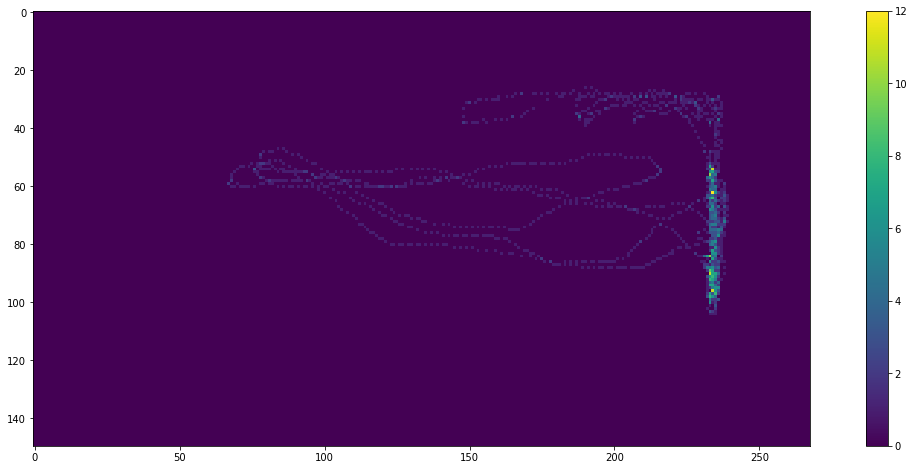

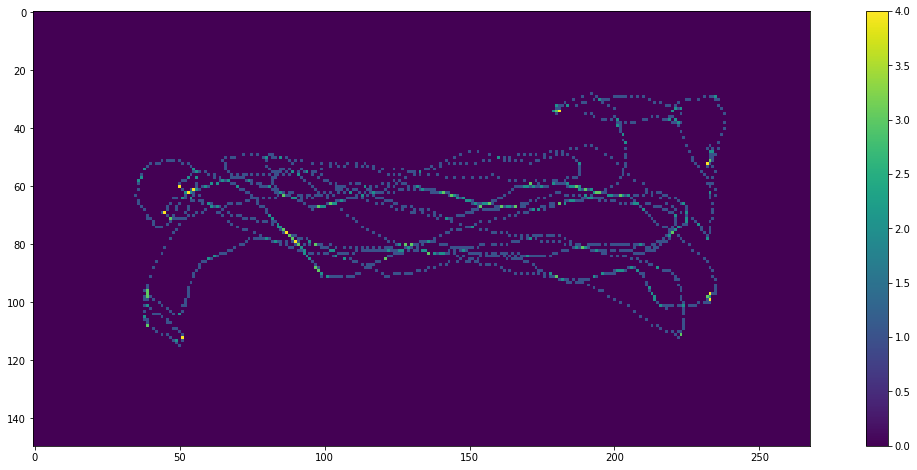

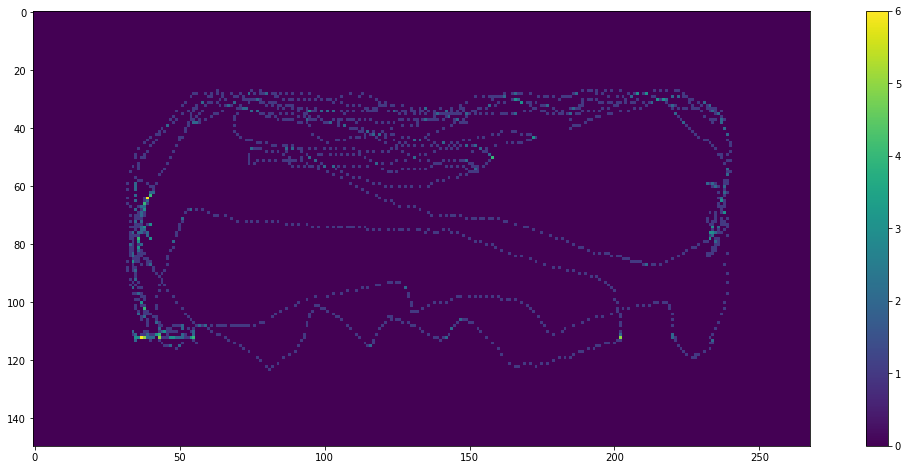

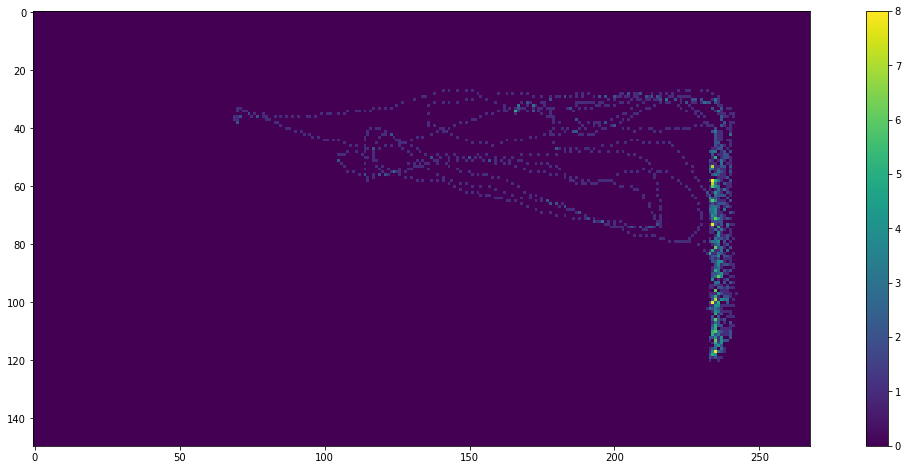

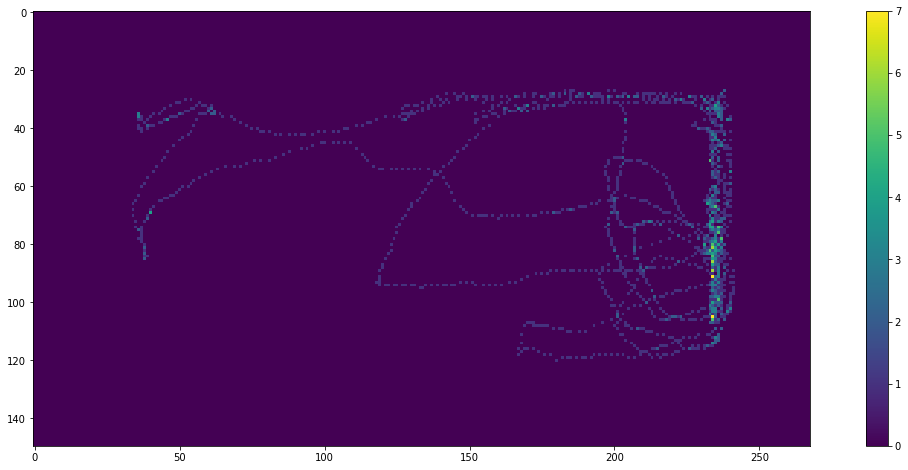

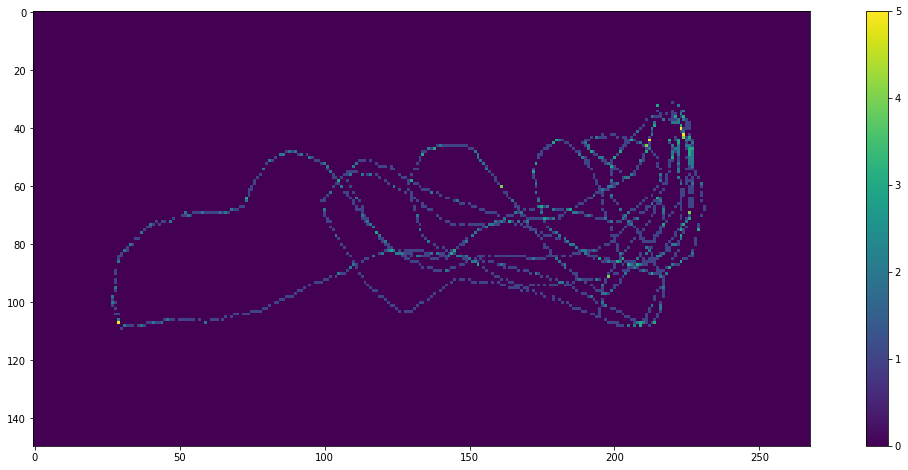

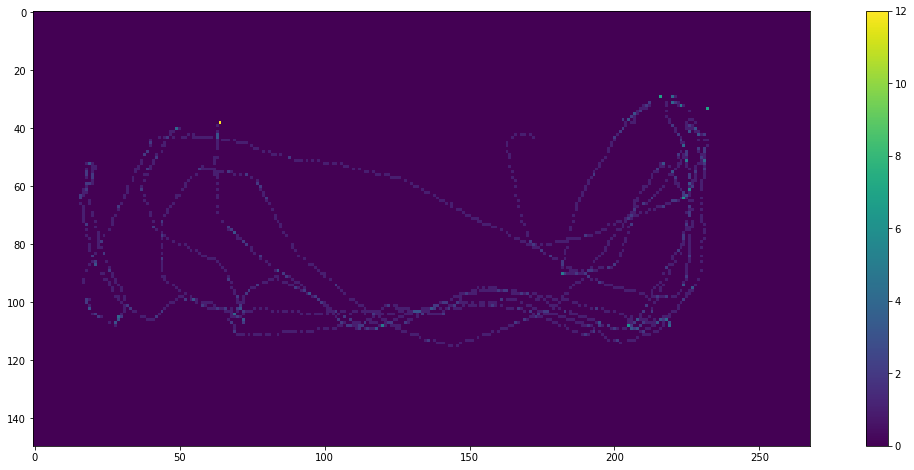

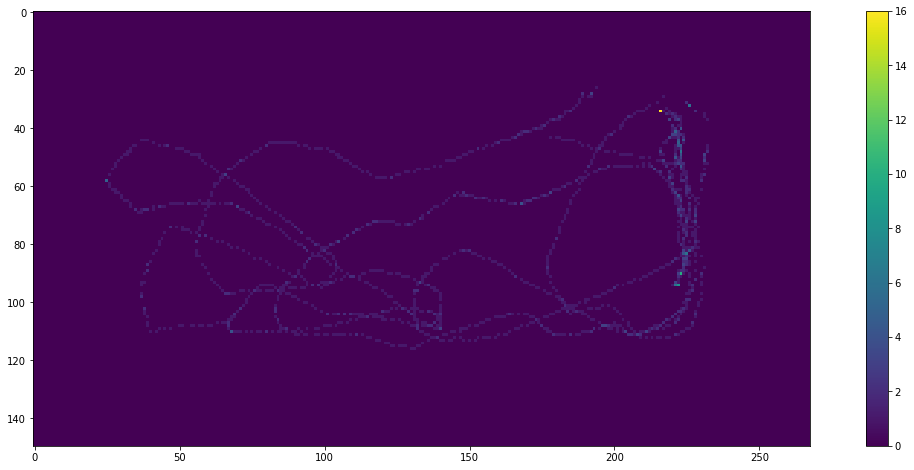

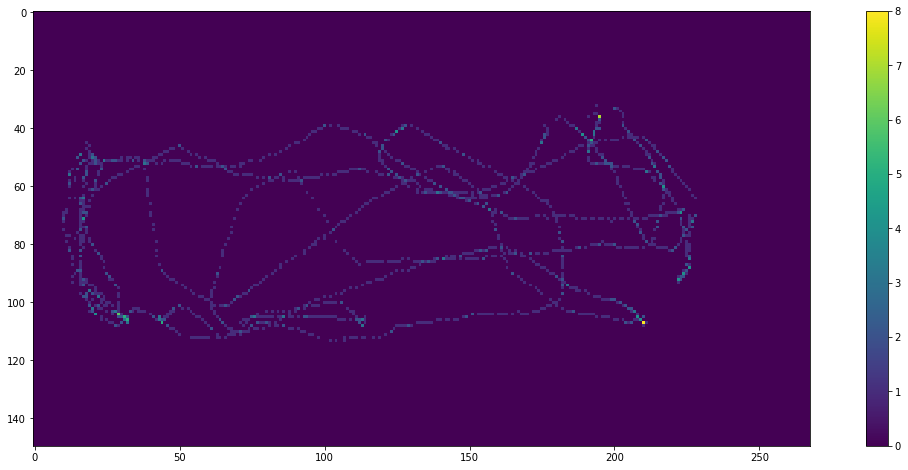

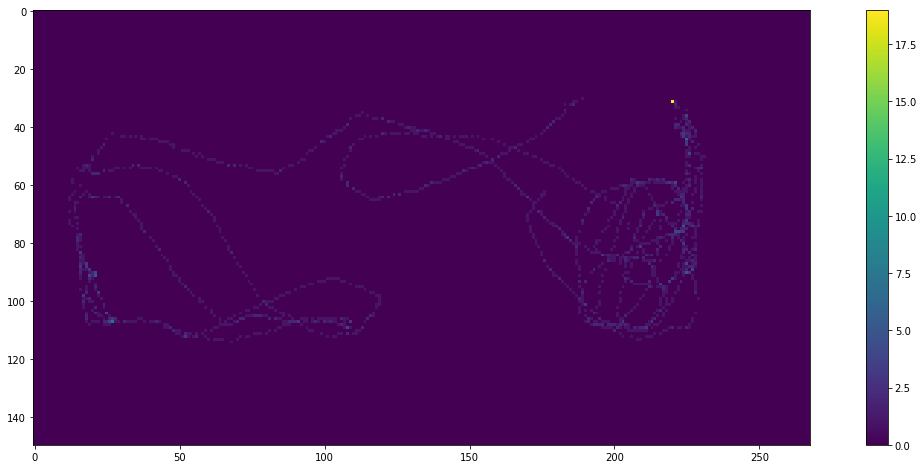

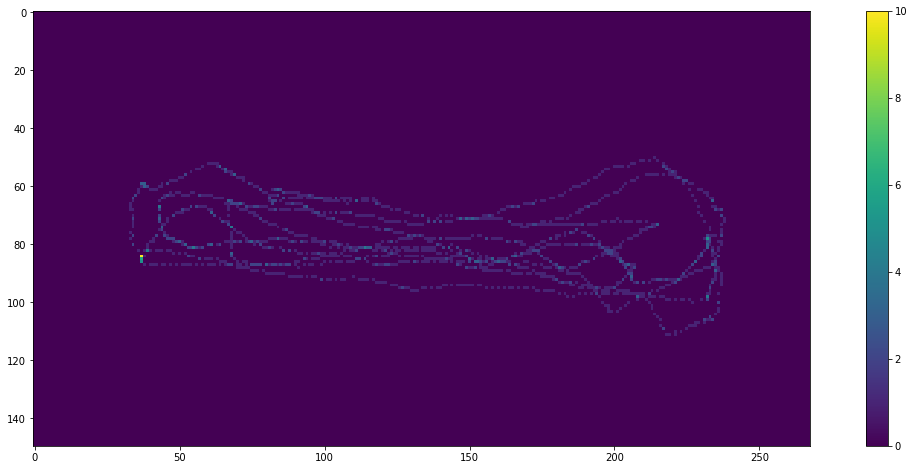

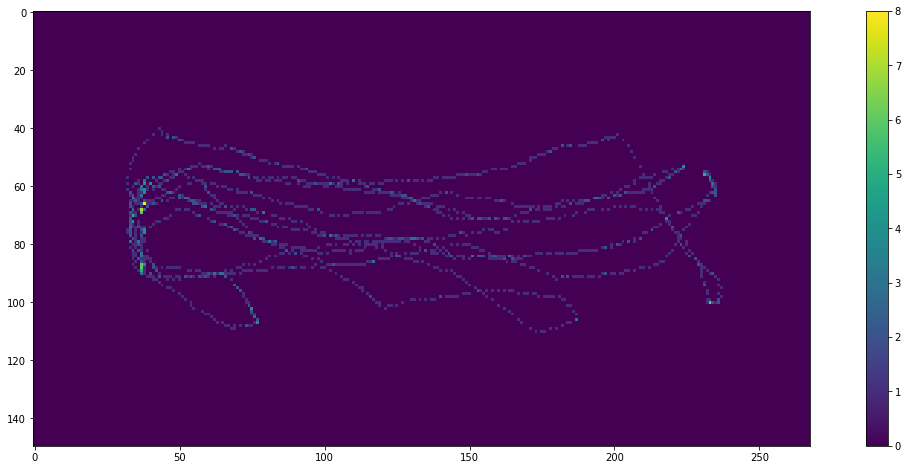

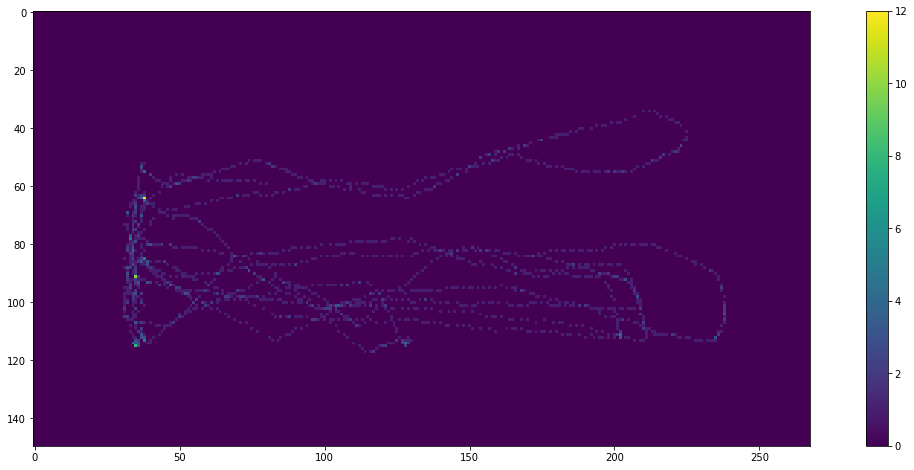

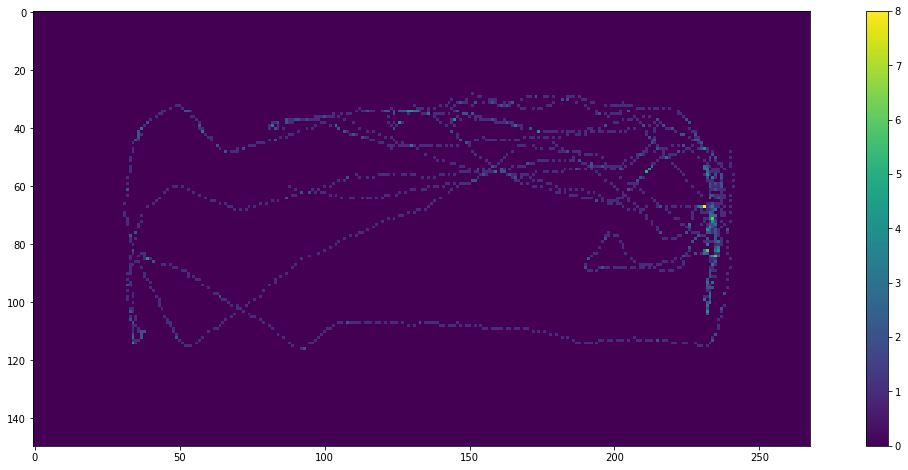

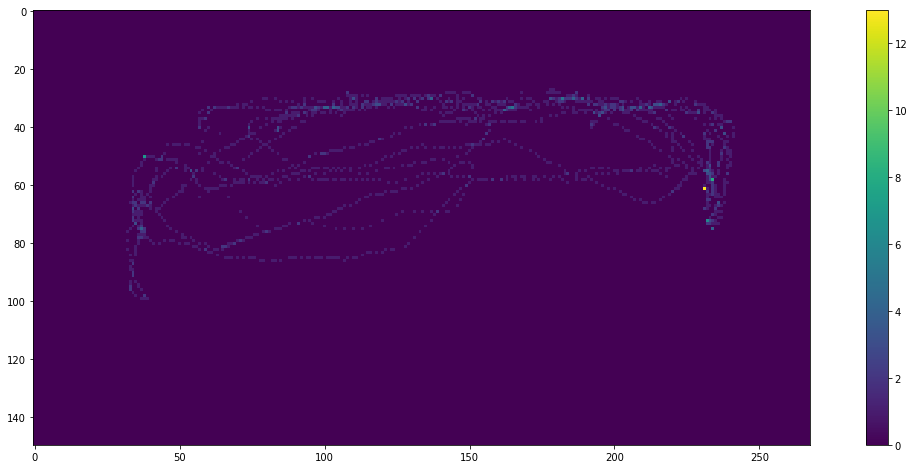

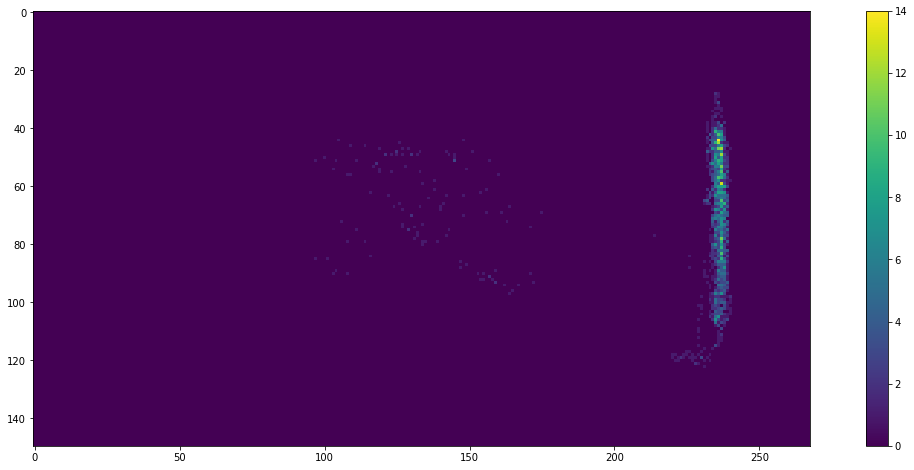

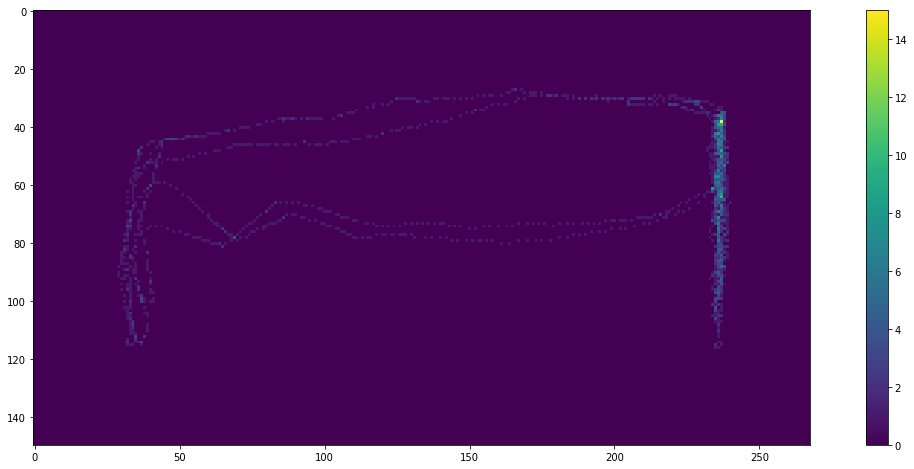

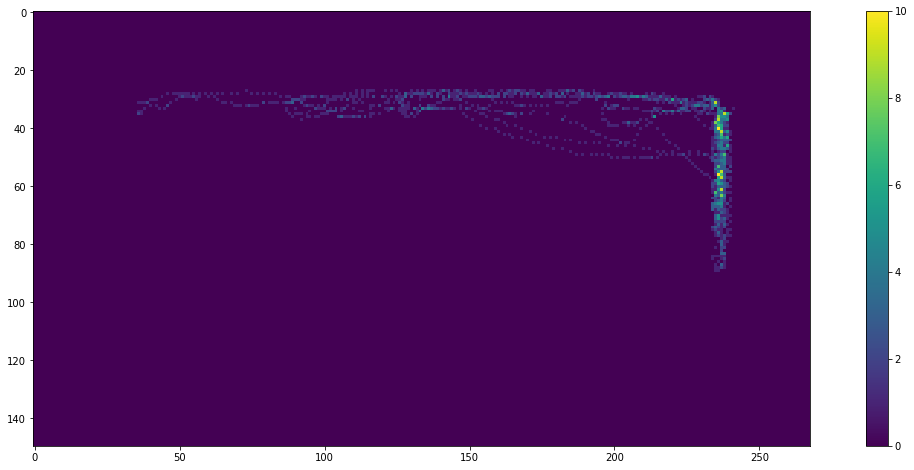

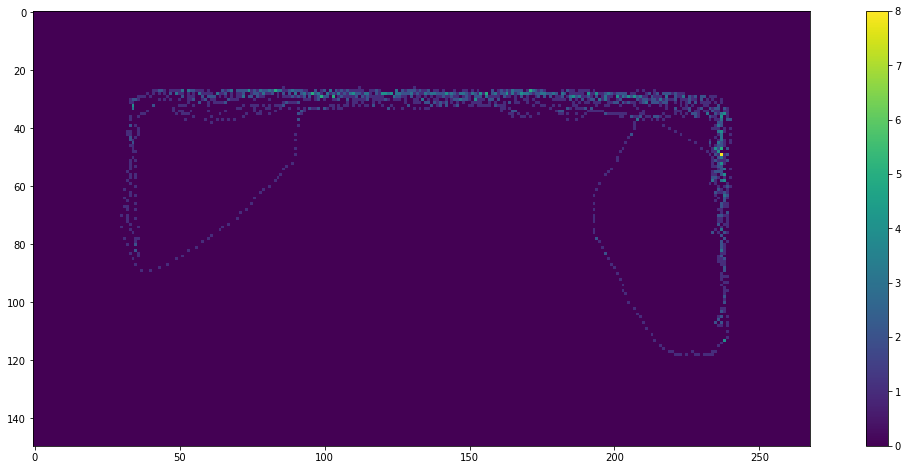

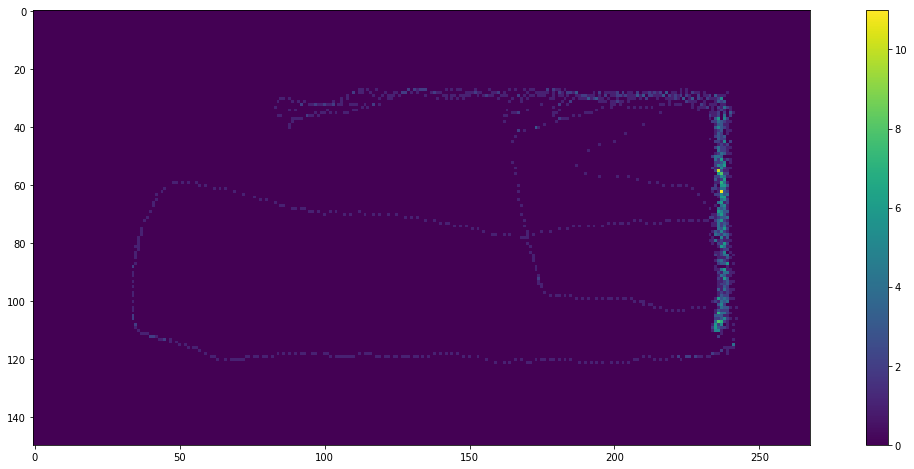

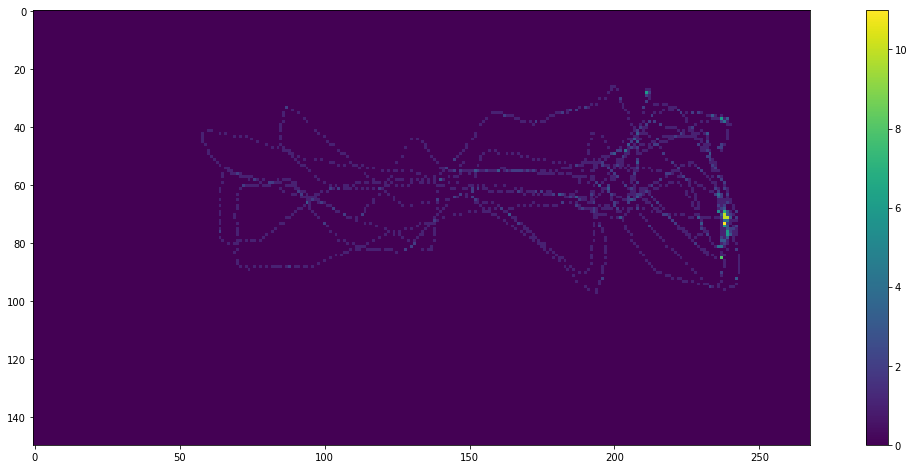

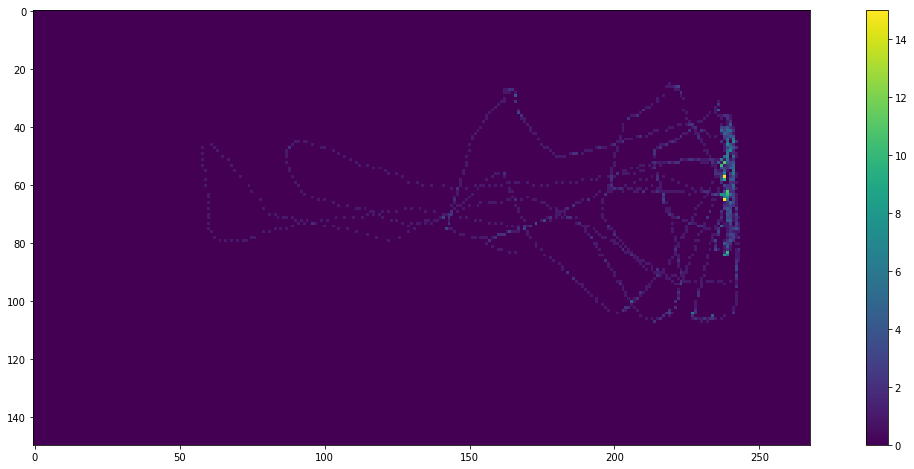

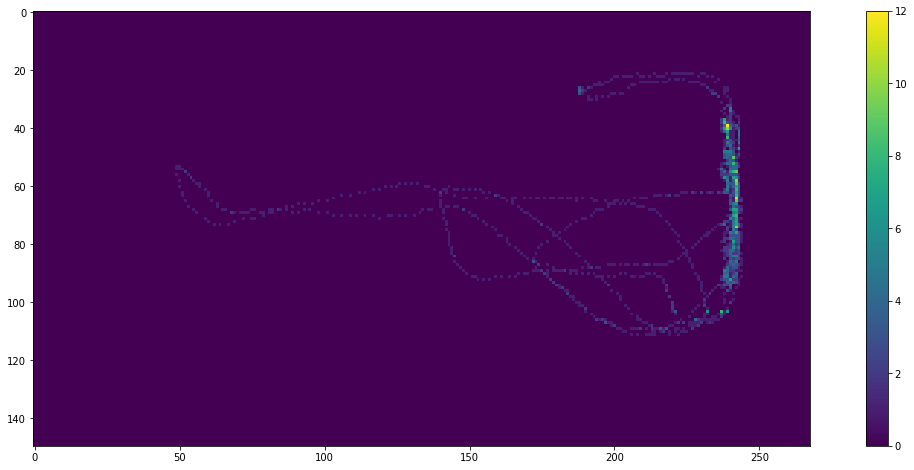

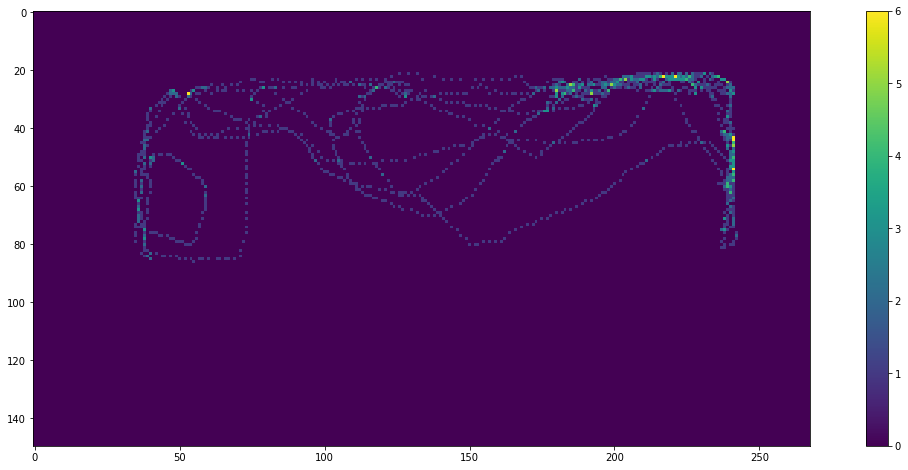

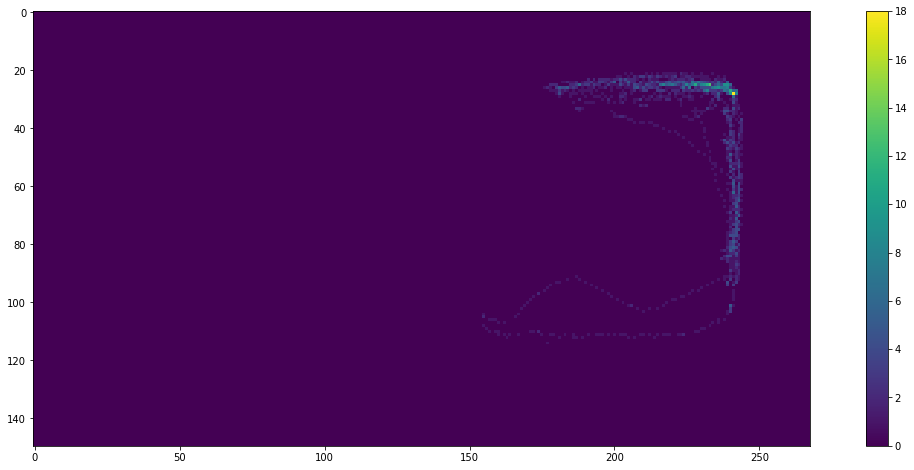

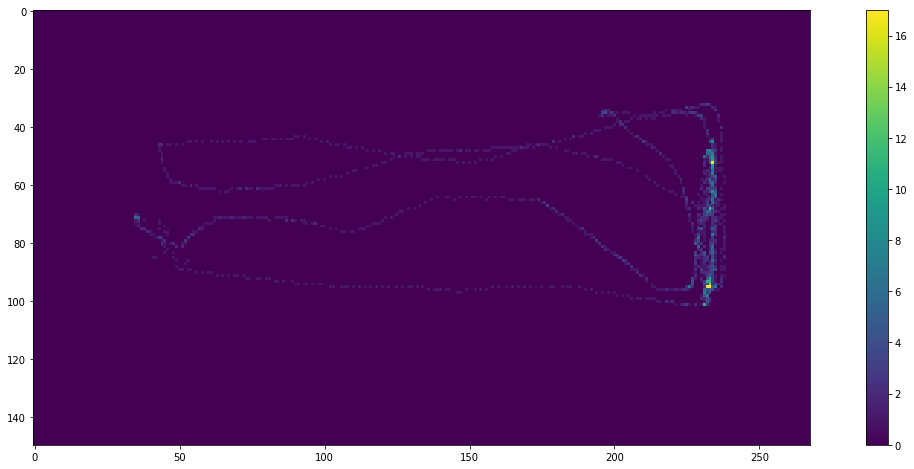

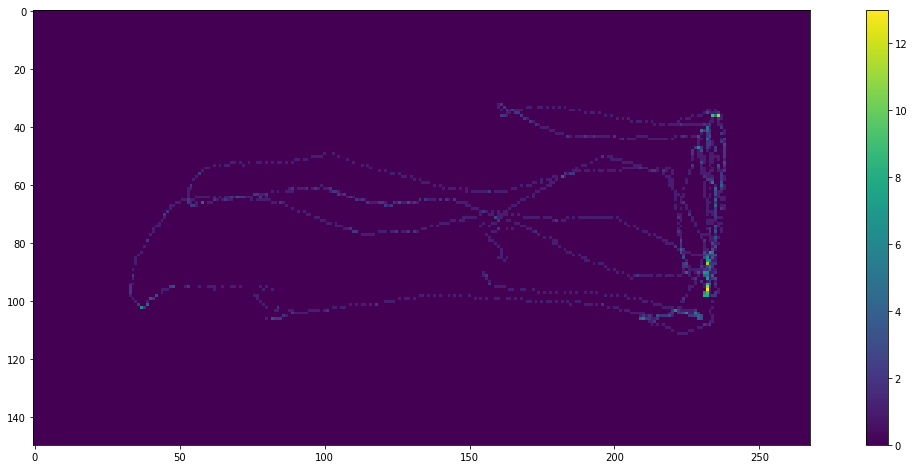

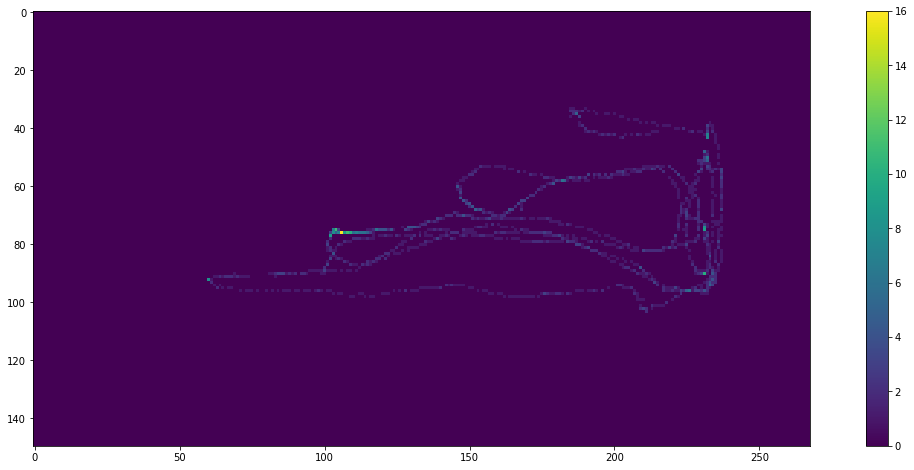

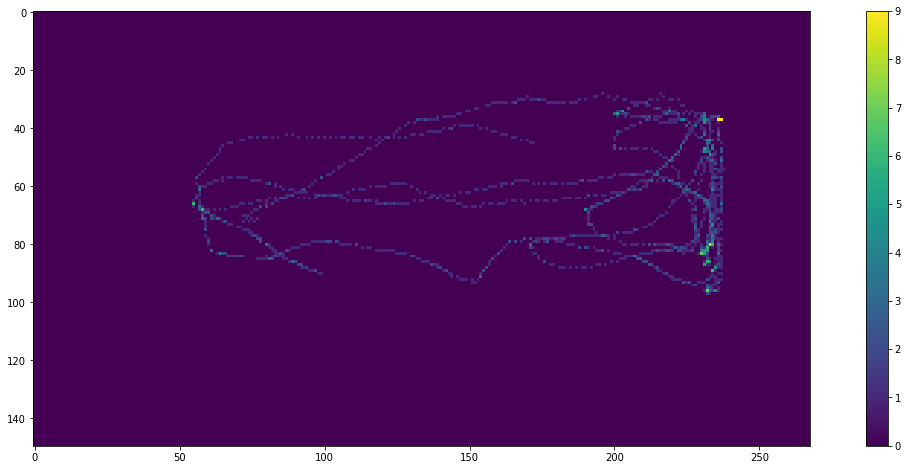

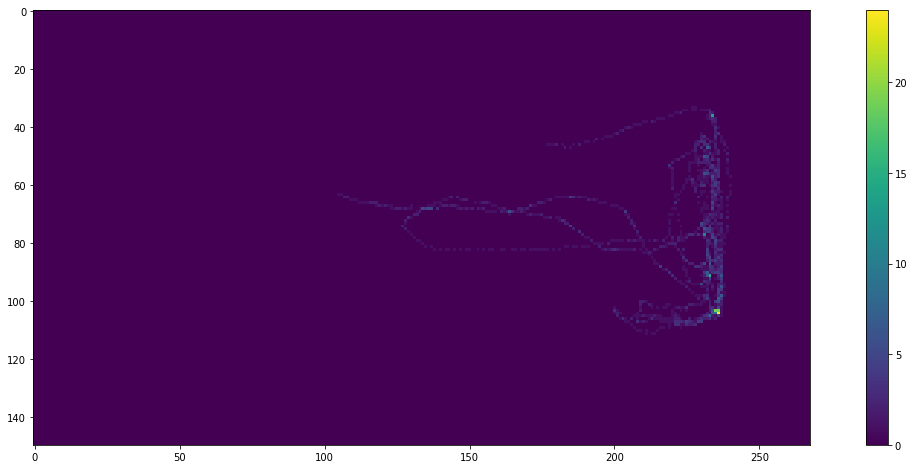

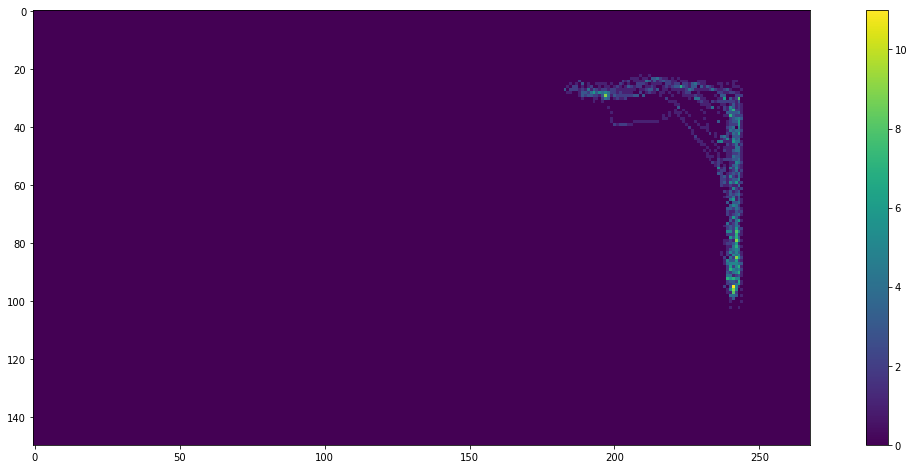

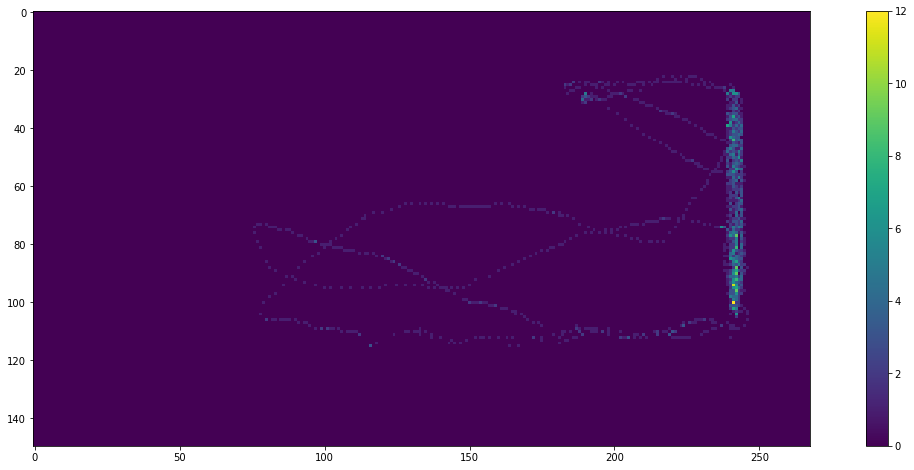

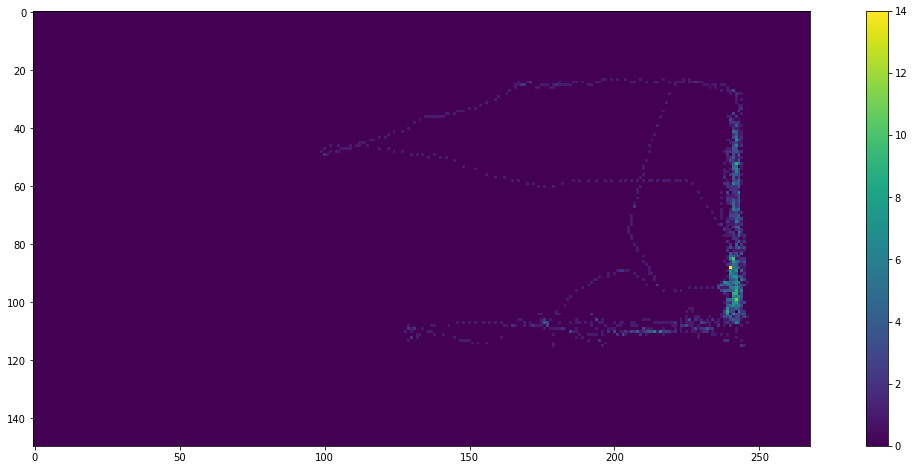

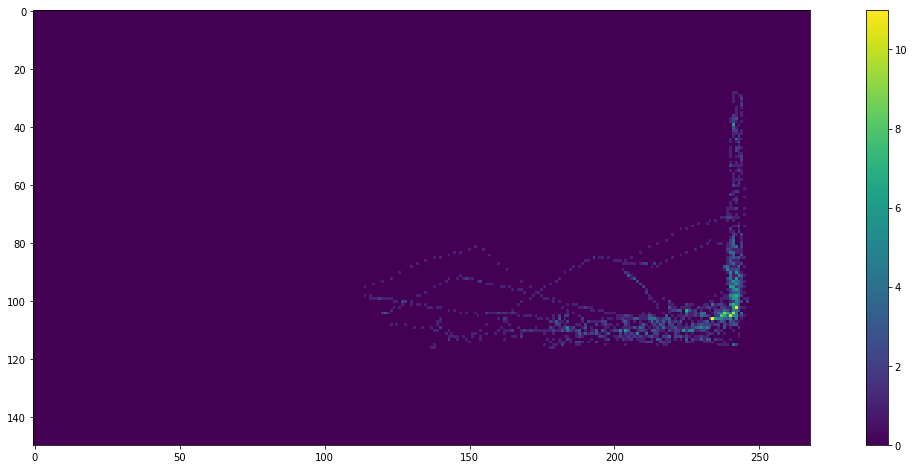

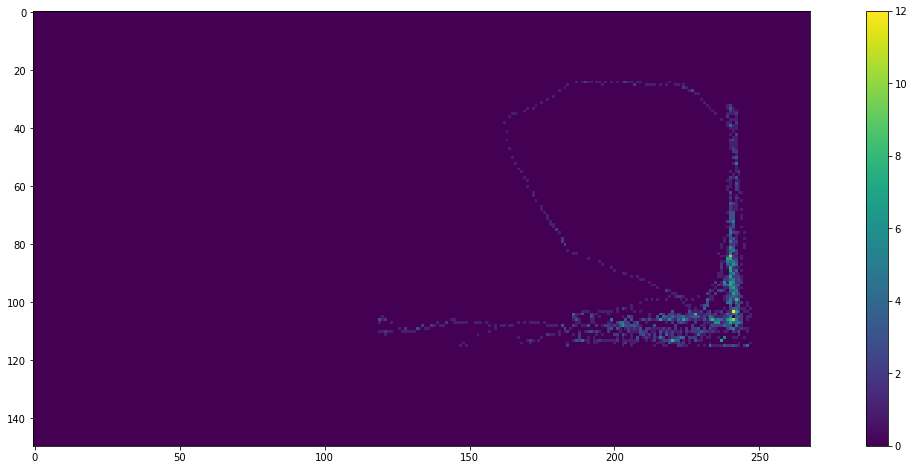

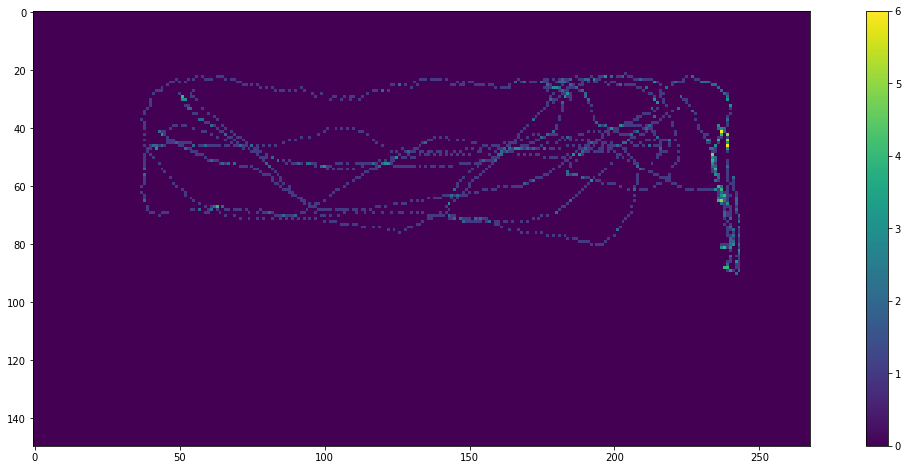

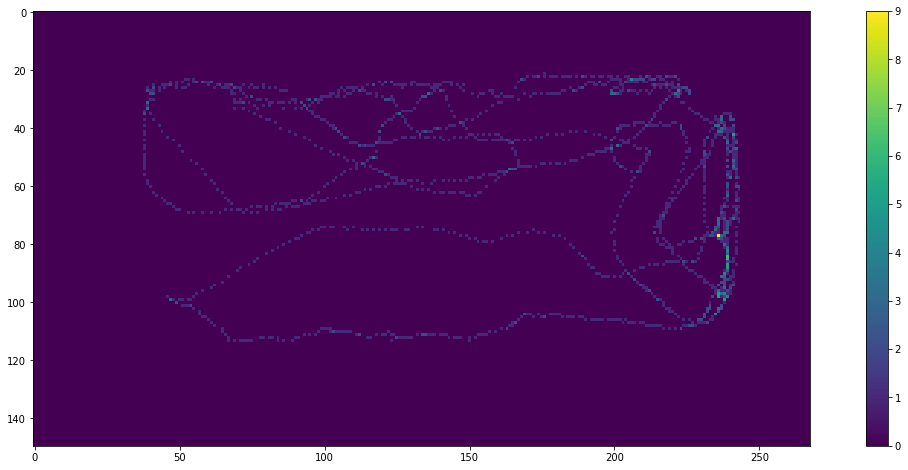

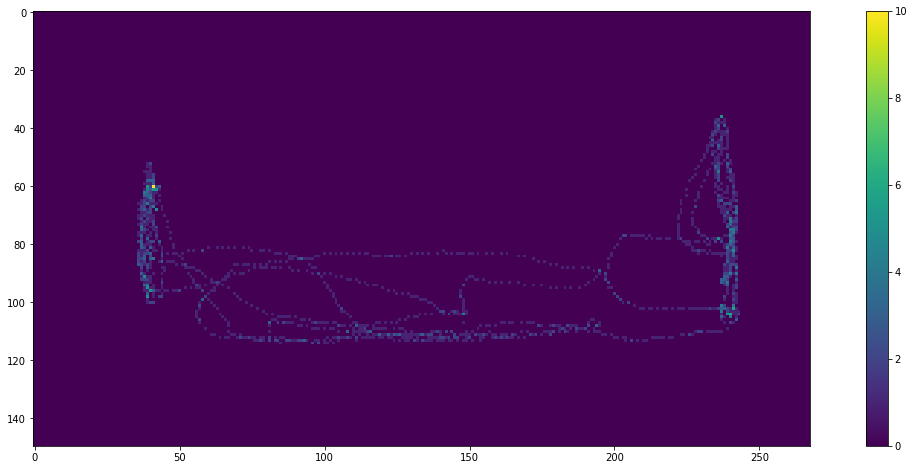

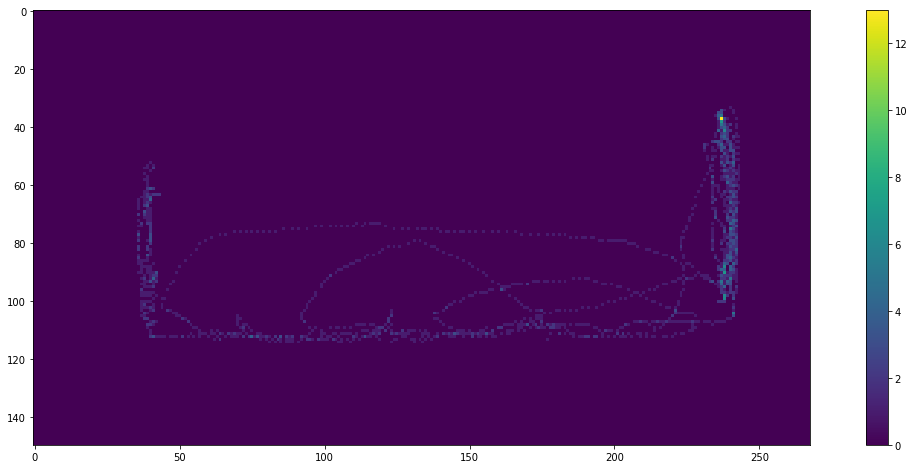

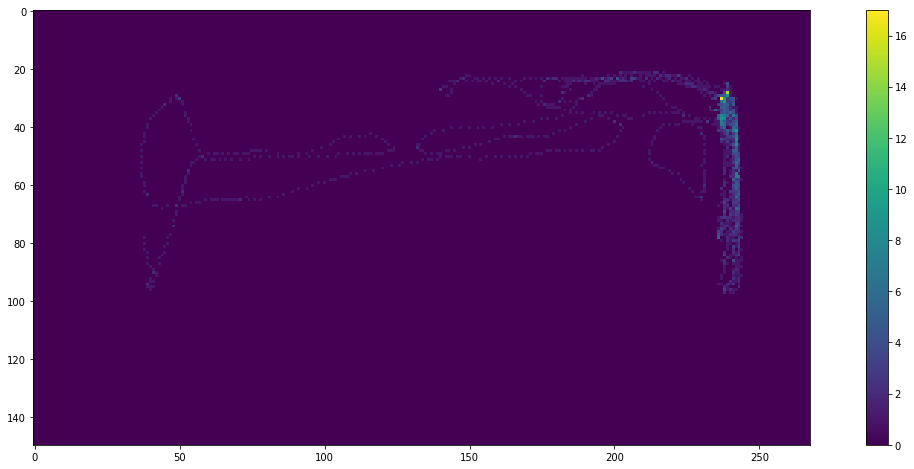

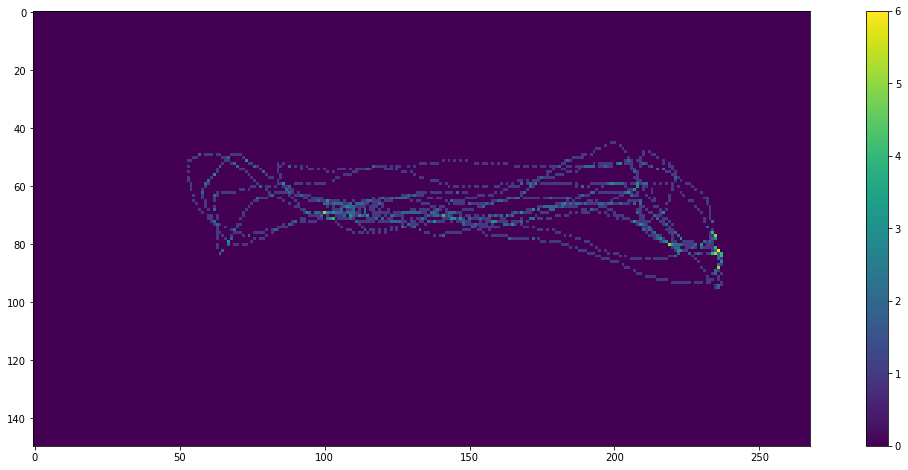

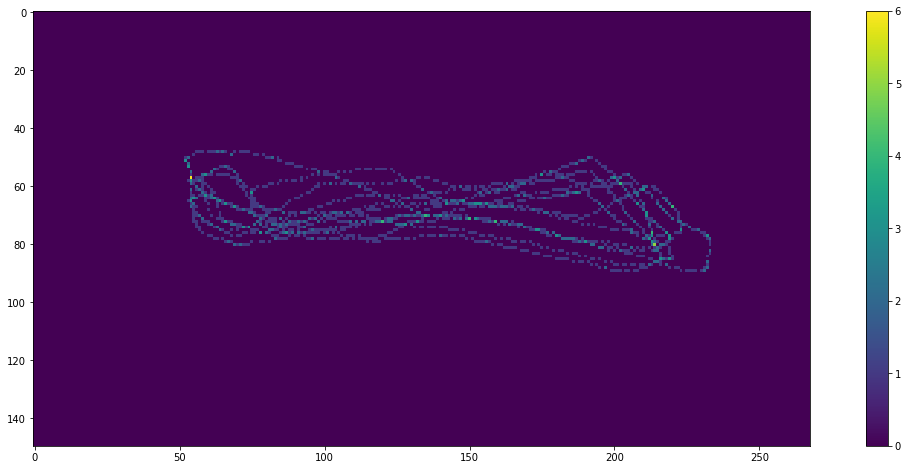

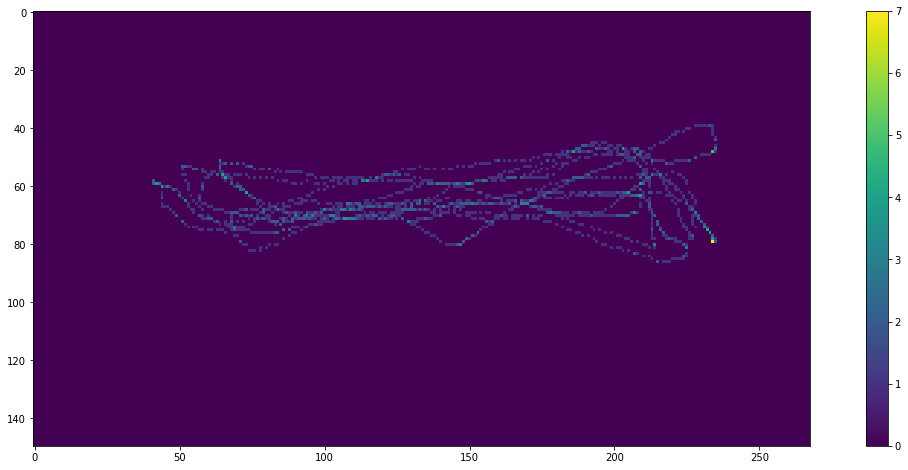

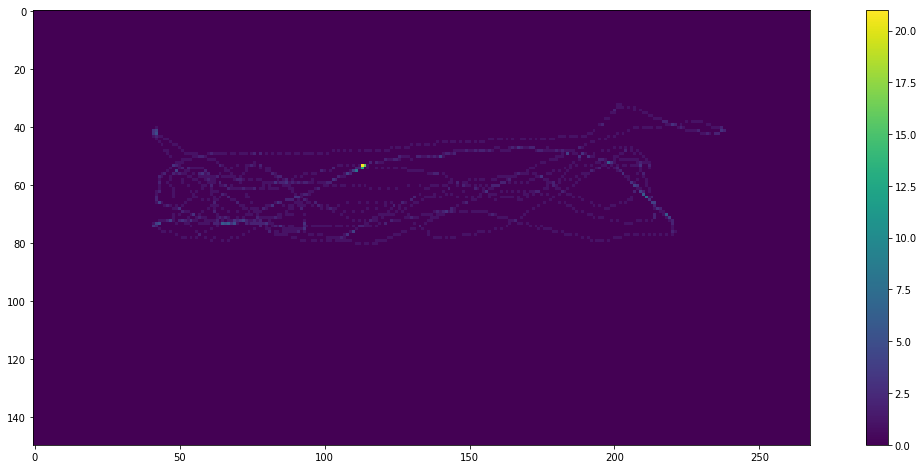

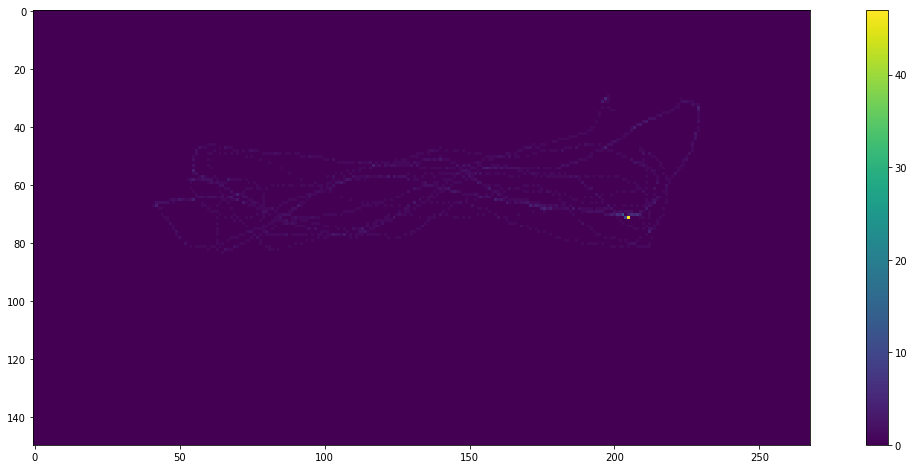

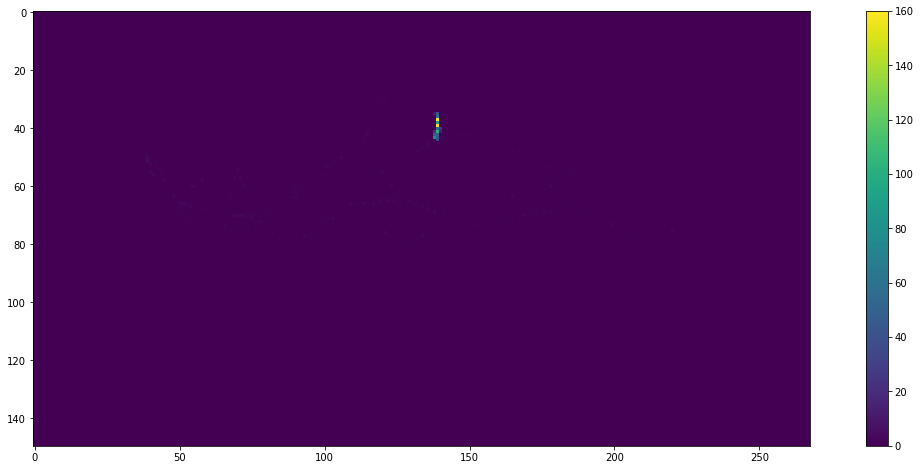

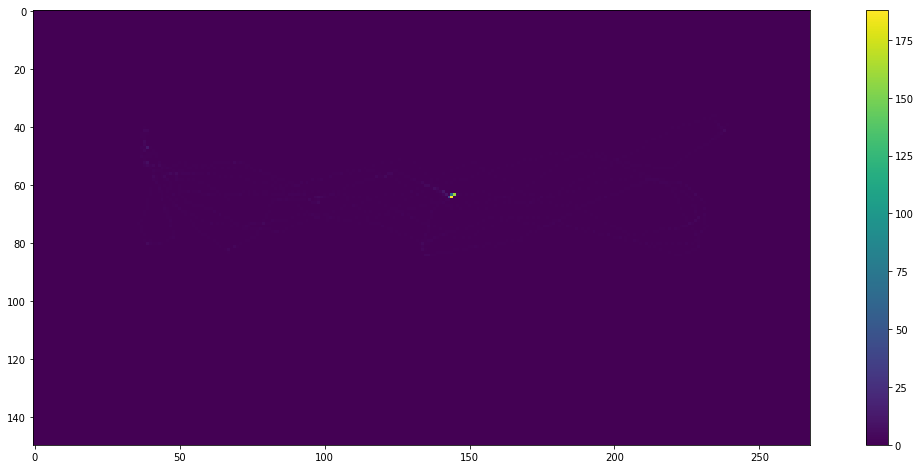

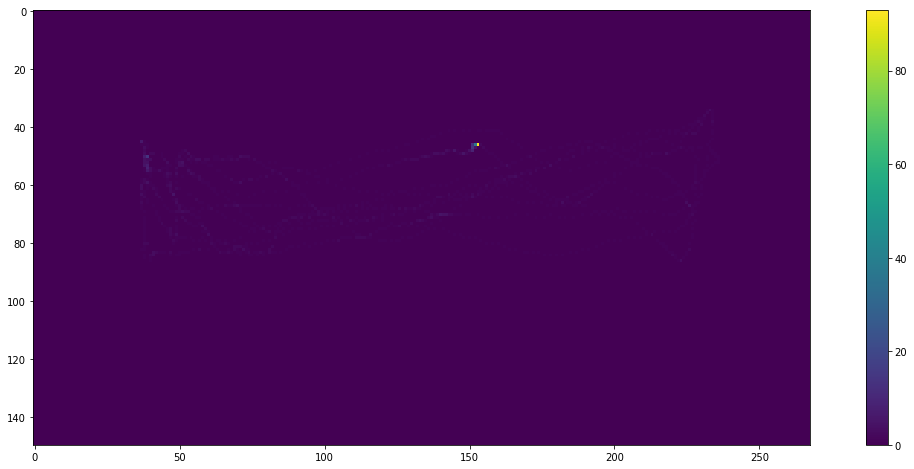

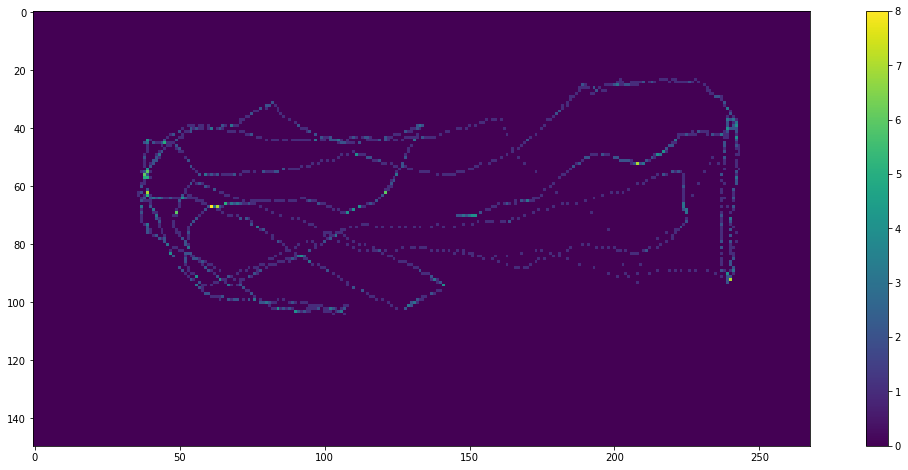

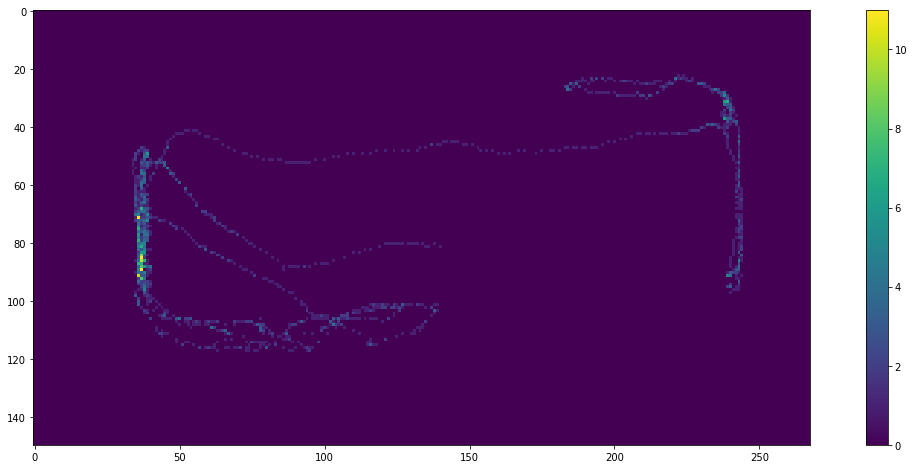

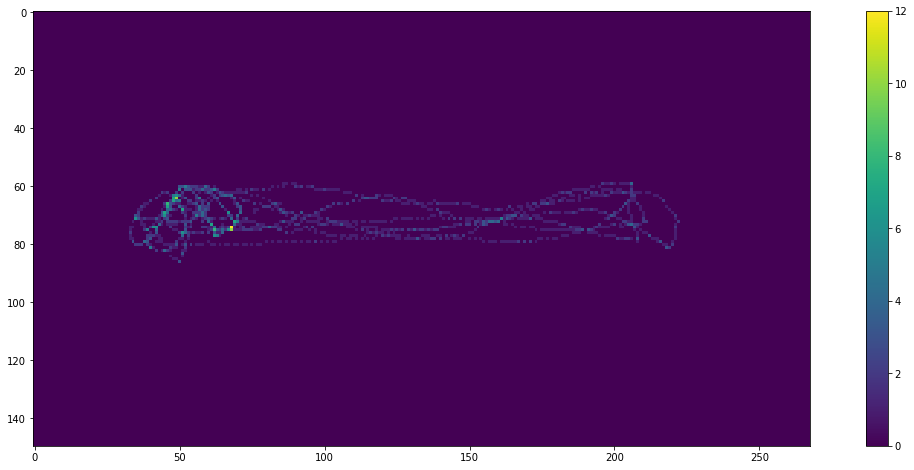

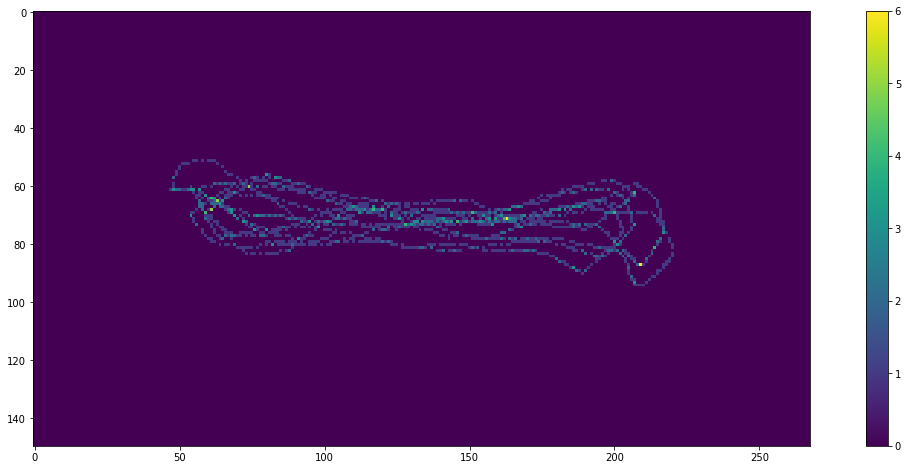

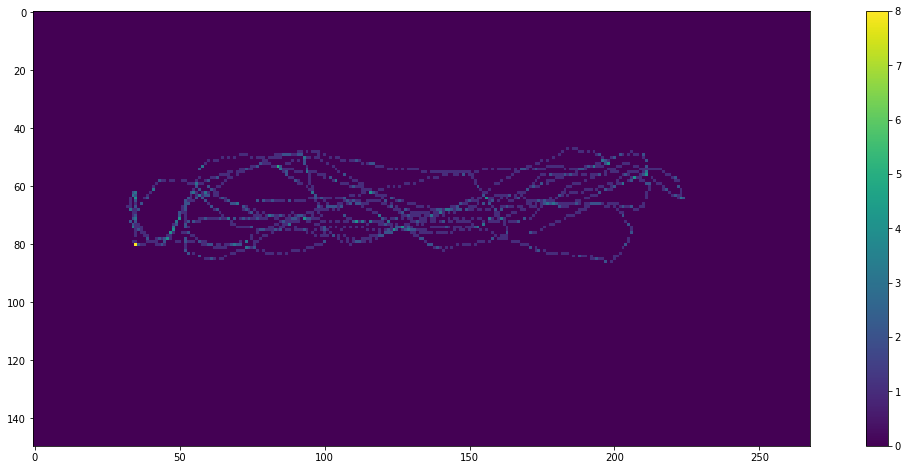

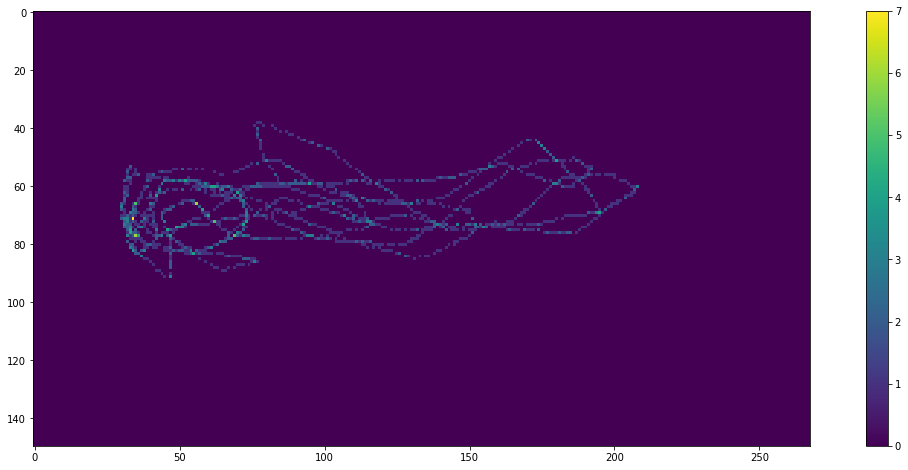

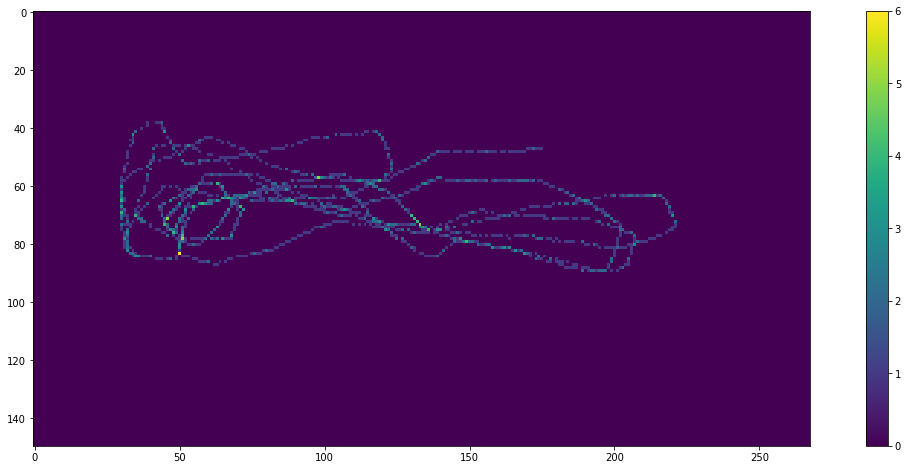

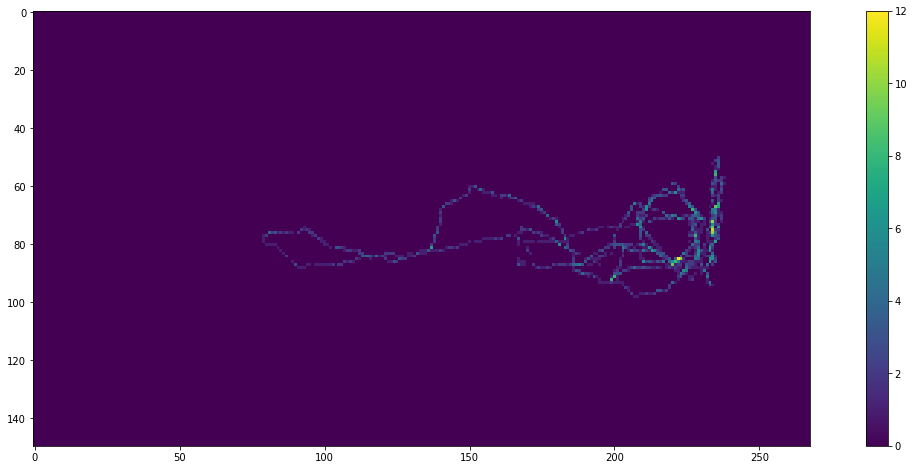

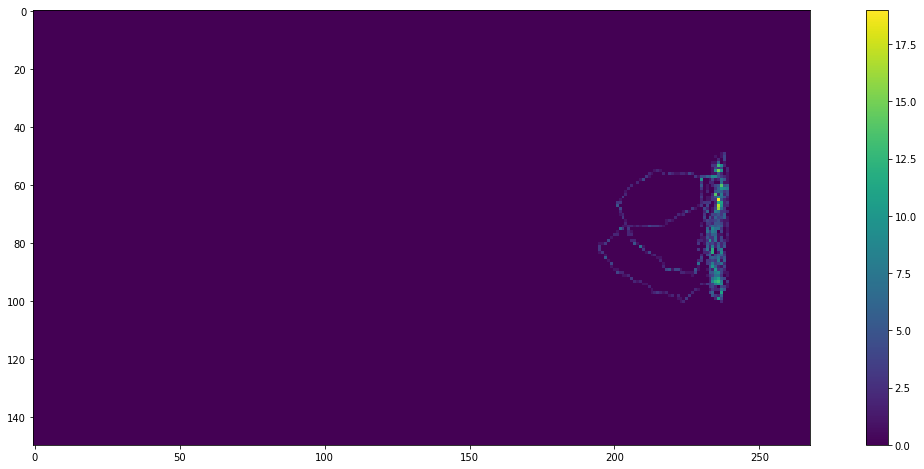

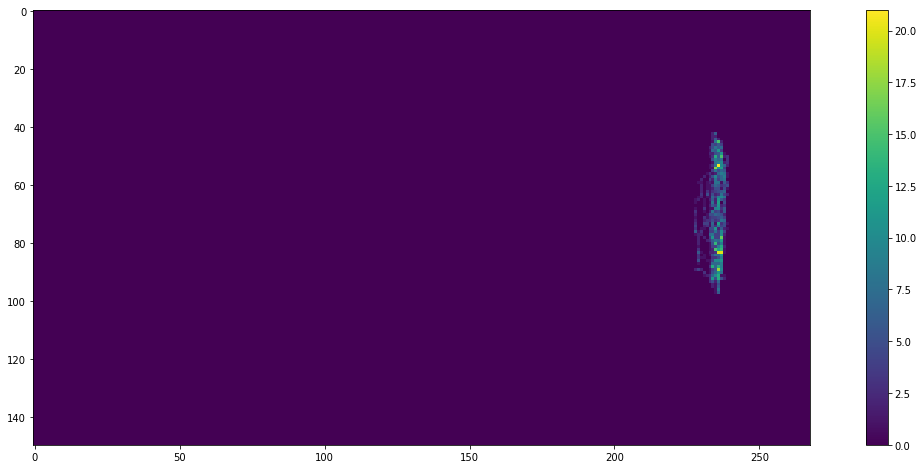

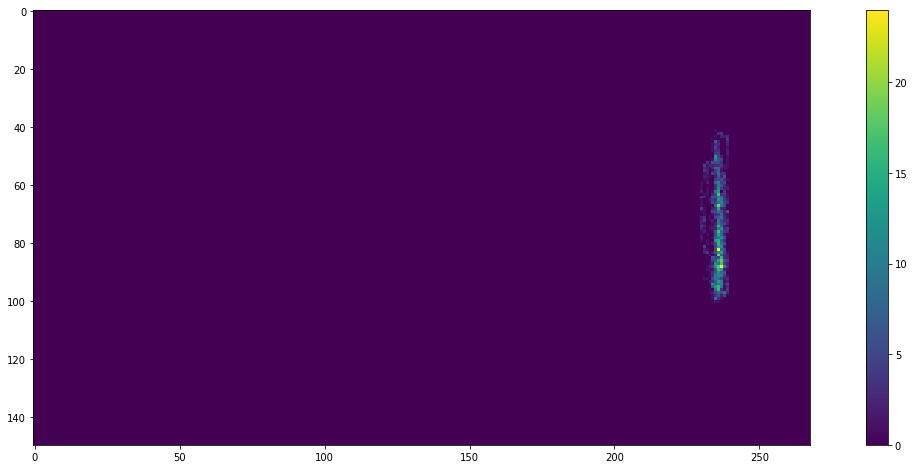

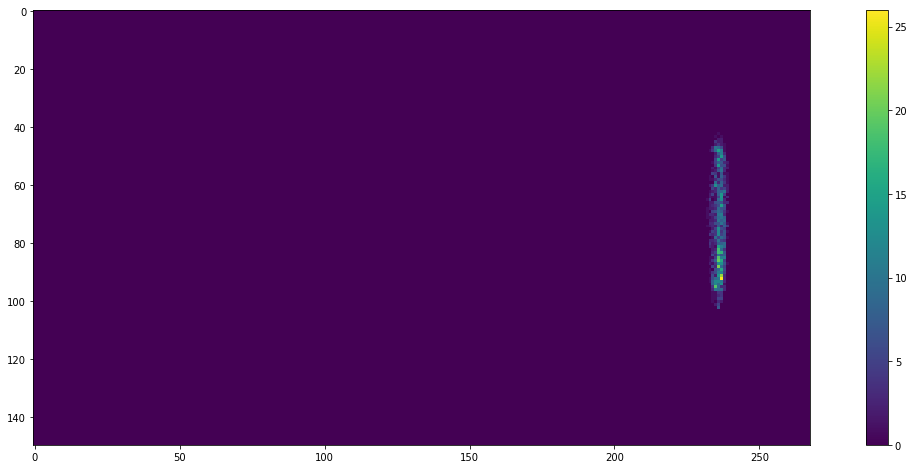

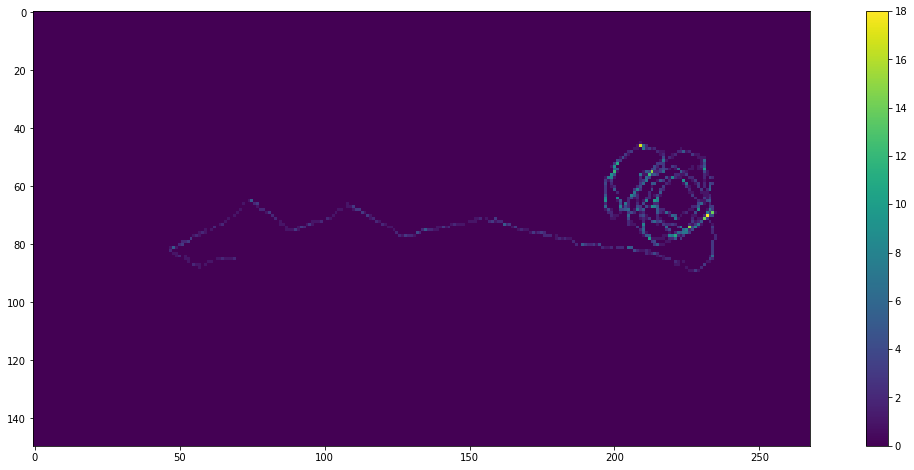

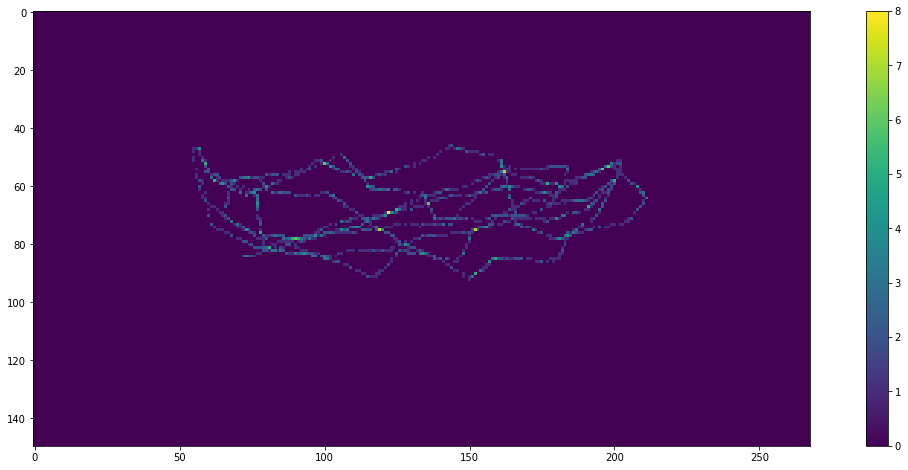

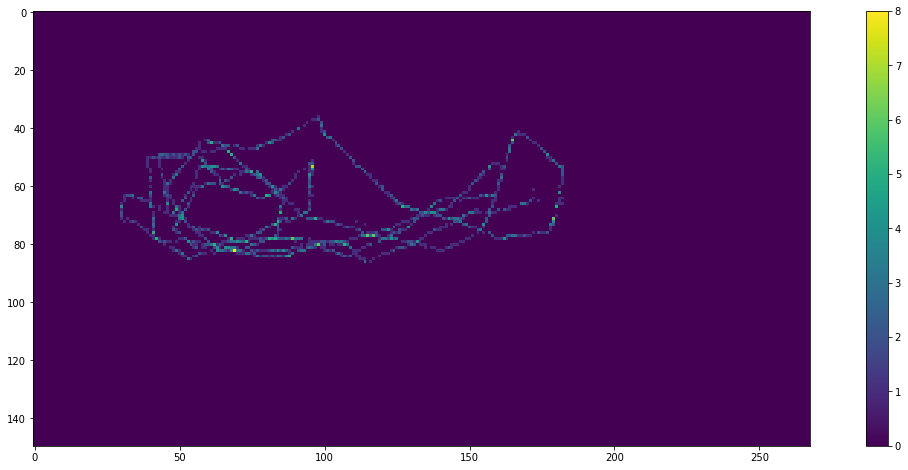

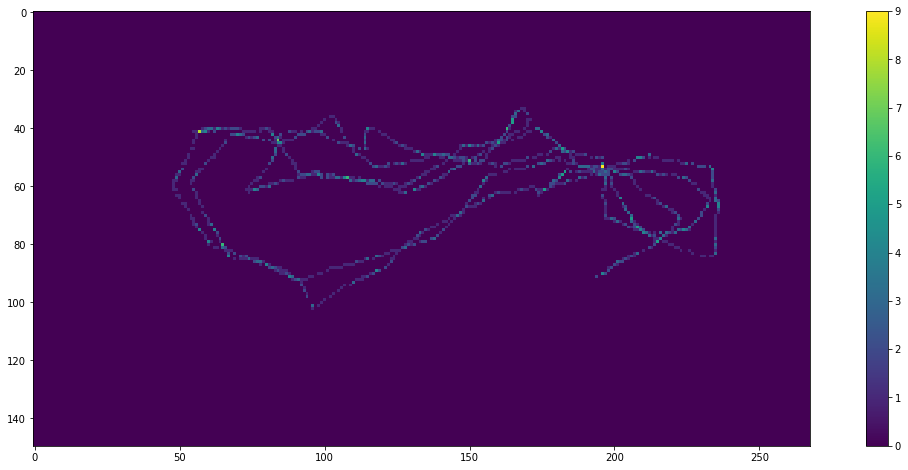

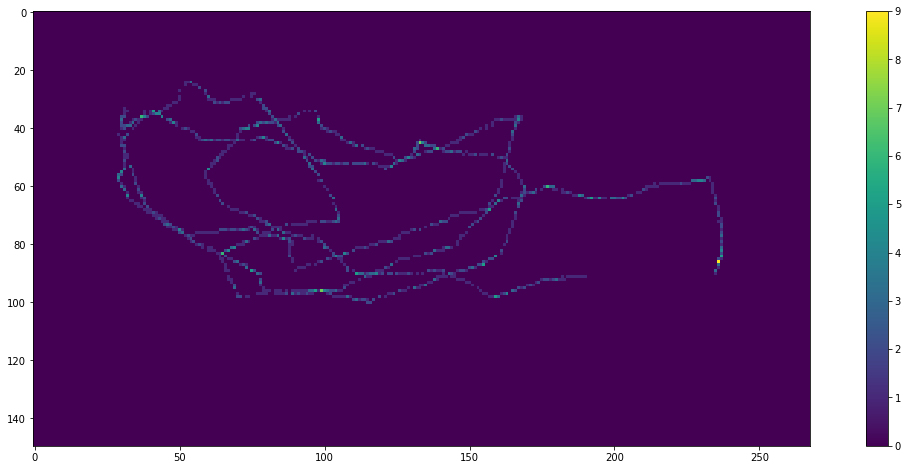

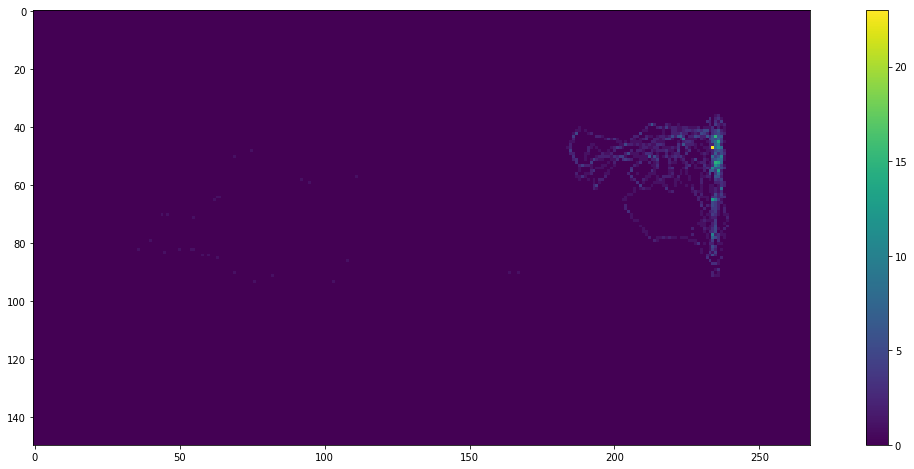

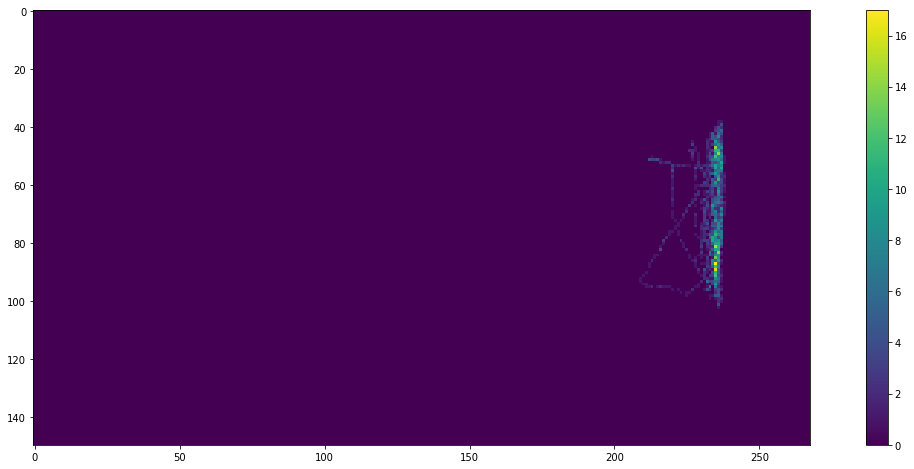

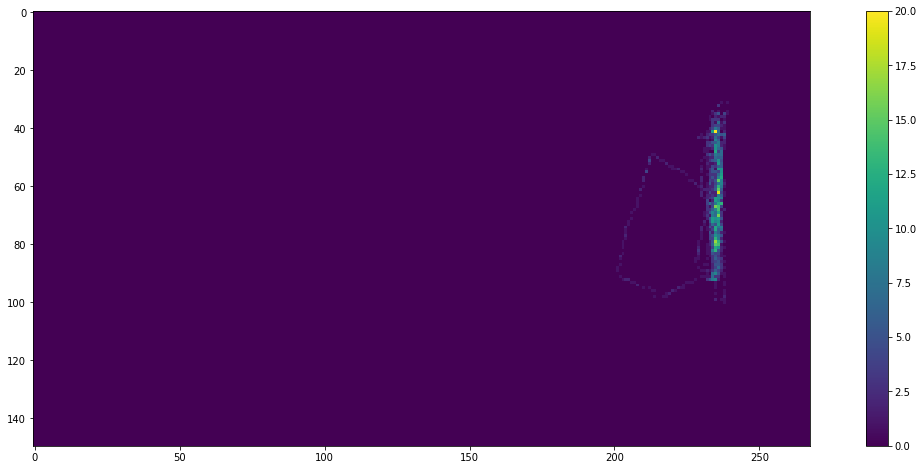

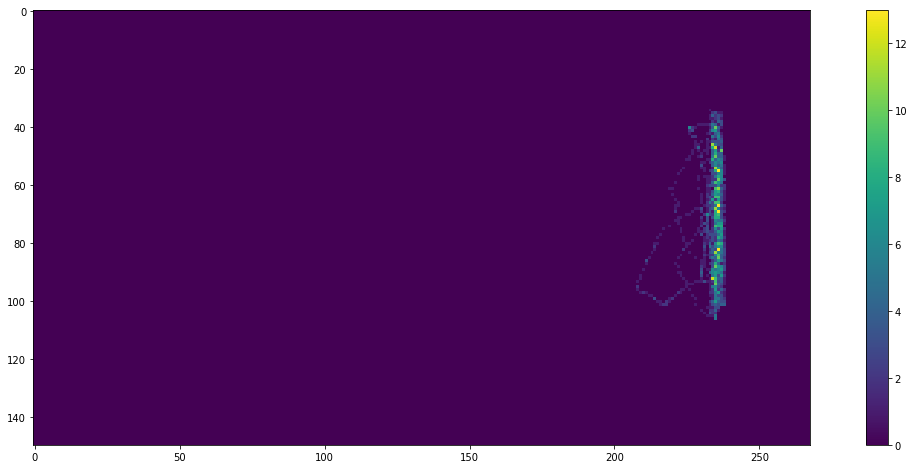

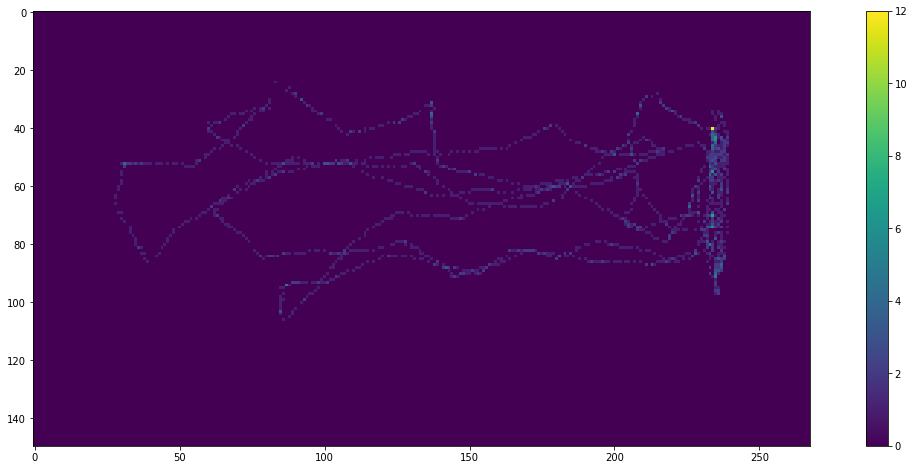

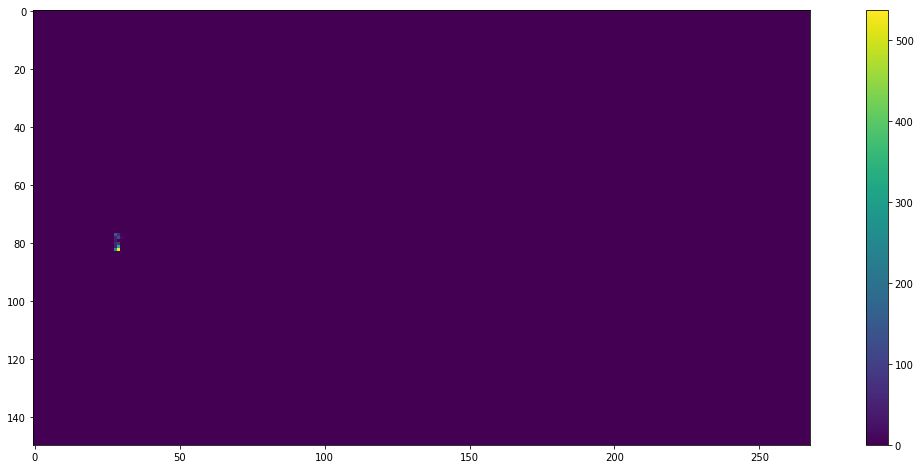

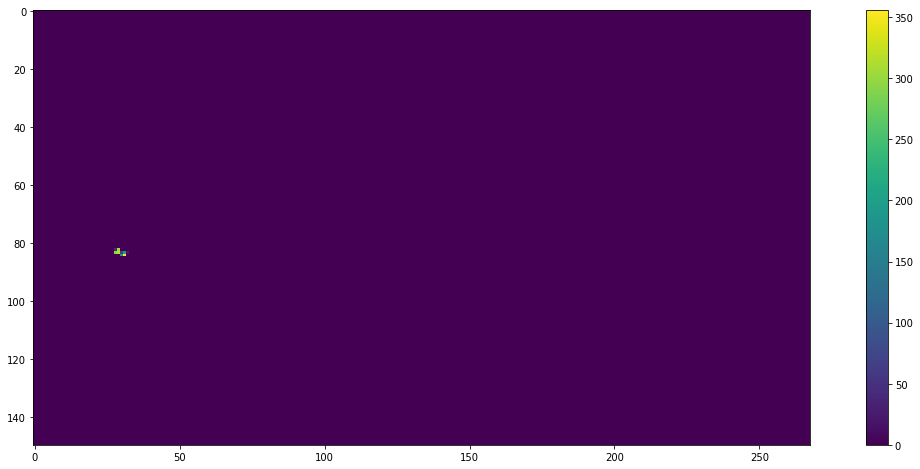

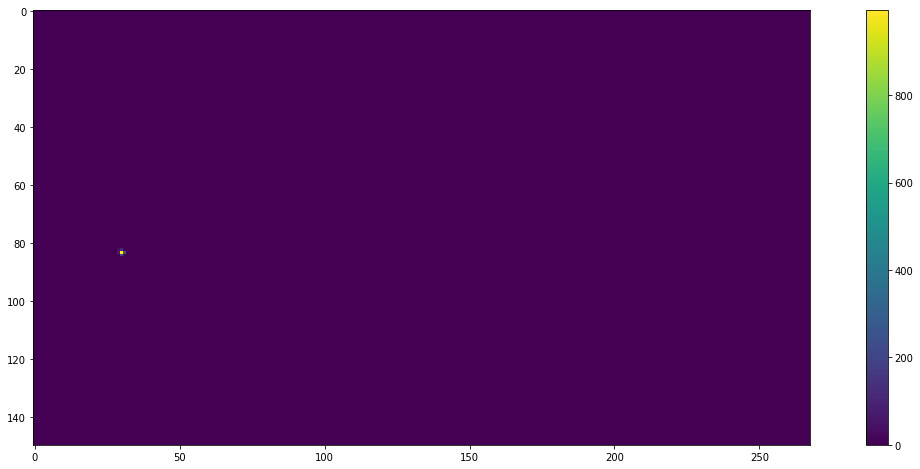

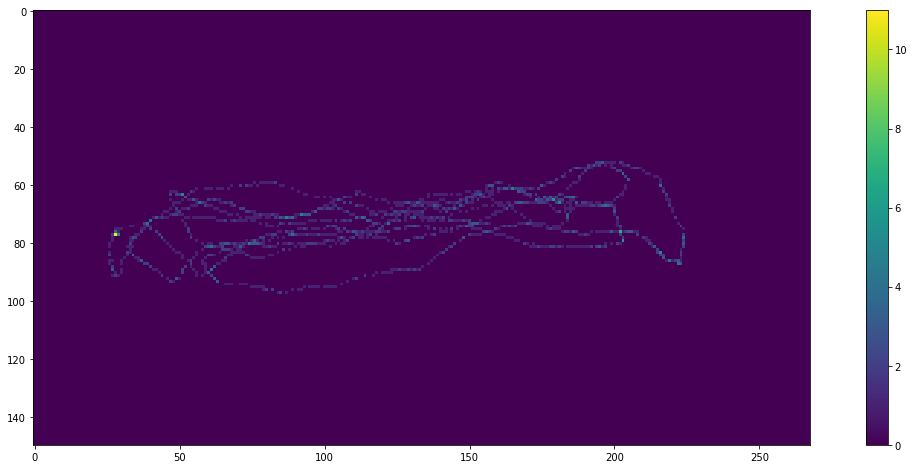

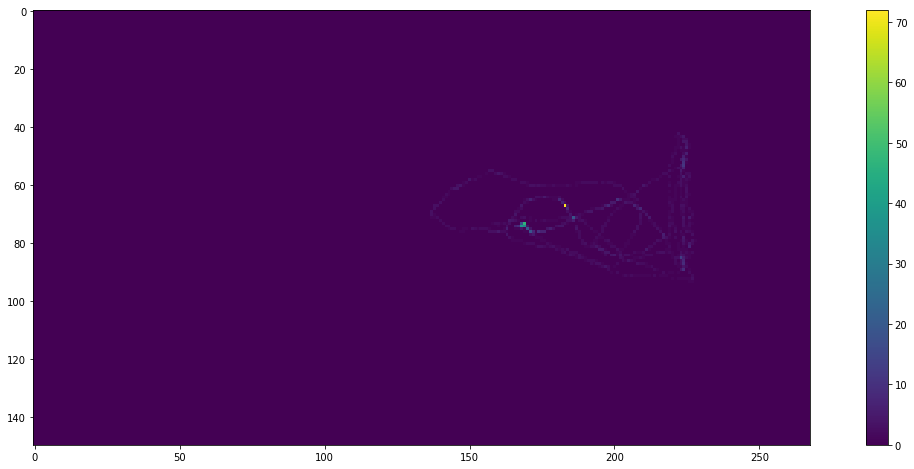

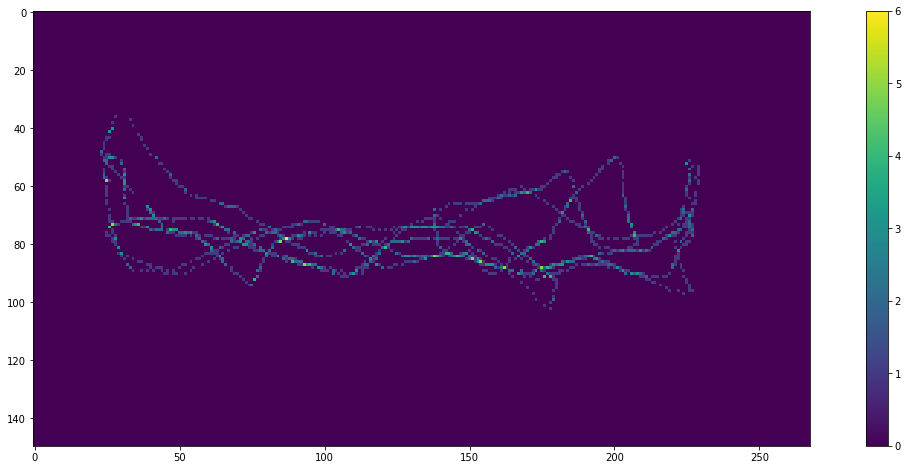

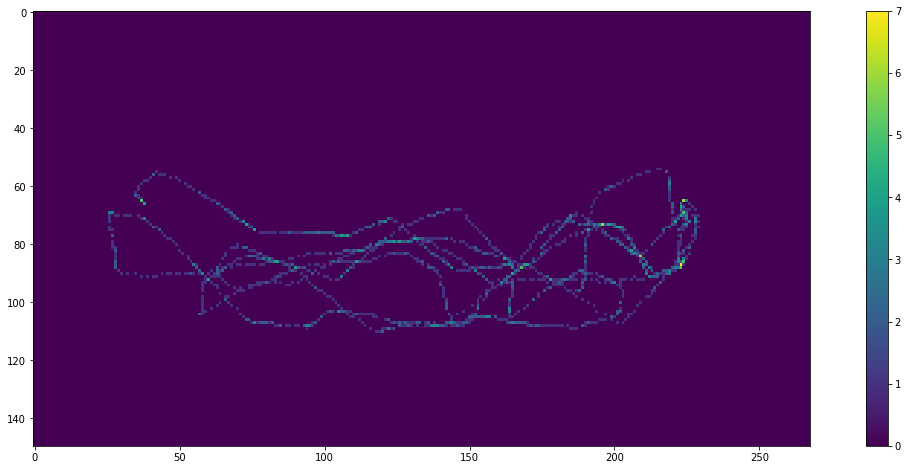

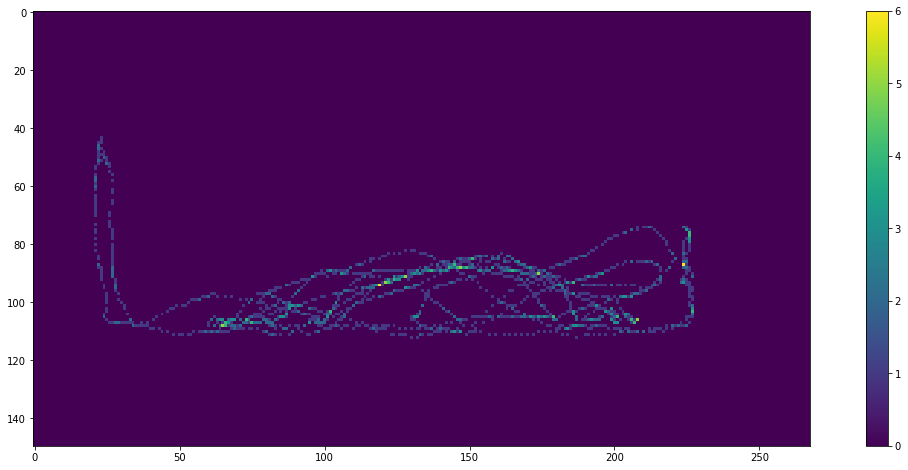

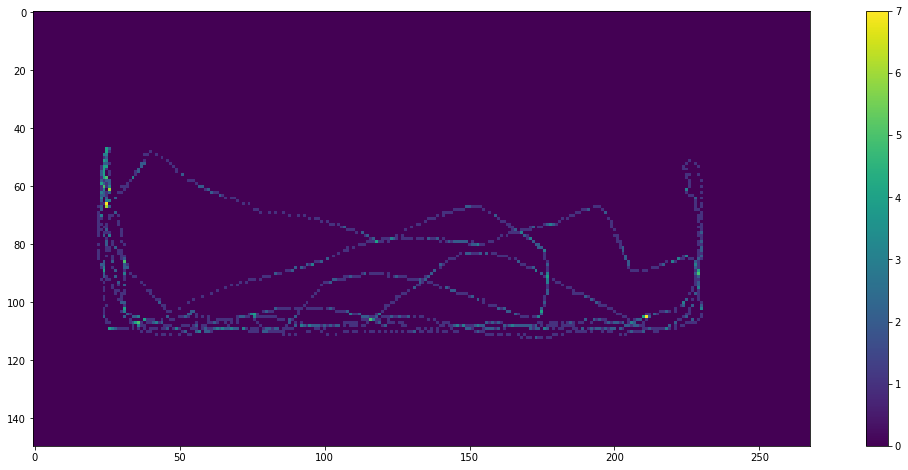

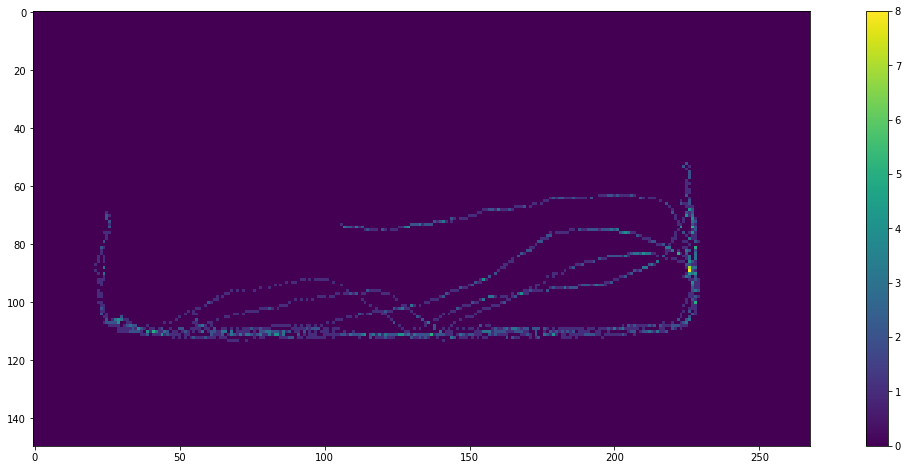

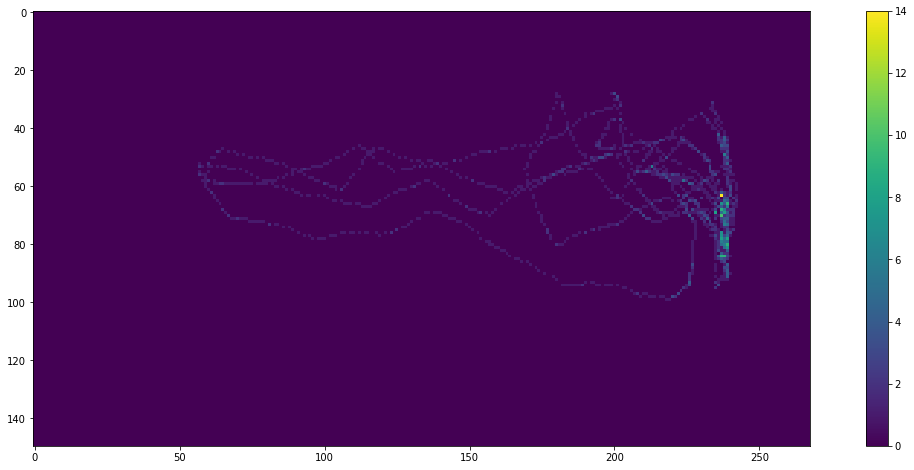

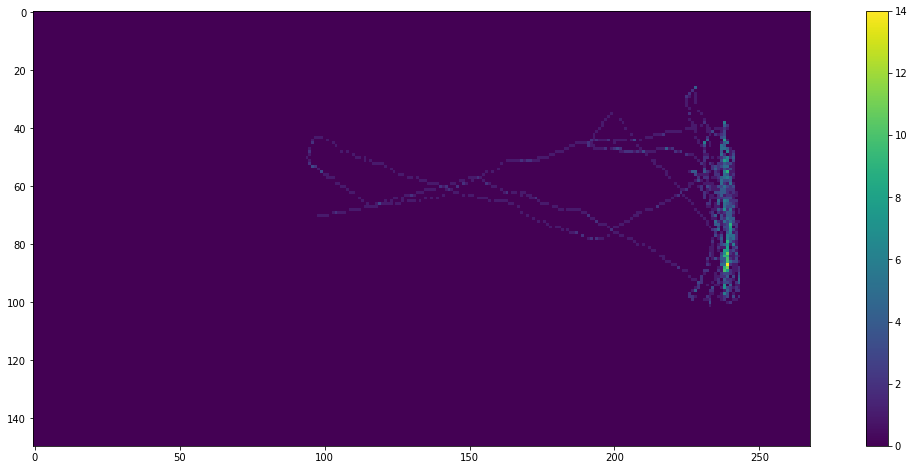

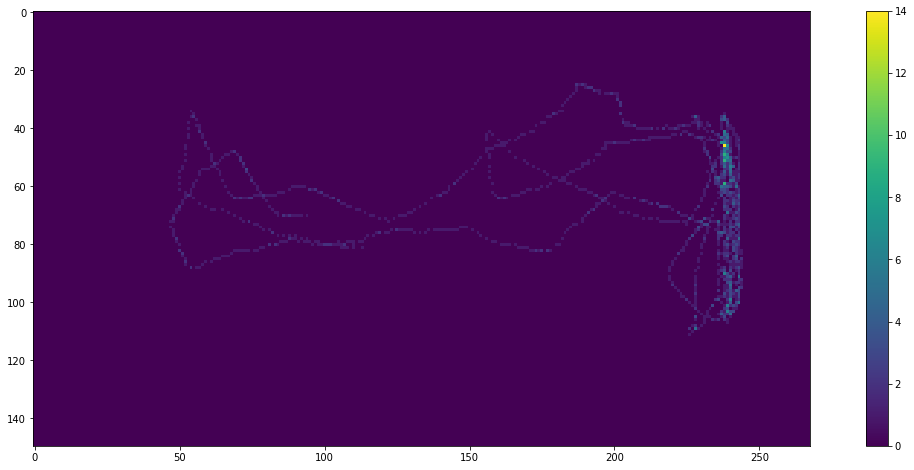

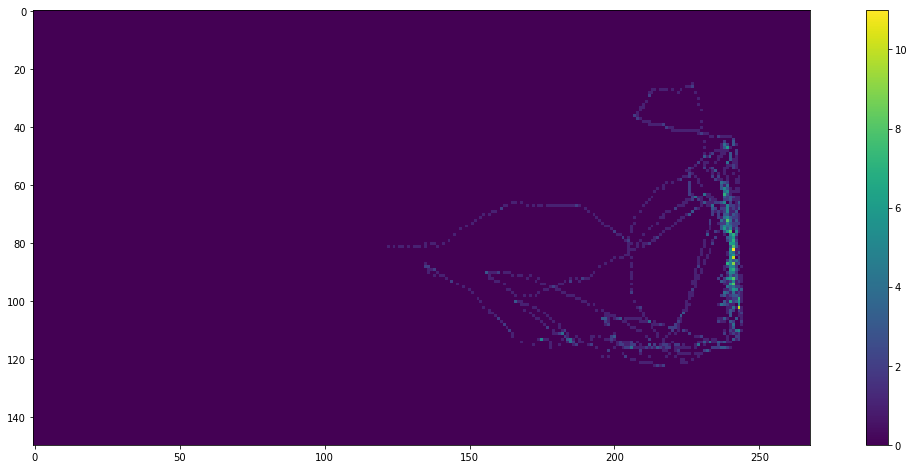

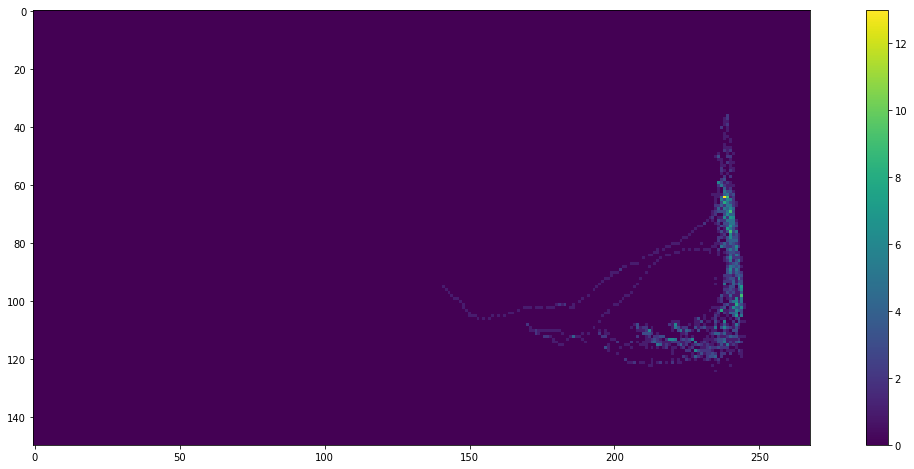

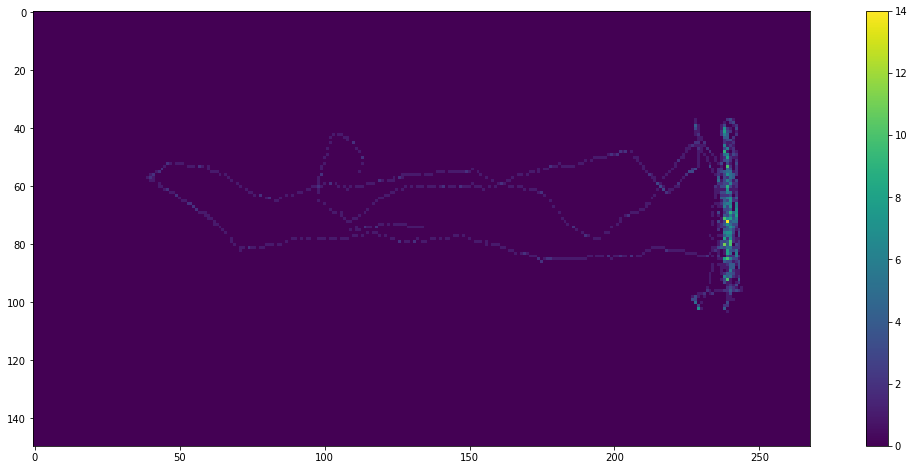

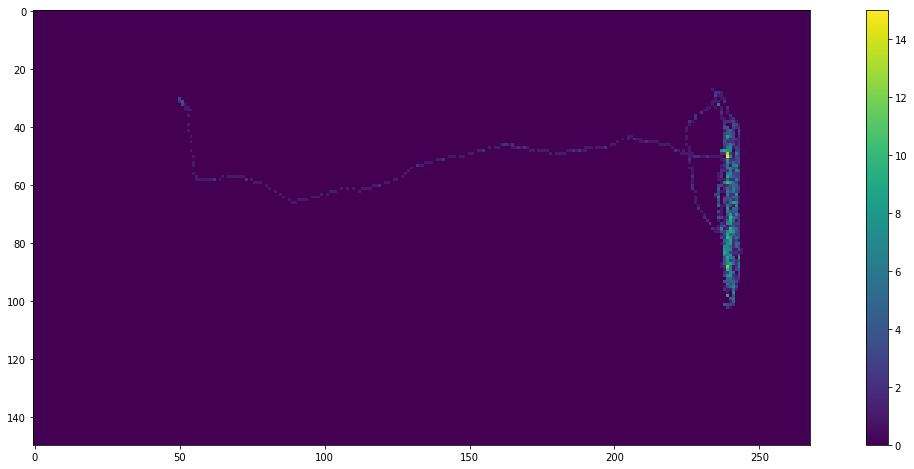

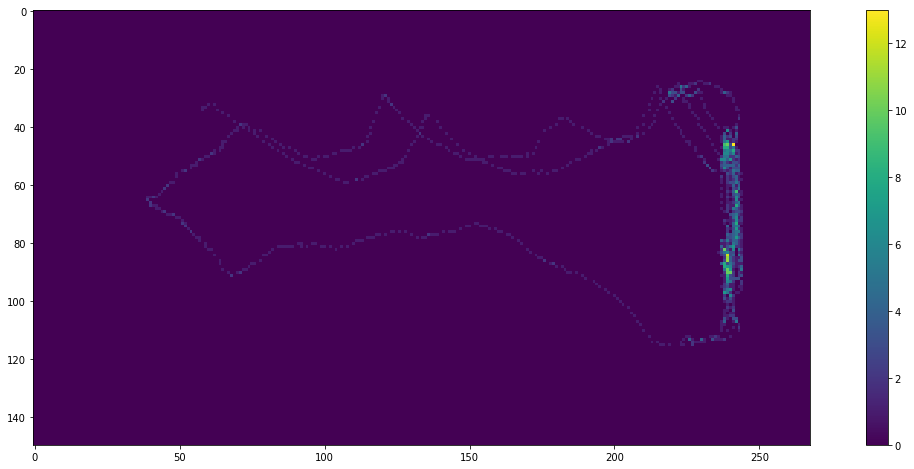

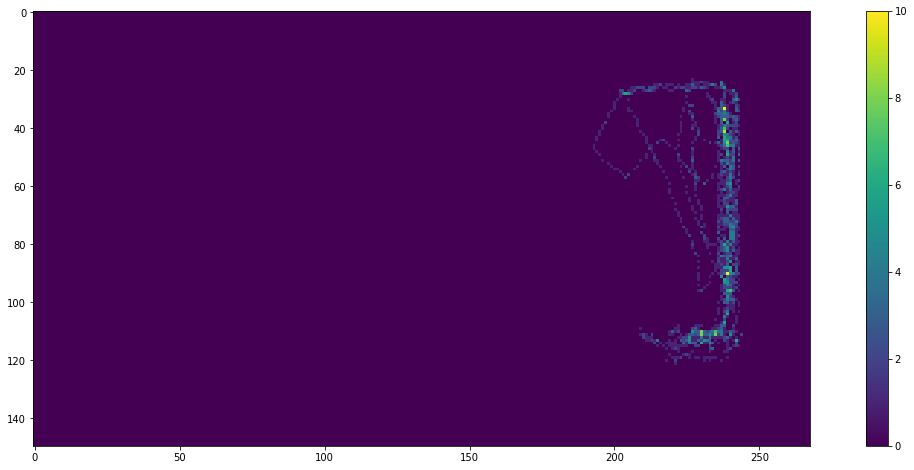

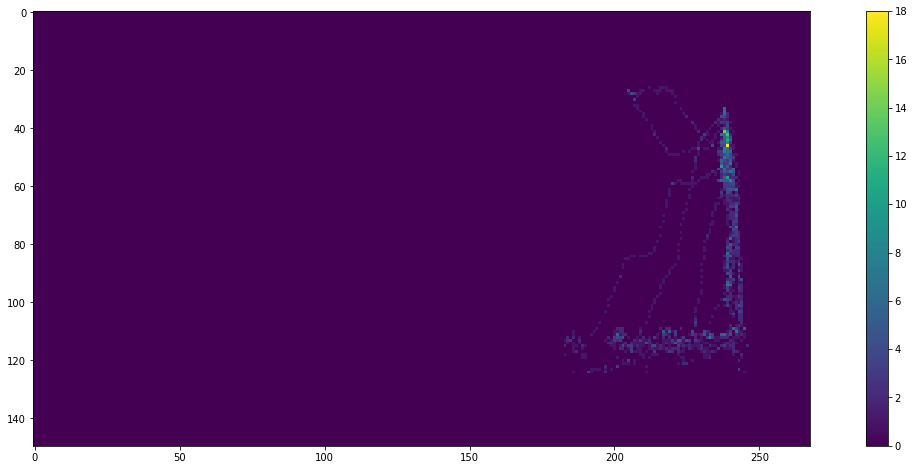

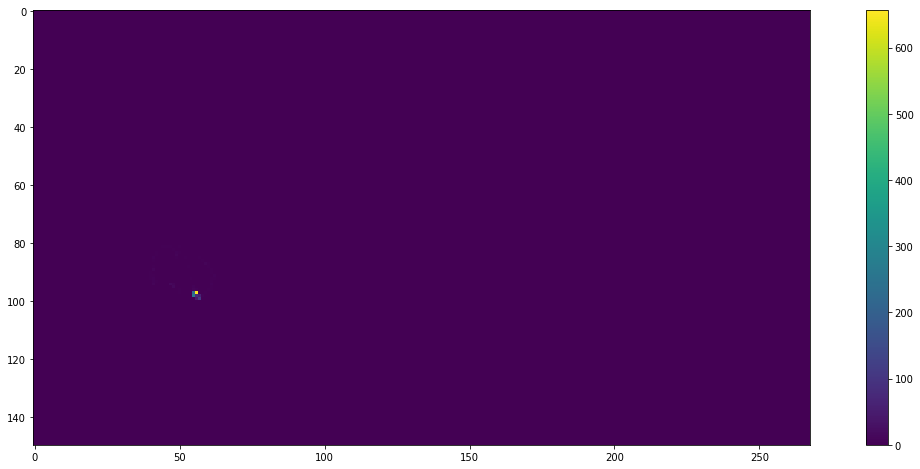

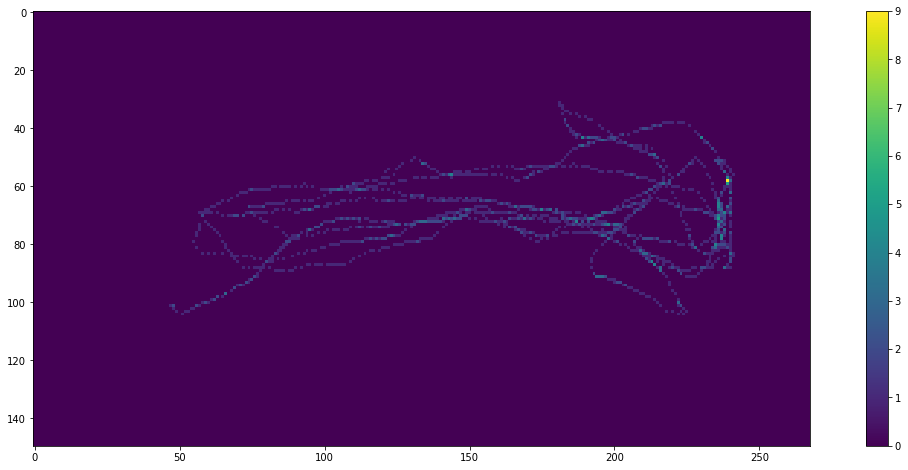

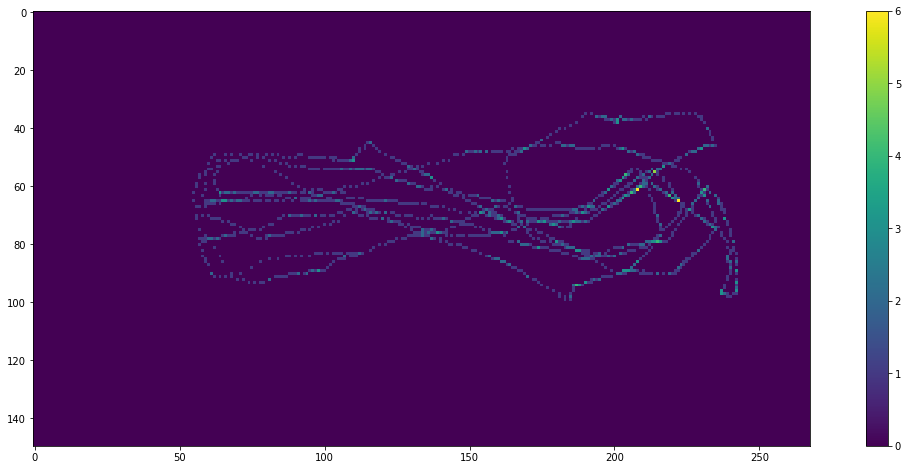

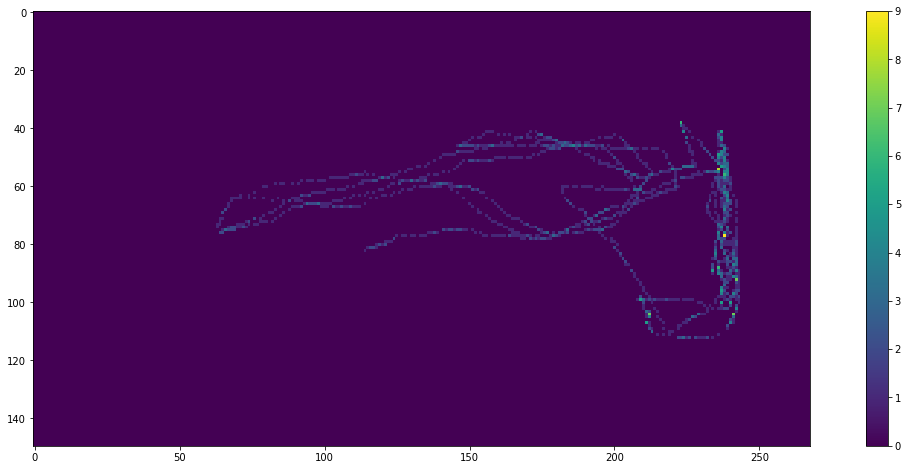

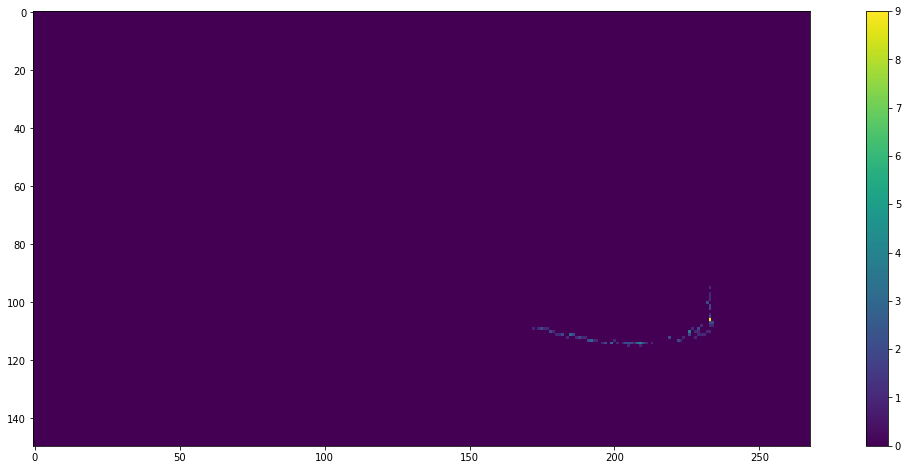

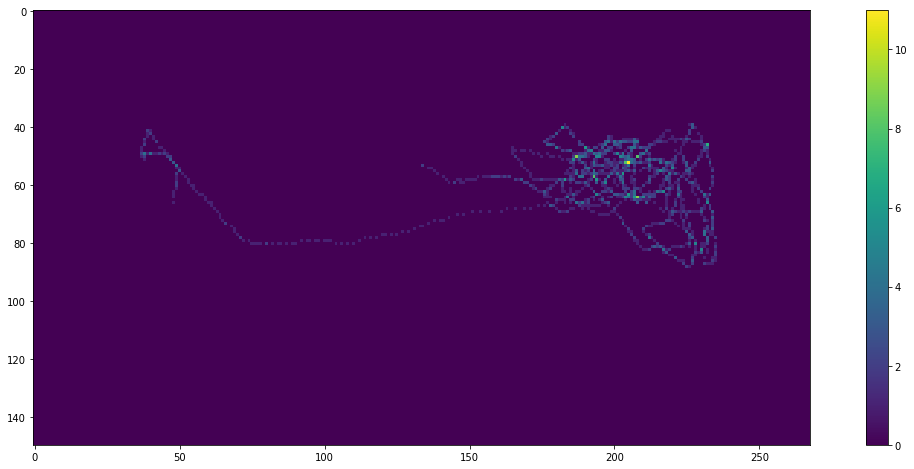

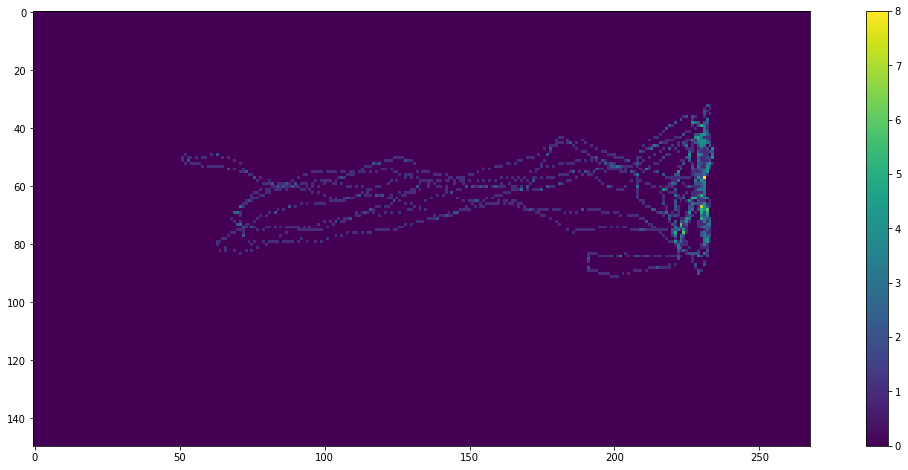

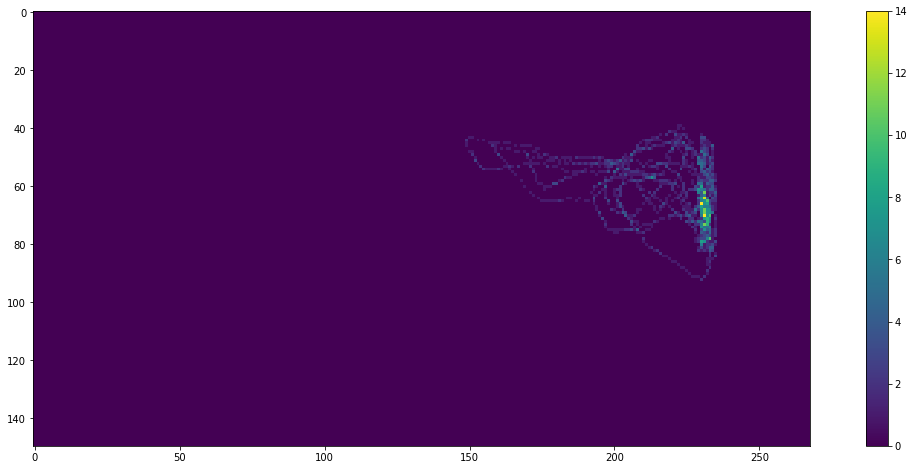

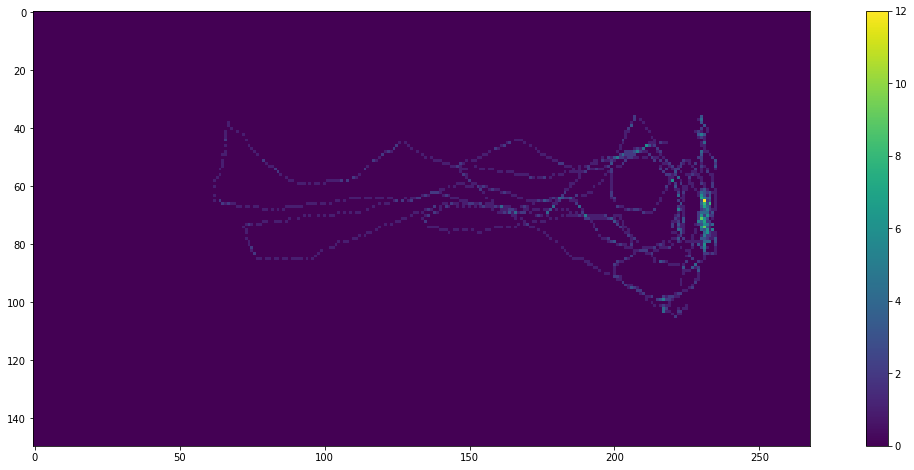

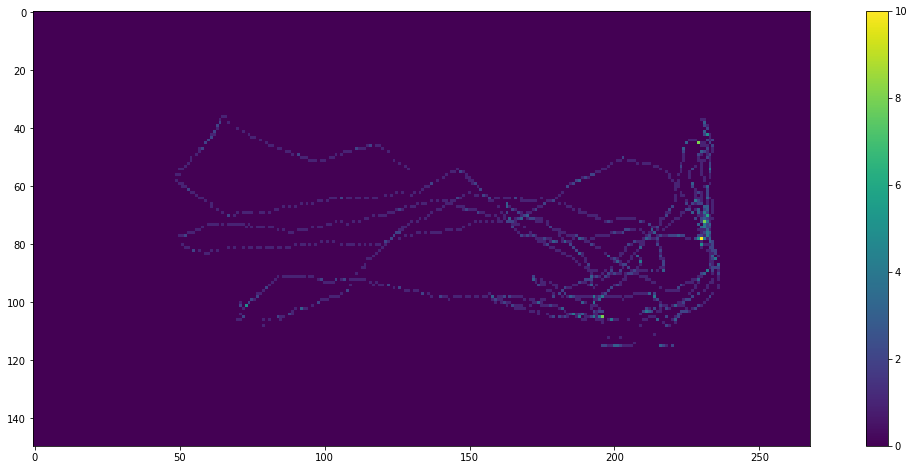

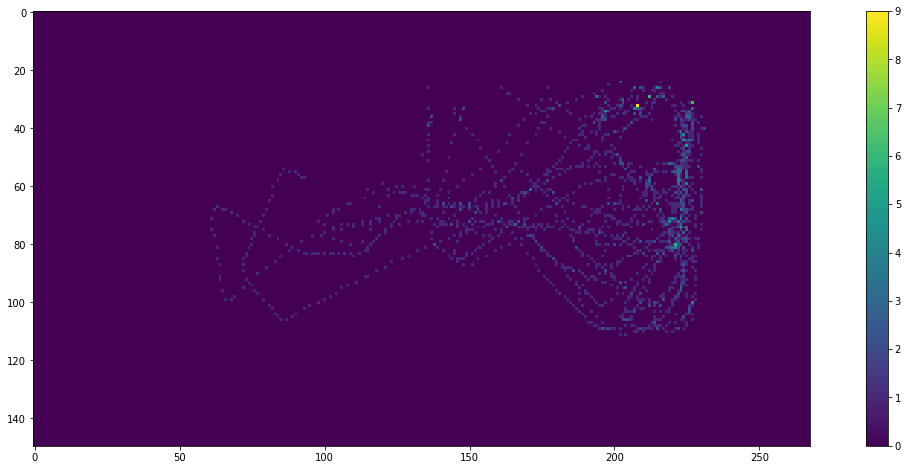

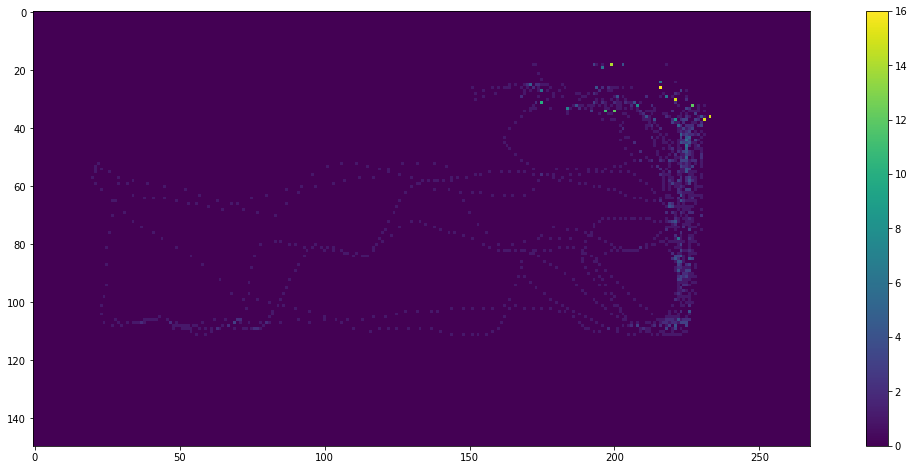

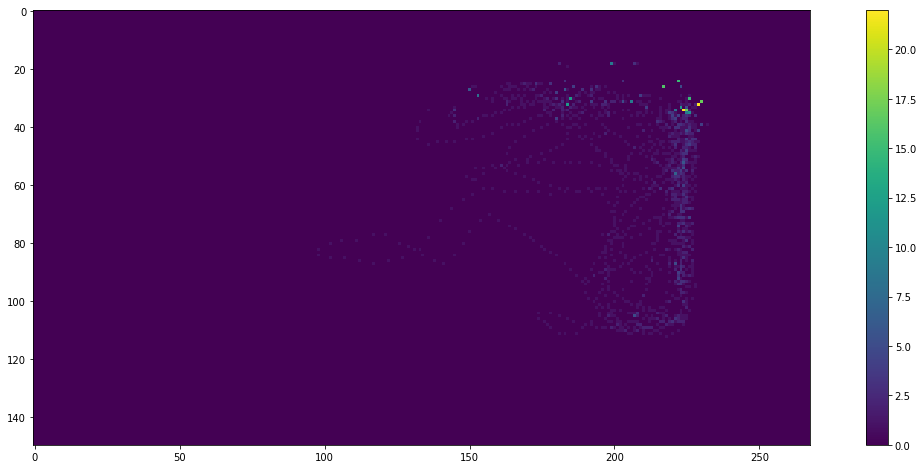

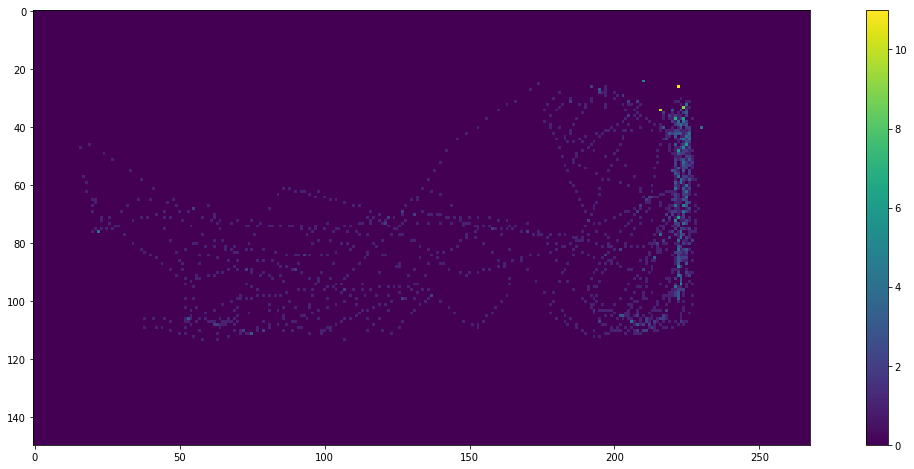

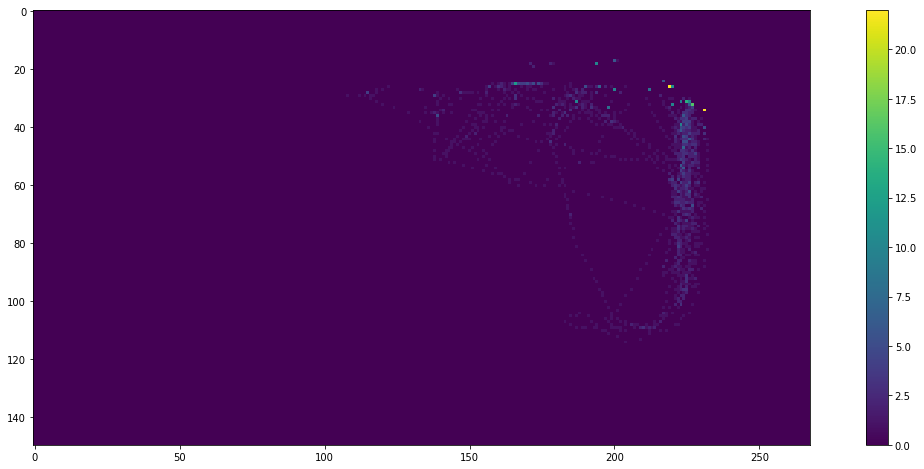

In [19]:
#Analicemos los mapas termicos esta vez con los centroides calculados por el BS
#DIMENSIONES DE TODAS LAS IMAGENES = (150, 268)
for i in range(21):
    if(i<10):
        for k in range(5):
            pos =  np.zeros(shape=(150,268))
            cx, cy = cargar_centroides('variables/10'+str(i)+'-'+str(k+1)+'C.txt')
            for j in range(len(cx)):
                pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
            plt.figure(figsize=(20,8))
            #breking = np.linspace(0 , 1, 20)
            plt.imshow(pos)
            plt.colorbar()
            plt.savefig("hotmaps/BS/BS_10"+str(i)+"-"+str(k+1)+".jpg")
    else:
        for k in range(5):
            pos =  np.zeros(shape=(150,268))
            cx, cy = cargar_centroides('variables/1'+str(i)+'-'+str(k+1)+'C.txt')
            for j in range(len(cx)):
                pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
            plt.figure(figsize=(20,8))
            #breking = np.linspace(0 , 1, 20)
            plt.imshow(pos)
            plt.colorbar()
            plt.savefig("hotmaps/BS/BS_1"+str(i)+"-"+str(k+1)+".jpg")

for k in range(5):
    pos =  np.zeros(shape=(150,268))
    cx, cy = cargar_centroides('variables/ACL099-'+str(k+1)+'C.txt')
    for j in range(len(cx)):
        pos[int(float(cy[j]))][int(float(cx[j]))] += 1 
    plt.figure(figsize=(20,8))
    #breking = np.linspace(0 , 1, 20)
    plt.imshow(pos)
    plt.colorbar()
    plt.savefig("hotmaps/BS/BS_ACL099-"+str(k+1)+".jpg")

In [9]:
#Creamos la lista que contendra el numero de frames
def guardarGraficas_Edgar(cx,cy,name):
    t = []
    for i in range(len(cx)):
        t.append(i)
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    plt.plot(t,cx,color="blue", linewidth=1.0, linestyle="-", label="D(t,cx)") ####Desplazamiento en X
    plt.title("Desplazamiento D(t,cx)")
    plt.legend()
    plt.subplot(222)
    plt.plot(t,cy,color="red", linewidth=1.0, linestyle="-", label="D(t,cy)") ####Desplazamiento en Y
    plt.title("Desplazamiento D(t,cy)")
    plt.legend()
    plt.subplot(223)
    plt.plot(cx,cy, linewidth=1.0, linestyle="-", label="D(cx,cy)") ####Desplazamiento Y respecto a X
    plt.title("Desplazamiento D(cx,cy)")
    plt.legend()
    plt.savefig(name)

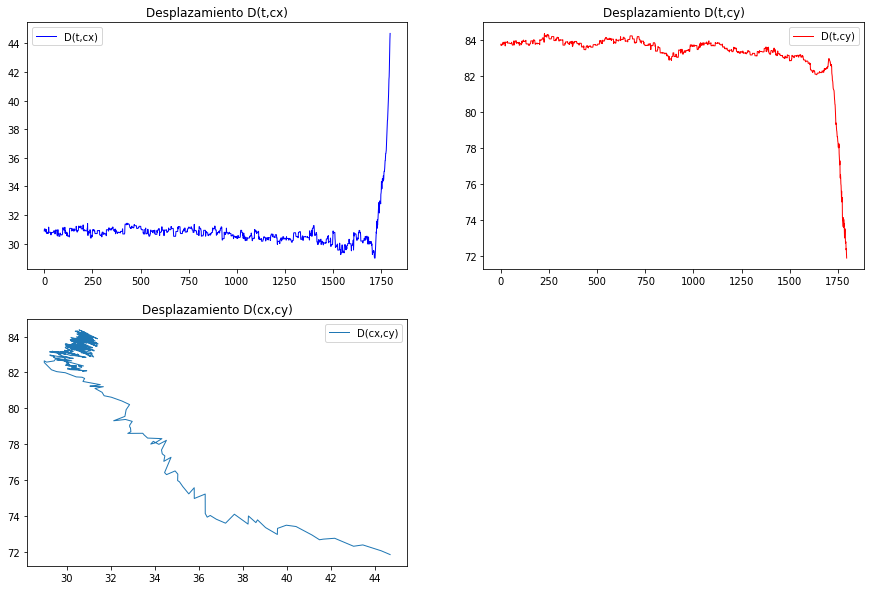

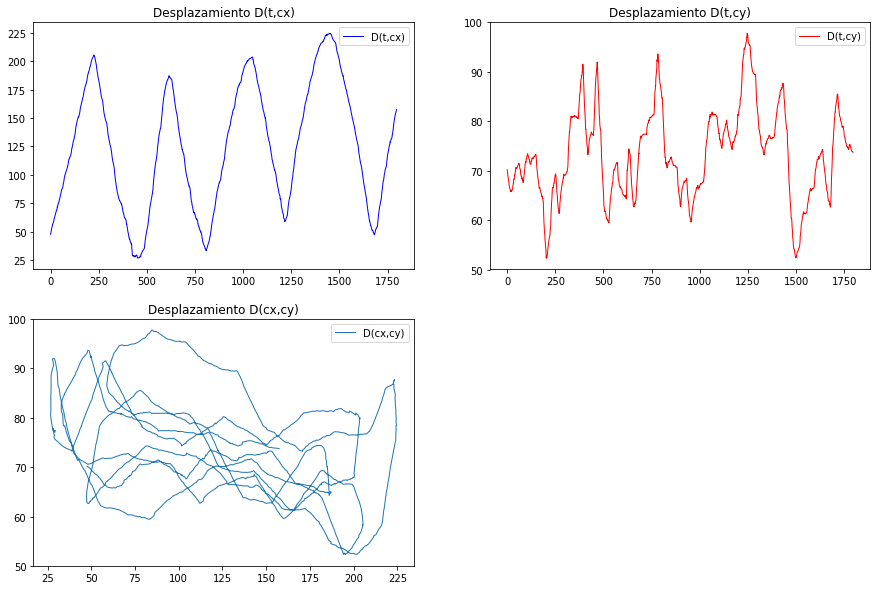

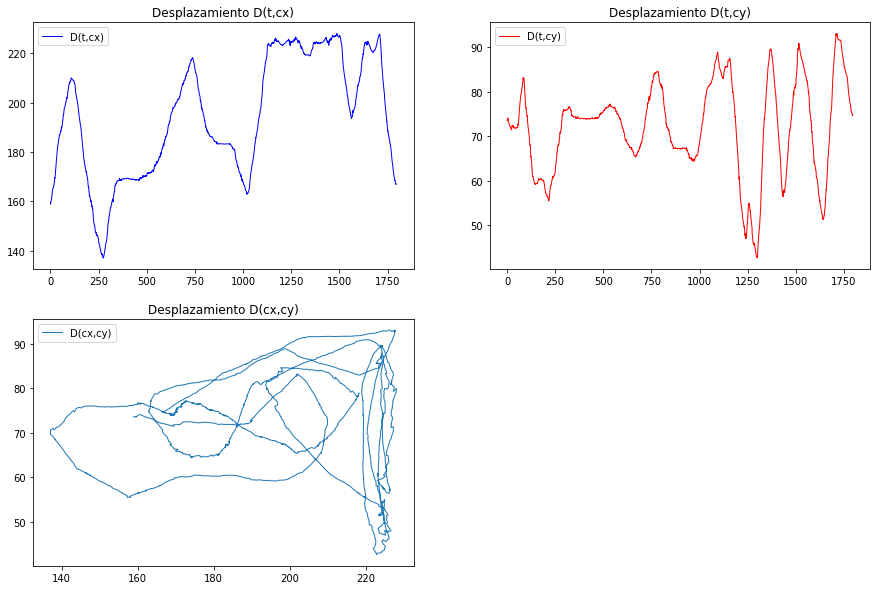

In [15]:
cx, cy = cargar_centroides('variables/115-3C.txt')
guardarGraficas_Edgar(cx,cy,'Desplazamientos/115-3.png')

cx, cy = cargar_centroides('variables/115-4C.txt')
guardarGraficas_Edgar(cx,cy,'Desplazamientos/115-4.png')

cx, cy = cargar_centroides('variables/115-5C.txt')
guardarGraficas_Edgar(cx,cy,'Desplazamientos/115-5.png')

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


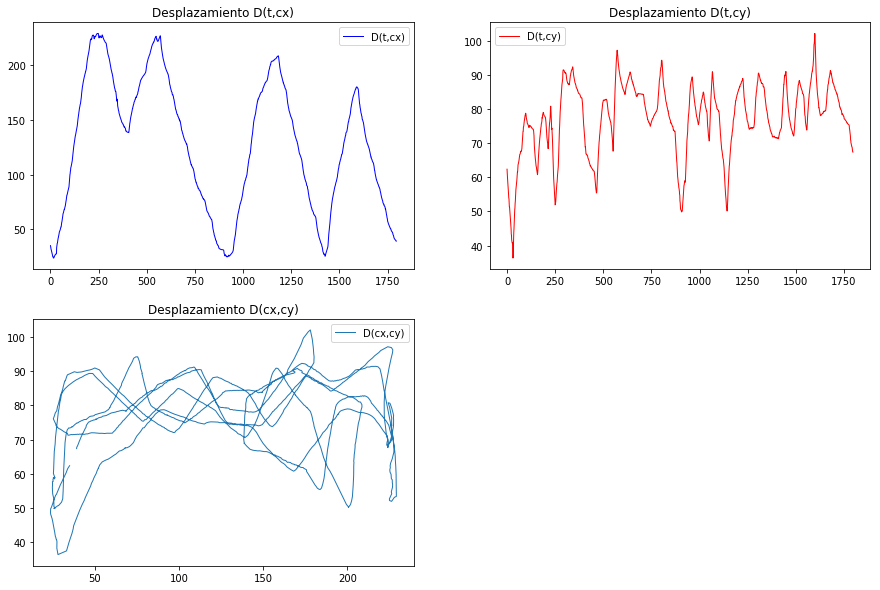

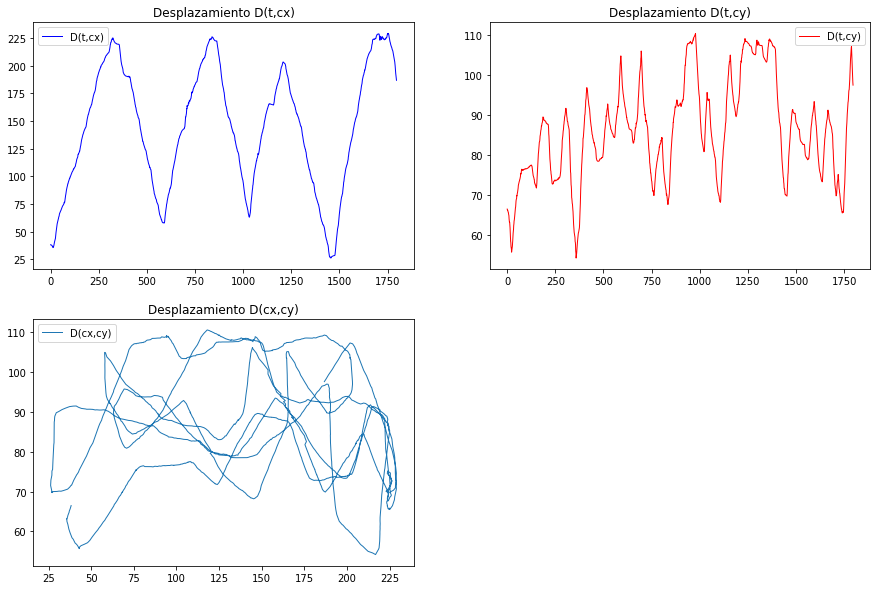

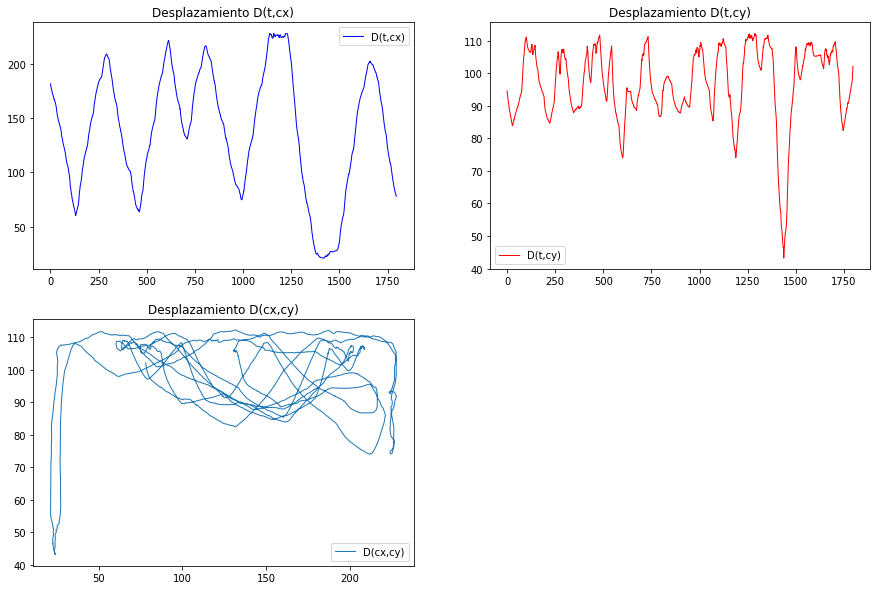

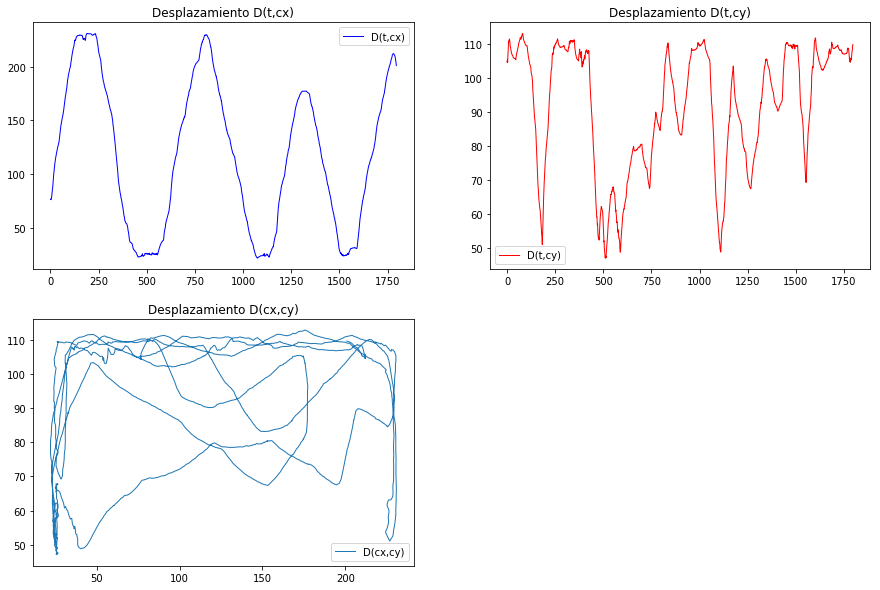

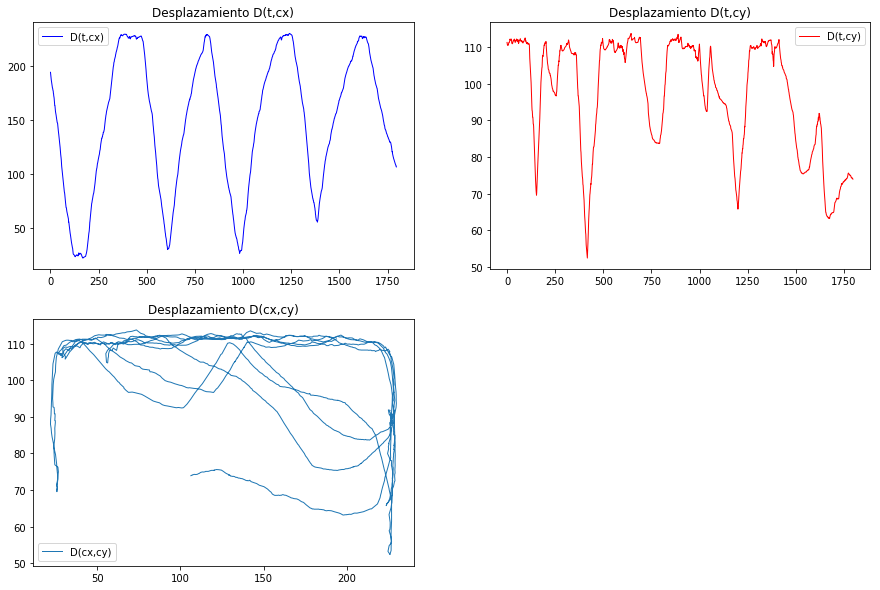

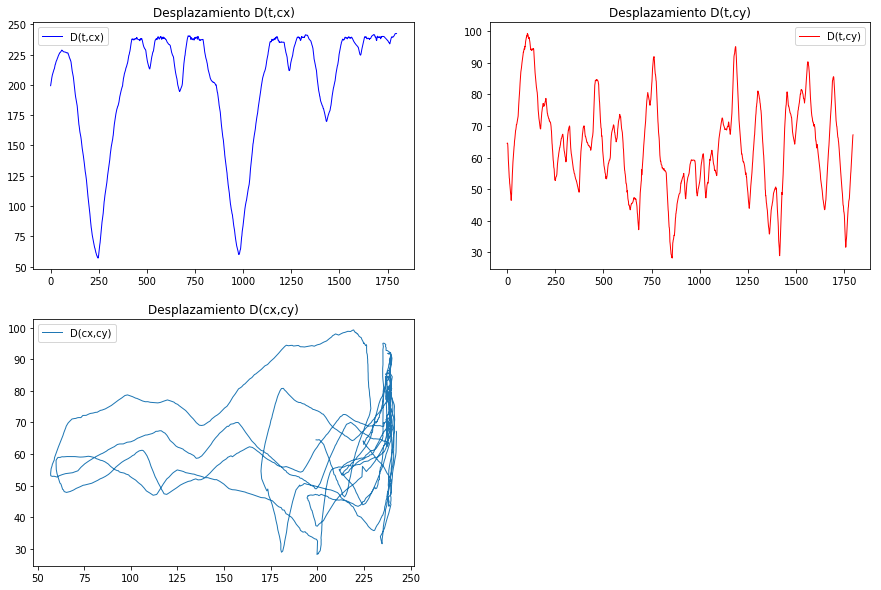

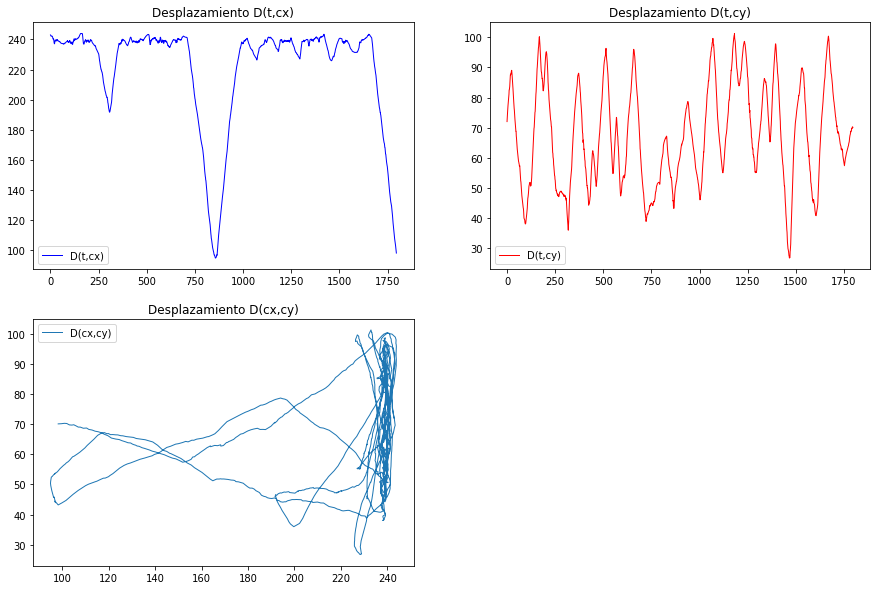

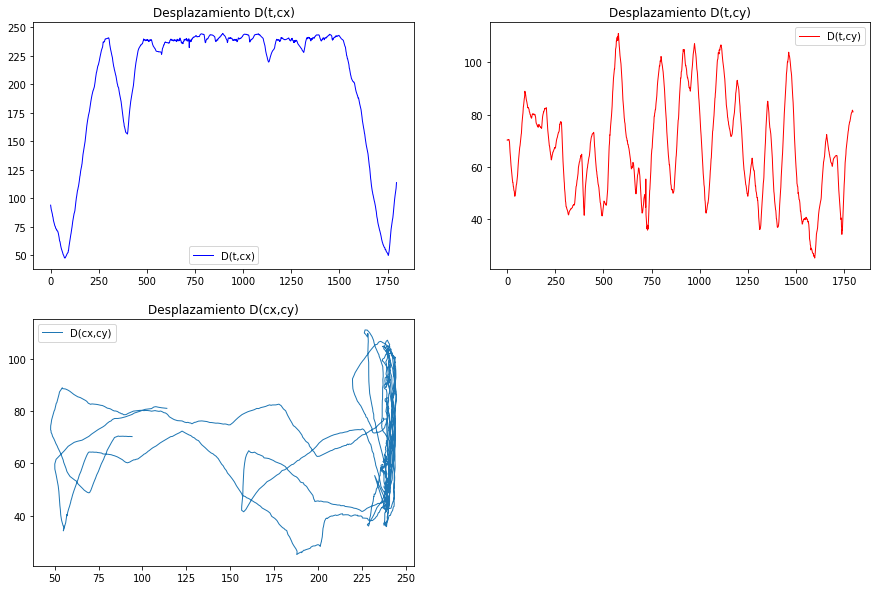

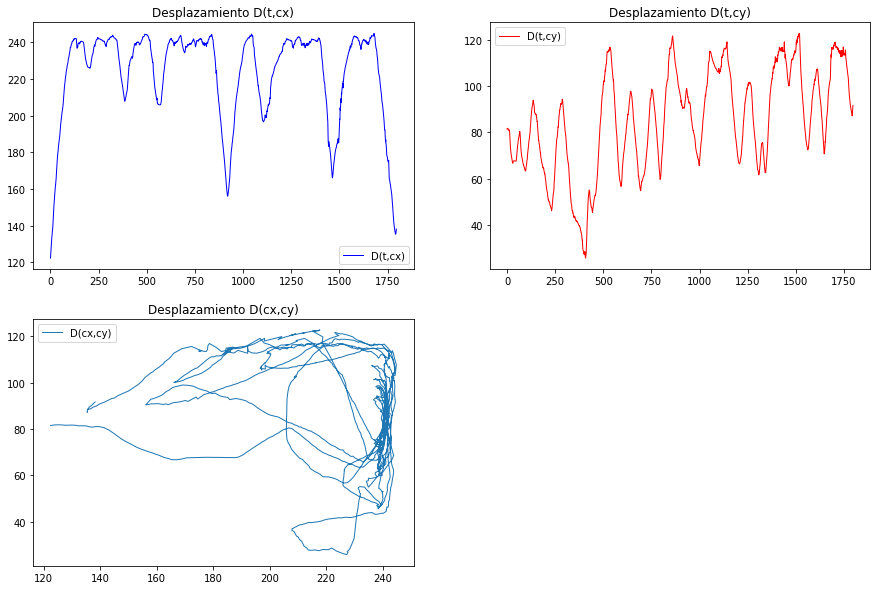

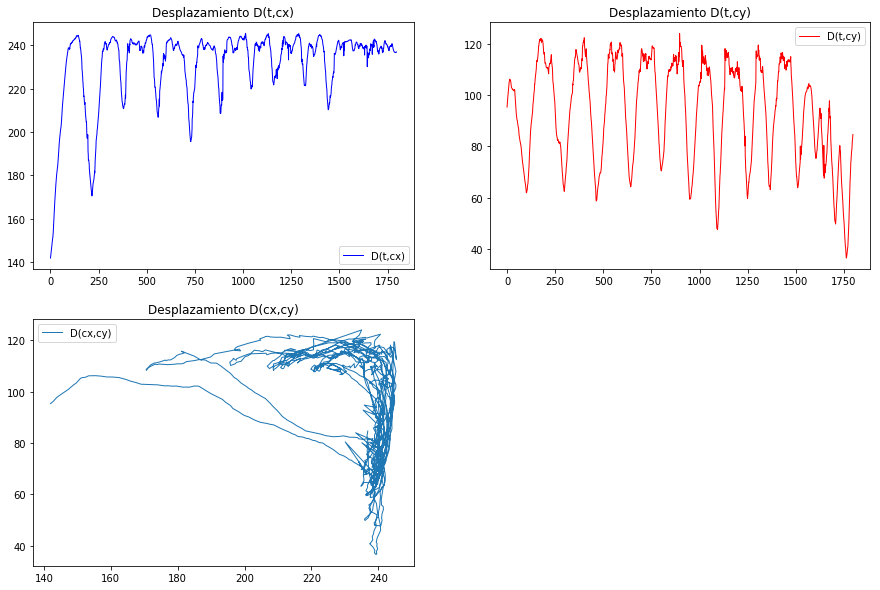

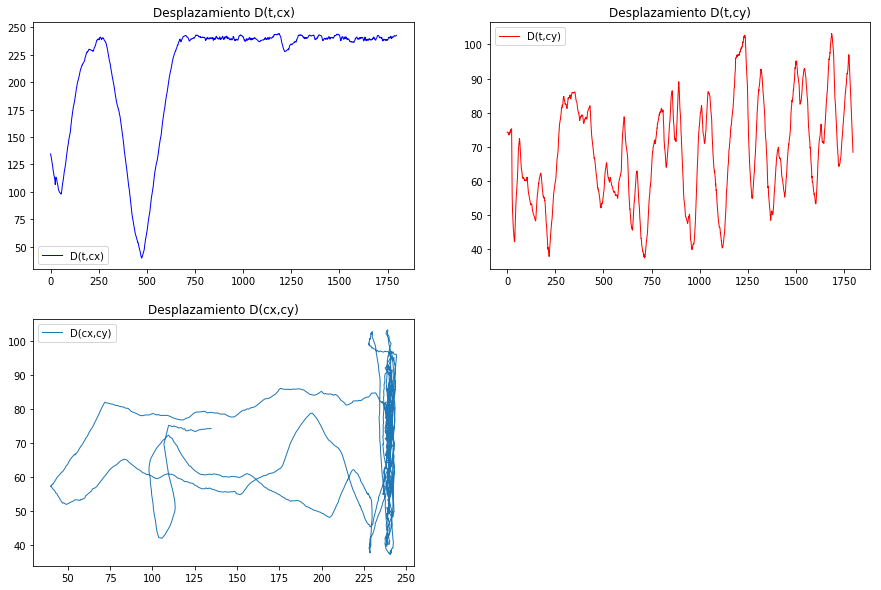

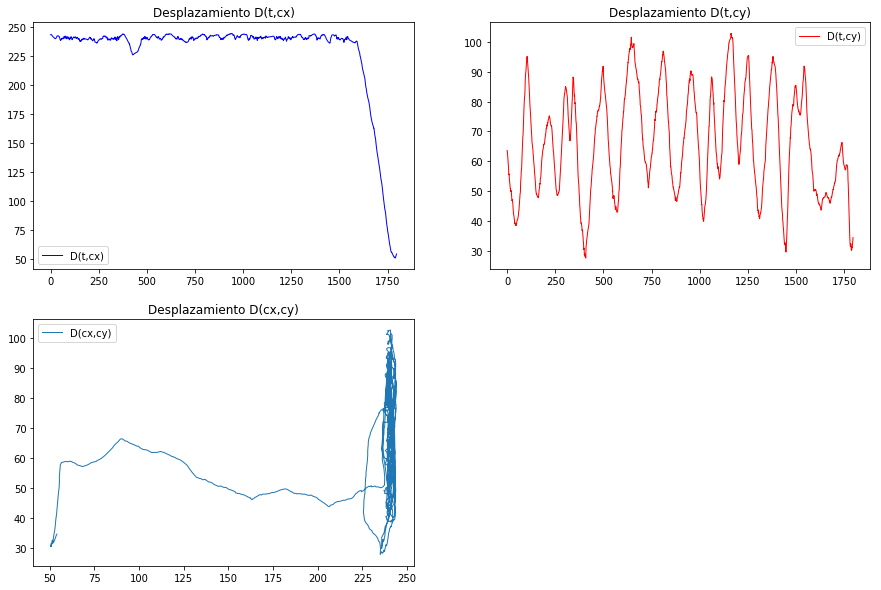

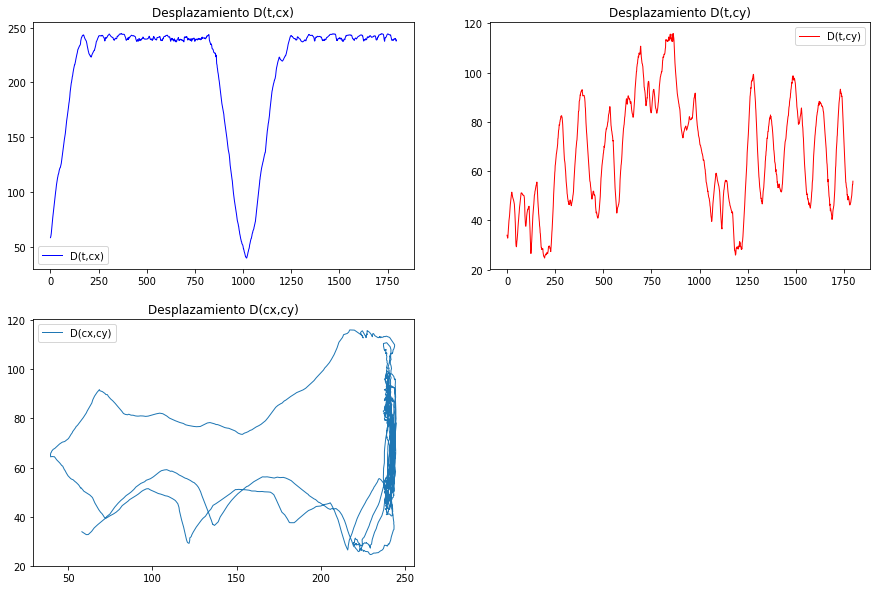

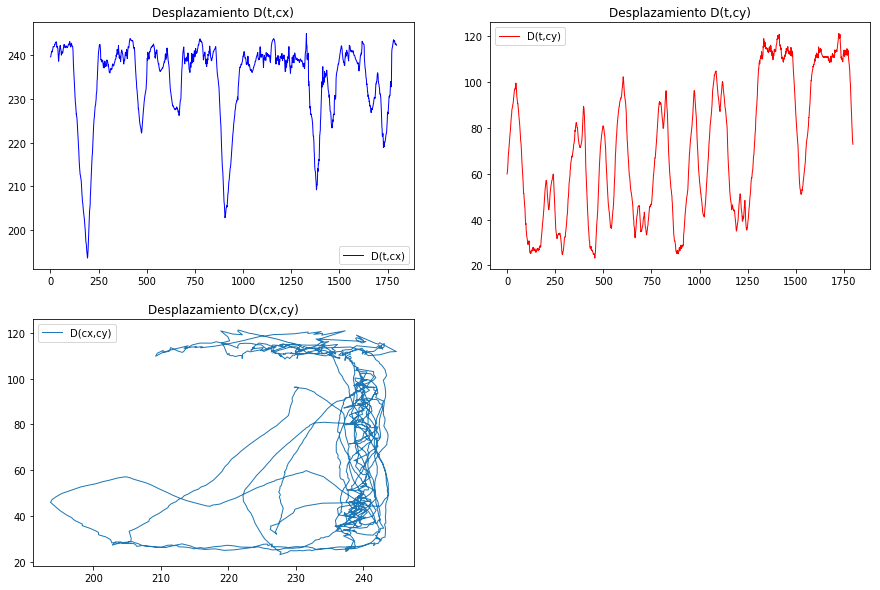

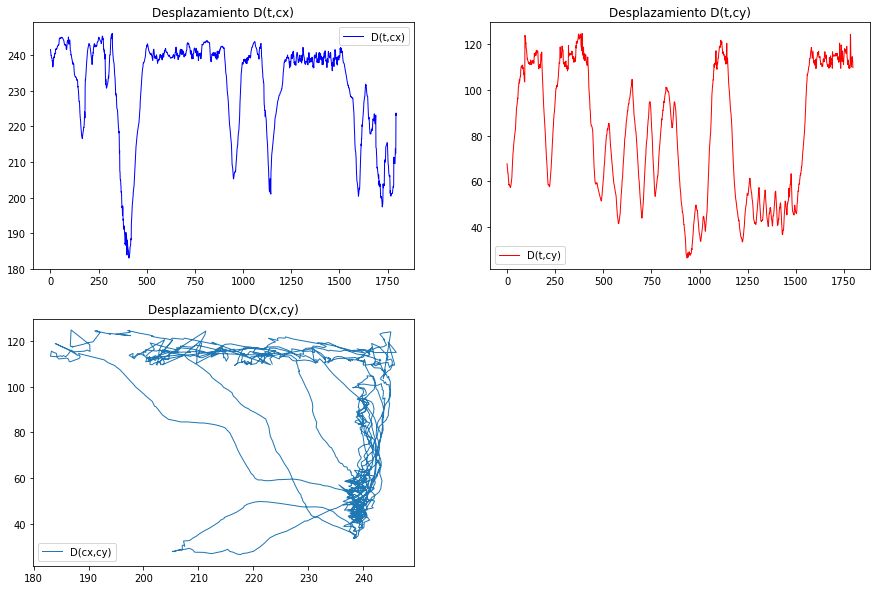

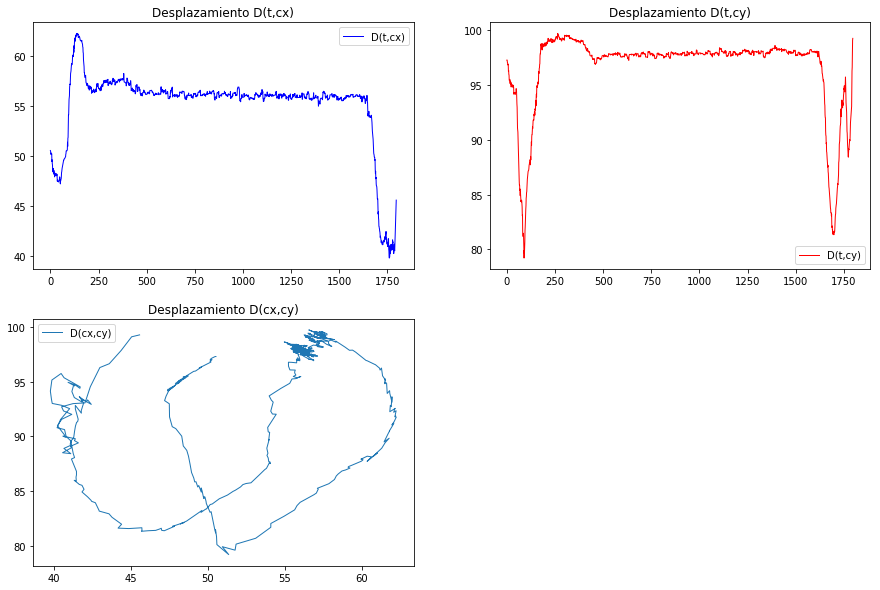

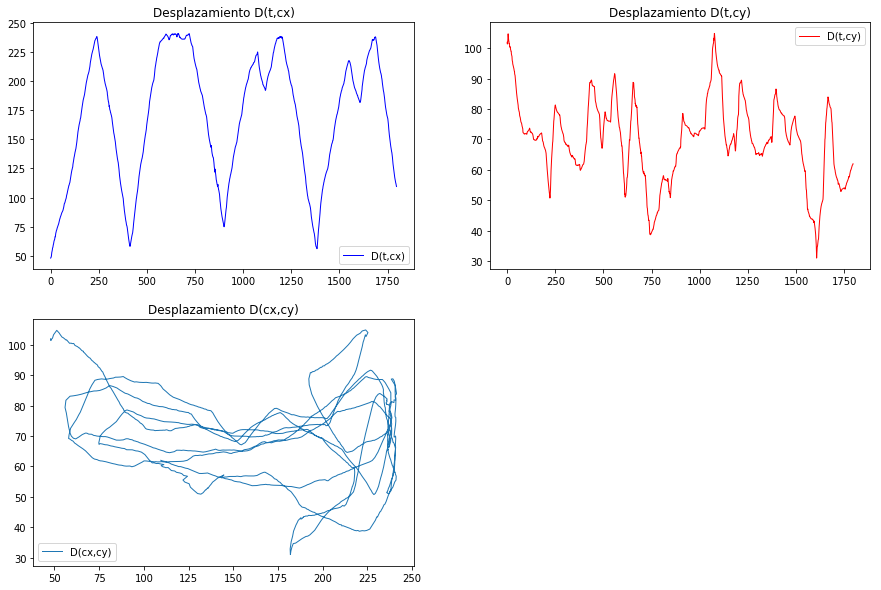

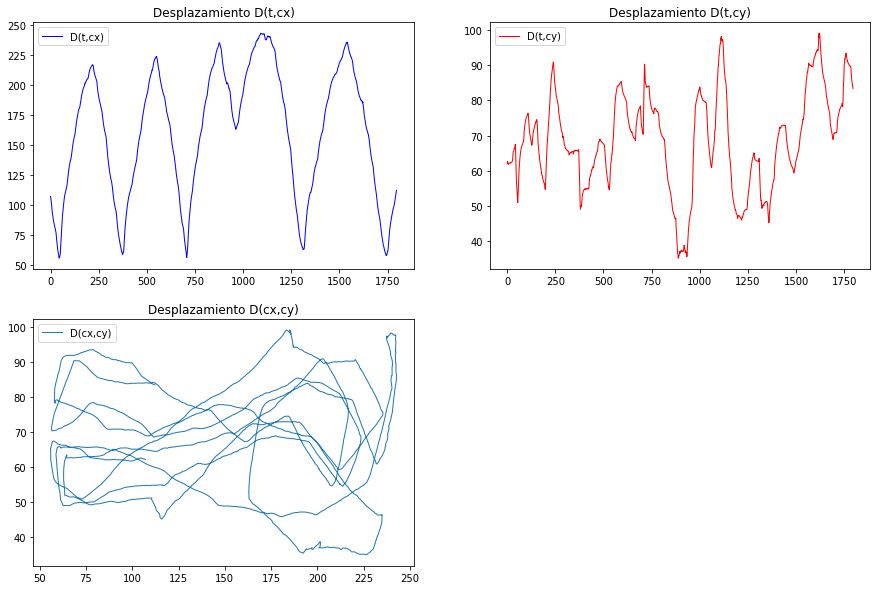

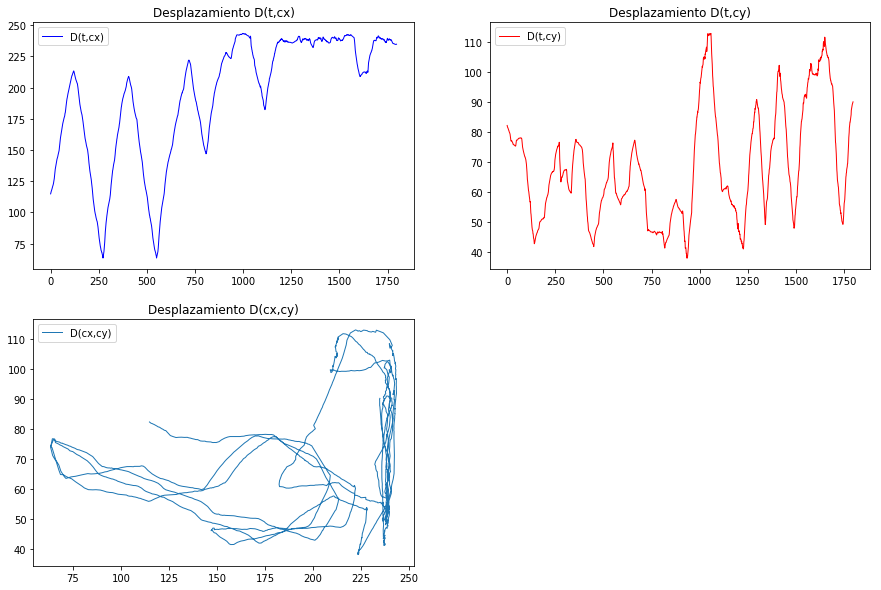

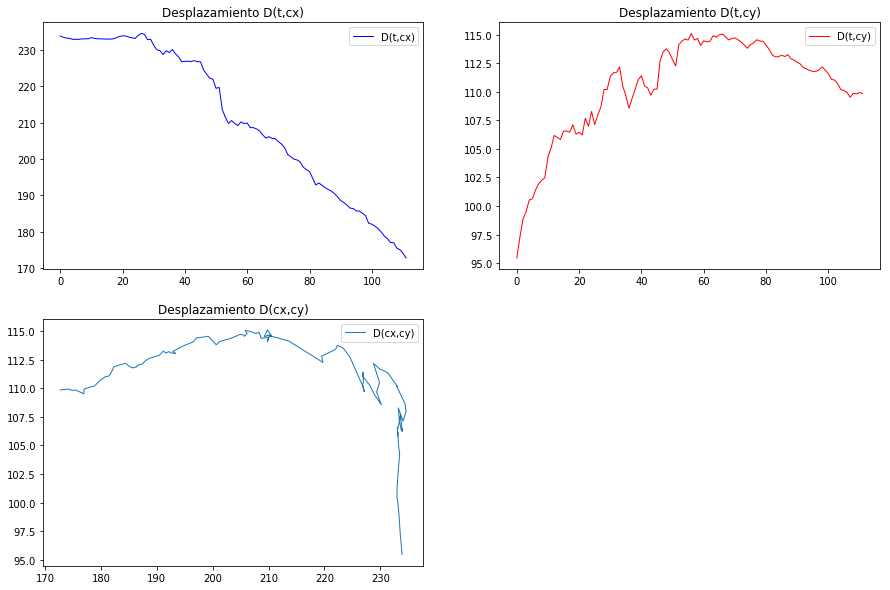

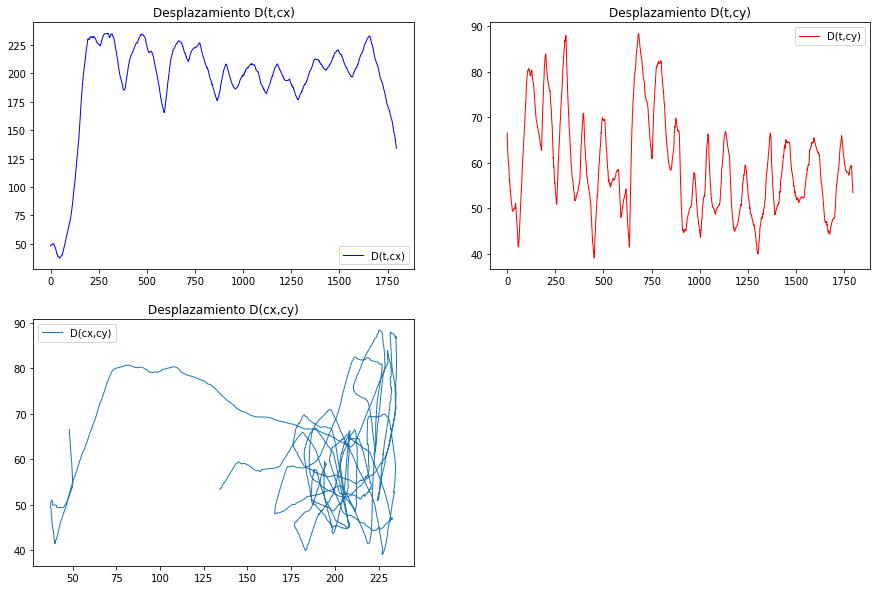

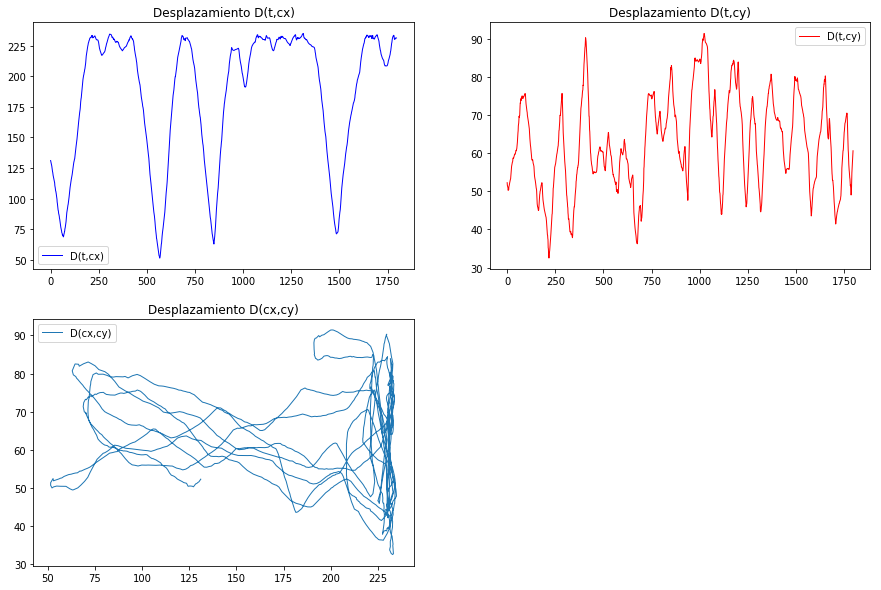

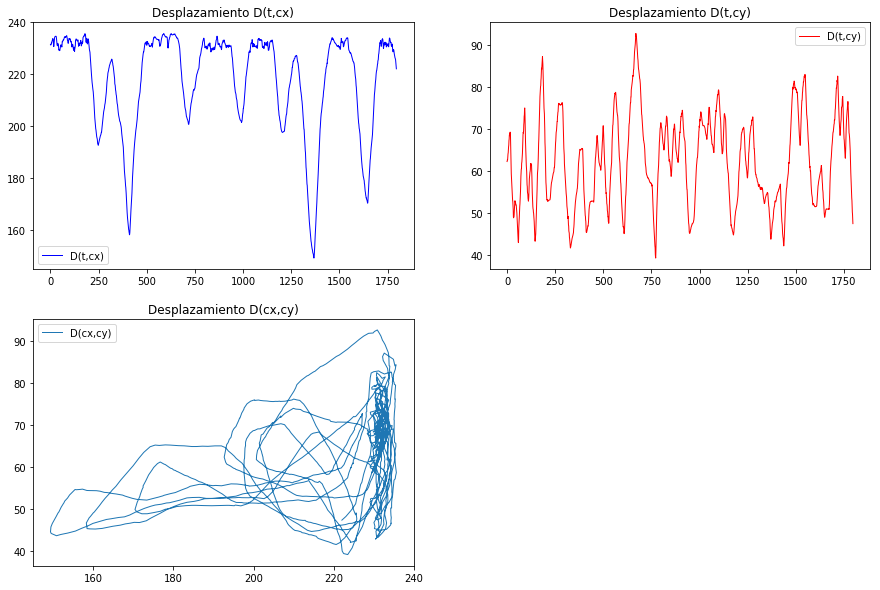

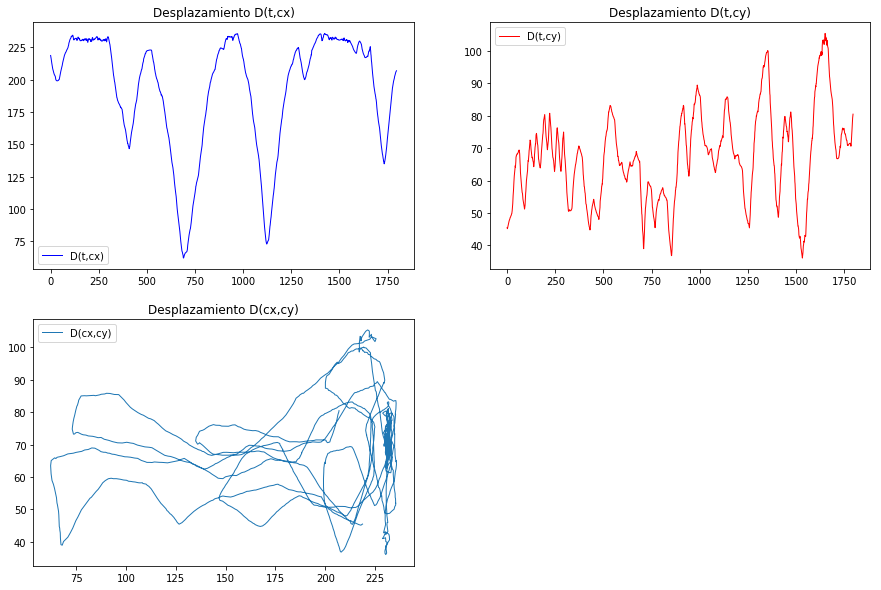

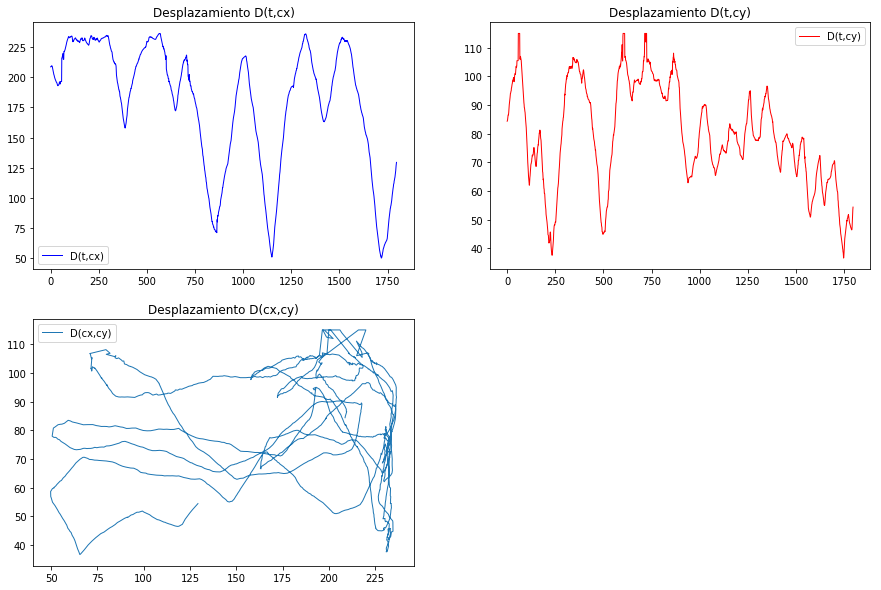

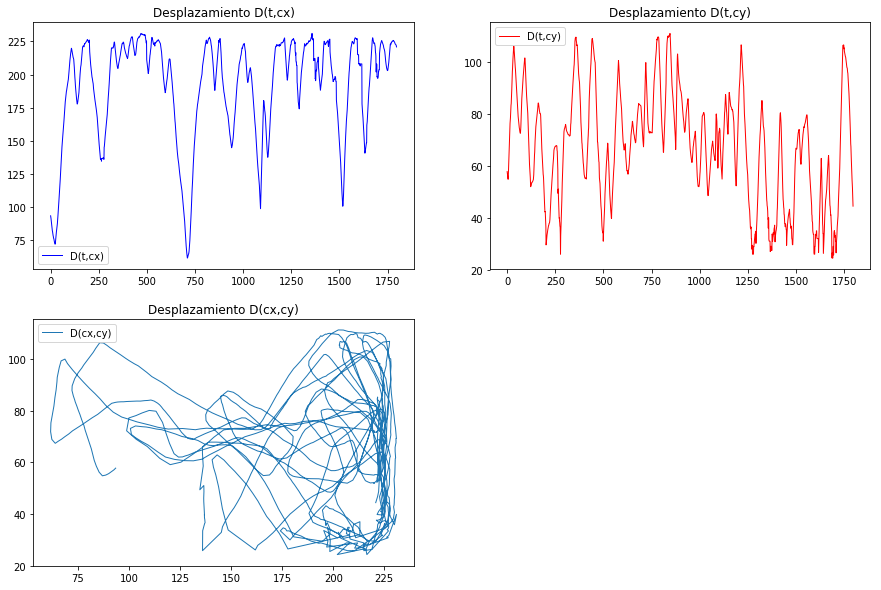

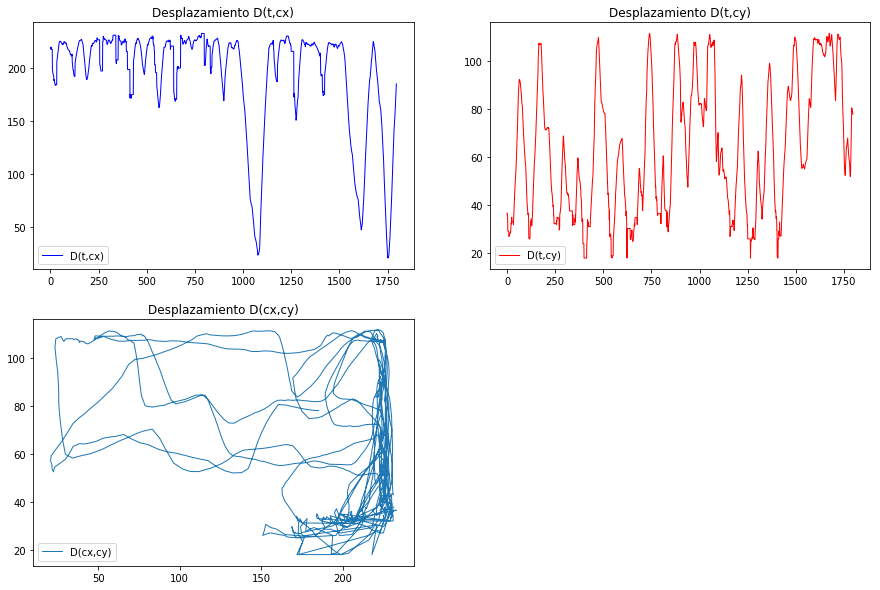

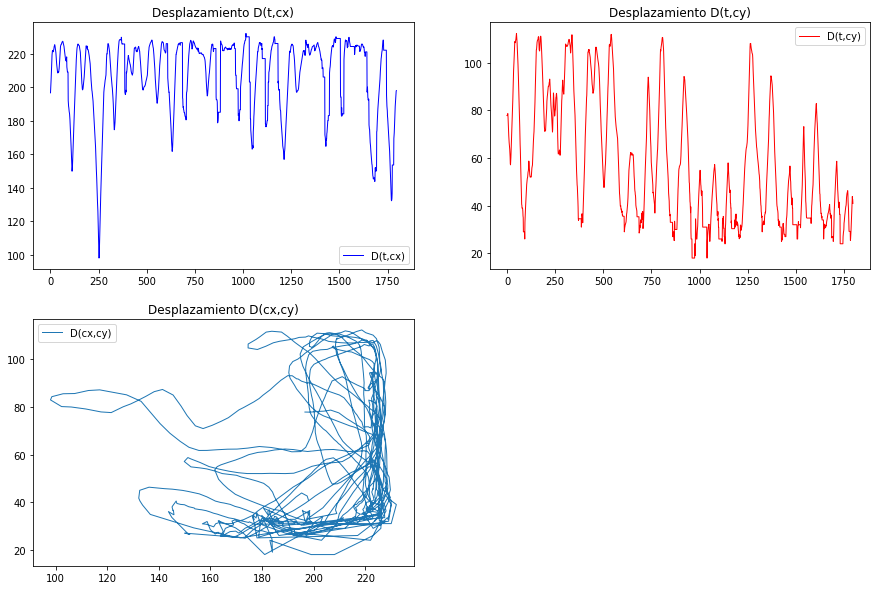

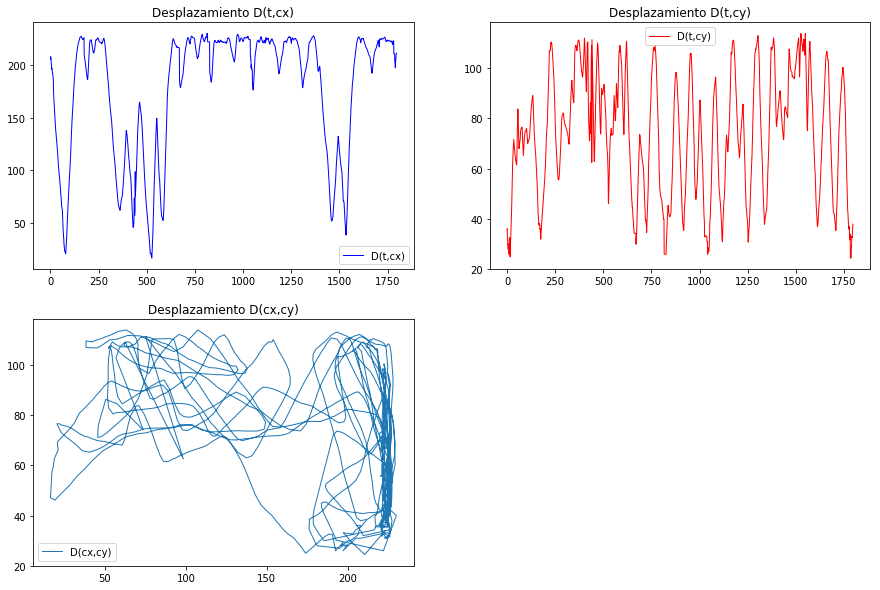

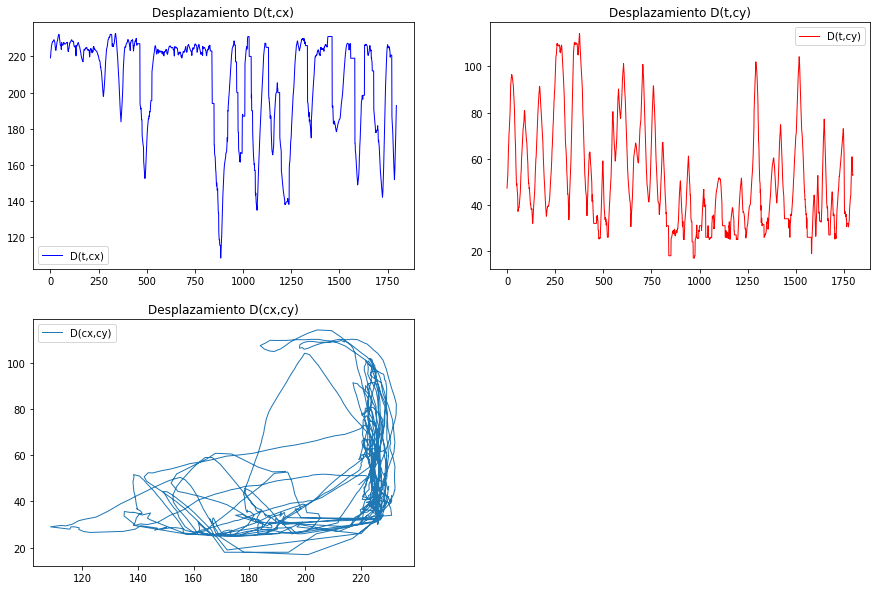

In [17]:
for i in range(5):
    for k in range(5):
        cx, cy = cargar_centroides('variables/1'+str(i+16)+'-'+str(k+1)+'C.txt')
        guardarGraficas_Edgar(cx,cy,'Desplazamientos/1'+str(i+16)+'-'+str(k+1)+'.png')
for k in range(5):
    cx, cy = cargar_centroides('variables/ACL099-'+str(k+1)+'C.txt')
    guardarGraficas_Edgar(cx,cy,'Desplazamientos/ACL099-'+str(k+1)+'.png')

In [2]:
X = input('Ingrese alguna mondad aqui')

Ingrese alguna mondad aquiYo soy tu papi


In [3]:
X

'Yo soy tu papi'